In [46]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib import colors
import matplotlib as mpl 
mpl.rcParams["image.origin"] = 'lower'
# mpl.rcParams["image.dpi"] = 200
import os
import numpy as np
import pandas as pd

import mplhep as hep
plt.style.use(hep.style.CMS)

In [47]:
output_folder = "/eos/user/d/dvalsecc/www/ECAL/Clustering/DeepCluster/RecoPlots/RecoComparison_v3_UL18"
os.makedirs(output_folder, exist_ok=True)

In [48]:
df_ev_ele = pd.HDFStore("/eos/user/r/rdfexp/ecal/cluster/output_deepcluster_dumper/reco_comparison/electrons/ele_UL18_123X_algoA_v2_event.h5py", "r")["df"]
df_ev_gamma = pd.HDFStore("/eos/user/r/rdfexp/ecal/cluster/output_deepcluster_dumper/reco_comparison/gammas/gamma_UL18_123X_algoA_v2_event.h5py", "r")["df"]

In [49]:
df_ev_all= pd.concat([df_ev_ele, df_ev_gamma])

In [11]:
df_ev_ele_B = pd.HDFStore("/eos/user/r/rdfexp/ecal/cluster/output_deepcluster_dumper/reco_comparison/electrons/ele_UL18_123X_algoB_v2_event.h5py", "r")["df"]
df_ev_ele_C = pd.HDFStore("/eos/user/r/rdfexp/ecal/cluster/output_deepcluster_dumper/reco_comparison/electrons/ele_UL18_123X_algoC_v2_event.h5py", "r")["df"]

# Analysis of event info

We have information about the number of Caloparticle "seeds", the clusters with the highest score for each caloparticle, which are matched with a  DeepSC or Mustache seed.

### Number of seeds matched to a caloparticle

Pratically all the events have 4 clusters that matches to a caloparticle. 

(array([0.00000e+00, 1.00000e+00, 7.80000e+01, 9.77000e+03, 4.80251e+05]),
 array([0., 1., 2., 3., 4., 5.]),
 <BarContainer object of 5 artists>)

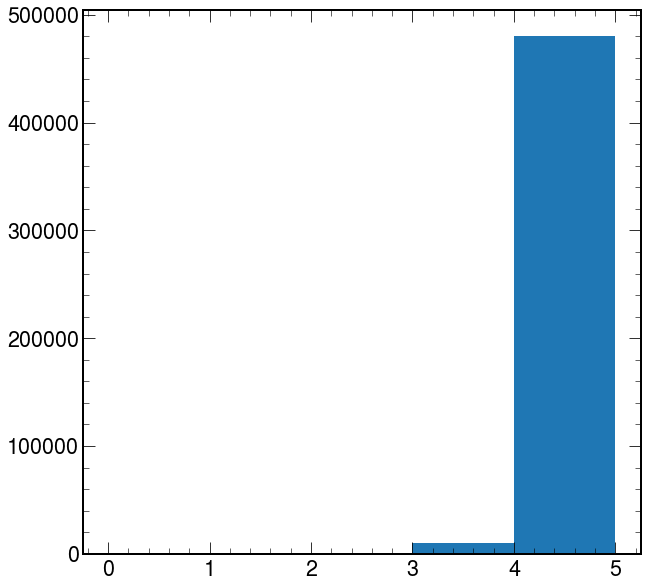

In [54]:
plt.hist(df_ev_ele.nseeds_calomatched, bins=5, range=(0,5))

### Plot of the number of DeepSC and Mustache inclusively

DeepSC:  2253415
Mustache:  2309637


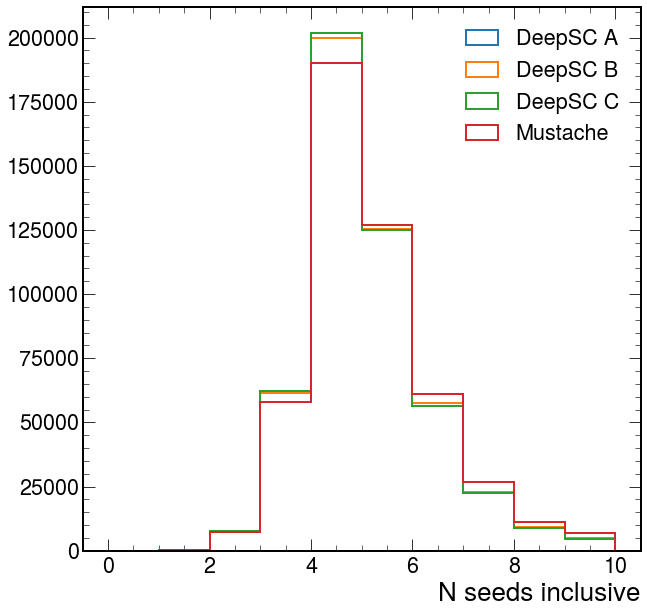

In [52]:
fig = plt.figure()
plt.hist(df_ev_ele.nseeds_deepsc, bins=10, range=(0,10), linewidth=2, histtype="step", label="DeepSC A",)
plt.hist(df_ev_ele_B.nseeds_deepsc, bins=10, range=(0,10), linewidth=2, histtype="step", label="DeepSC B",)
plt.hist(df_ev_ele_C.nseeds_deepsc, bins=10, range=(0,10), linewidth=2, histtype="step", label="DeepSC C",)
plt.hist(df_ev_ele.nseeds_must, bins=10, range=(0,10), linewidth=2, histtype="step", label="Mustache",)
plt.legend()
plt.xlabel("N seeds inclusive")
fig.savefig(output_folder + "/number_of_seeds_inclusive.png")
fig.savefig(output_folder + "/number_of_seeds_inclusive.pdf")

print("DeepSC: " , np.sum(df_ev_ele.nseeds_deepsc))
print("Mustache: " , np.sum(df_ev_ele.nseeds_must))

### Plot of the number of DeepSC and Mustache seeds which are matched to a caloparticle-seed

Text(1, 0, 'N. seeds calo-matched')

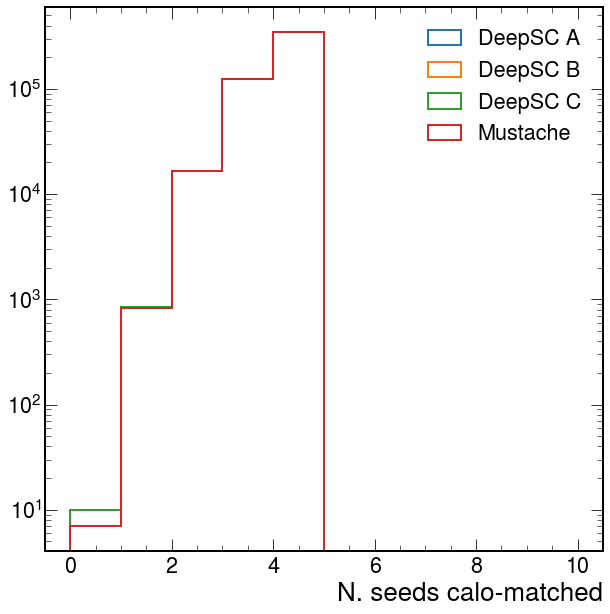

In [15]:
plt.hist(df_ev_ele.nseeds_calomatched_deepsc, bins=10, range=(0,10), linewidth=2, histtype="step", label="DeepSC A",)
plt.hist(df_ev_ele_B.nseeds_calomatched_deepsc, bins=10, range=(0,10), linewidth=2, histtype="step", label="DeepSC B",)
plt.hist(df_ev_ele_C.nseeds_calomatched_deepsc, bins=10, range=(0,10), linewidth=2, histtype="step", label="DeepSC C",)
plt.hist(df_ev_ele.nseeds_calomatched_must, bins=10, range=(0,10), linewidth=2, histtype="step", label="Mustache",)
plt.legend()
plt.yscale("log")
plt.xlabel("N. seeds calo-matched")

### Ratio of the matched seed for mustache and deepsc

/tmp/ipykernel_789/894313297.py:6: RuntimeWarning: invalid value encountered in true_divide
  R = B[0] / A[0]
No handles with labels found to put in legend.


(0.8, 1.2)

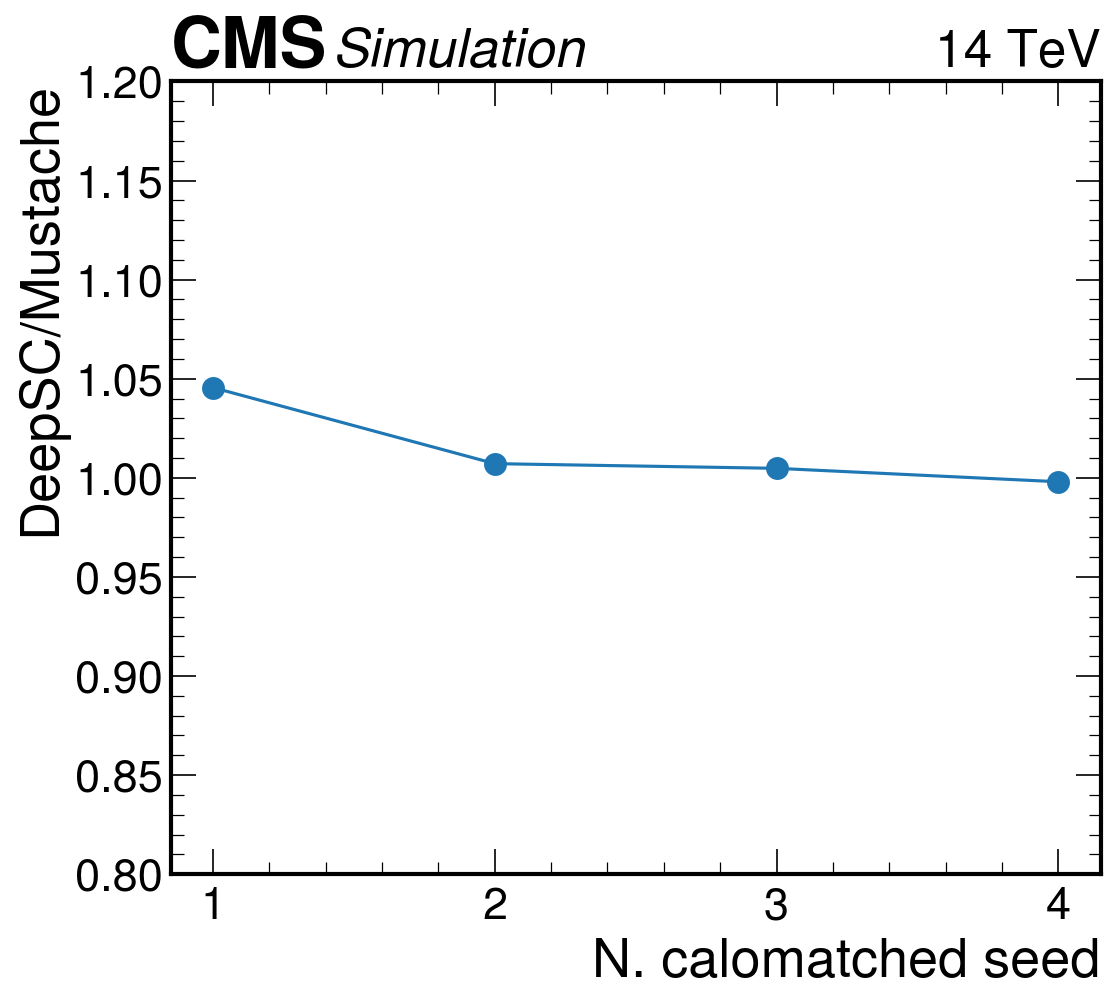

In [16]:
mask = df_ev_ele.nseeds_calomatched == 4

A = np.histogram(df_ev_ele[mask].nseeds_calomatched_must, range=(1,15), bins=14)
B = np.histogram(df_ev_ele[mask].nseeds_calomatched_deepsc, range=(1,15), bins=14)
        
R = B[0] / A[0]

fig,ax = plt.subplots(1,1, figsize=(8,7),dpi=150)

ax.plot(A[1][:-1], R, marker='o', markersize=10)

hep.cms.label(rlabel="14 TeV", loc=0, ax=ax)
ax.legend()
ax.set_xlabel("N. calomatched seed")
ax.set_ylabel("DeepSC/Mustache")
ax.set_ylim(0.8, 1.2)                                       

# fig.savefig(output_folder + "/number_of_clusters_by_eta_selected_{}.png".format(flavour))
# fig.savefig(output_folder + "/number_of_clusters_by_eta_selected_{}.pdf".format(flavour))




In [19]:
df_ev_ele.seeds_deepsc

0                     [3, 4, 0, 2]
1                     [2, 4, 0, 1]
2                     [1, 2, 0, 3]
3                 [3, 7, 63, 0, 1]
4        [1, 4, 12, 27, 36, 0, 13]
                   ...            
9995                     [1, 0, 2]
9996          [7, 22, 63, 0, 4, 5]
9997              [12, 9, 0, 1, 5]
9998                  [3, 0, 6, 4]
9999    [1, 8, 0, 3, 4, 5, 19, 10]
Name: seeds_deepsc, Length: 490100, dtype: object

In [20]:
df_ev_ele.seeds_must

0                         [3, 4, 0, 2]
1                         [2, 4, 0, 1]
2                         [1, 2, 0, 3]
3                         [3, 7, 0, 1]
4            [1, 4, 12, 27, 36, 0, 13]
                     ...              
9995                         [1, 0, 2]
9996              [7, 22, 63, 0, 4, 5]
9997                  [12, 9, 0, 1, 5]
9998                      [3, 0, 6, 4]
9999    [1, 8, 44, 0, 3, 4, 5, 19, 10]
Name: seeds_must, Length: 490100, dtype: object

In [133]:
type(df_ev_ele.iloc[0].seeds_must)

str

In [21]:
np.setdiff1d(df_ev_ele.seeds_must[0], df_ev_ele.seeds_deepsc[0], assume_unique=False)

array(['[0, 2, 25, 1, 13]', '[1, 2, 24, 41, 0, 3]', '[1, 3, 10, 0]',
       '[1, 3, 31, 100, 2, 0]', '[1, 8, 65, 0, 4]', '[3, 10, 0, 1, 6]',
       '[3, 6, 0, 1, 2, 4]'], dtype=object)

### Number of matched seeds comparing DeepSC and Mustache 

Fixing the number of calo-matched seeds to 4.

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(17,7), dpi=150)

for f,(df, flavour) in enumerate(zip([df_ev_ele, df_ev_gamma],["Electron", "Photon"]):
    ns = 4
    mask = df.nseeds_calomatched == ns

    hist, xbins, ybins, C = ax[f].hist2d(df[mask].nseeds_calomatched_must, df[mask].nseeds_calomatched_deepsc, bins=(ns,ns), range=((0,ns),(0,ns)),
                  norm=colors.LogNorm(vmax=1), density=True)

    for i in range(len(ybins)-1):
        for j in range(len(xbins)-1):
            ax[f].text(xbins[j]+0.5,ybins[i]+0.5, "{:.5f}".format(hist.T[i,j]), 
                    color="w", ha="center", va="center", fontweight="bold", fontsize="small")

    ax[f].set_ylabel("calo-matched DeepSC seeds", fontsize="small")
    ax[f].set_xlabel("calo-matched Mustace seeds", fontsize="small")
    ax[f].text(0.55, 1.02, flavour,  transform=ax[f].transAxes)
    fig.colorbar(C, ax=ax[f])
    
fig.savefig(output_folder + "/confusion_matrix_calomatched.png")
fig.savefig(output_folder + "/confusion_matrix_calomatched.pdf")

Same plot but with Electrons and photons together.

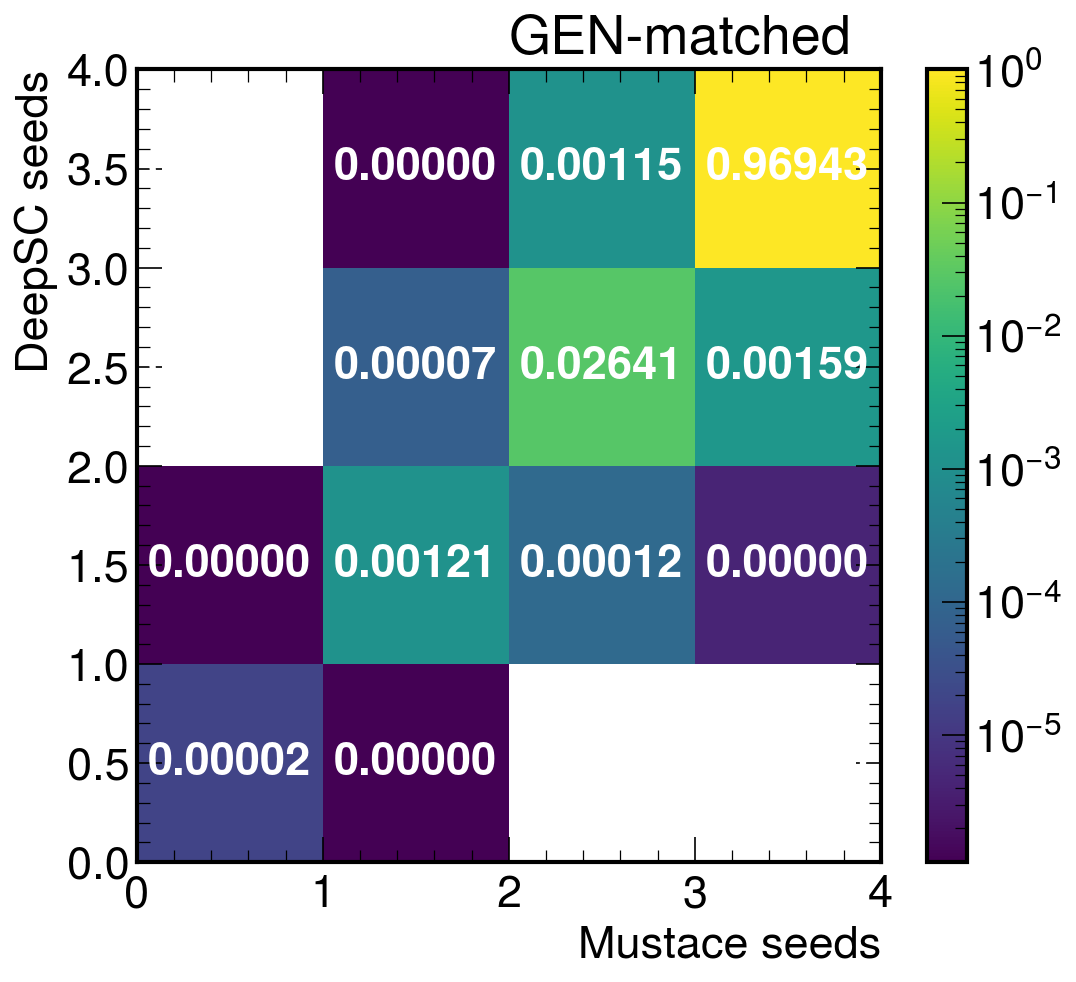

In [63]:
fig,ax = plt.subplots(1,1, figsize=(8,7), dpi=150)

df = df_ev_all
ns = 4
mask = df.nseeds_calomatched == ns

hist, xbins, ybins, C = ax.hist2d(df[mask].nseeds_calomatched_must, df[mask].nseeds_calomatched_deepsc, bins=(ns,ns), range=((0,ns),(0,ns)),
              norm=colors.LogNorm(vmax=1), density=True)

for i in range(len(ybins)-1):
    for j in range(len(xbins)-1):
        ax.text(xbins[j]+0.5,ybins[i]+0.5, "{:.5f}".format(hist.T[i,j]), 
                color="w", ha="center", va="center", fontweight="bold", fontsize="small")

ax.set_ylabel("DeepSC seeds", fontsize="small")
ax.set_xlabel("Mustace seeds", fontsize="small")

ax.text(0.5, 1.02, "GEN-matched", transform=ax.transAxes)

fig.colorbar(C, ax=ax)

fig.savefig(output_folder + "/confusion_matrix_calomatched.png")
fig.savefig(output_folder + "/confusion_matrix_calomatched.pdf")

### Correlation between Mustache and DeepSC seeds number 

The plot is done event by event analyzing the two reconstructions

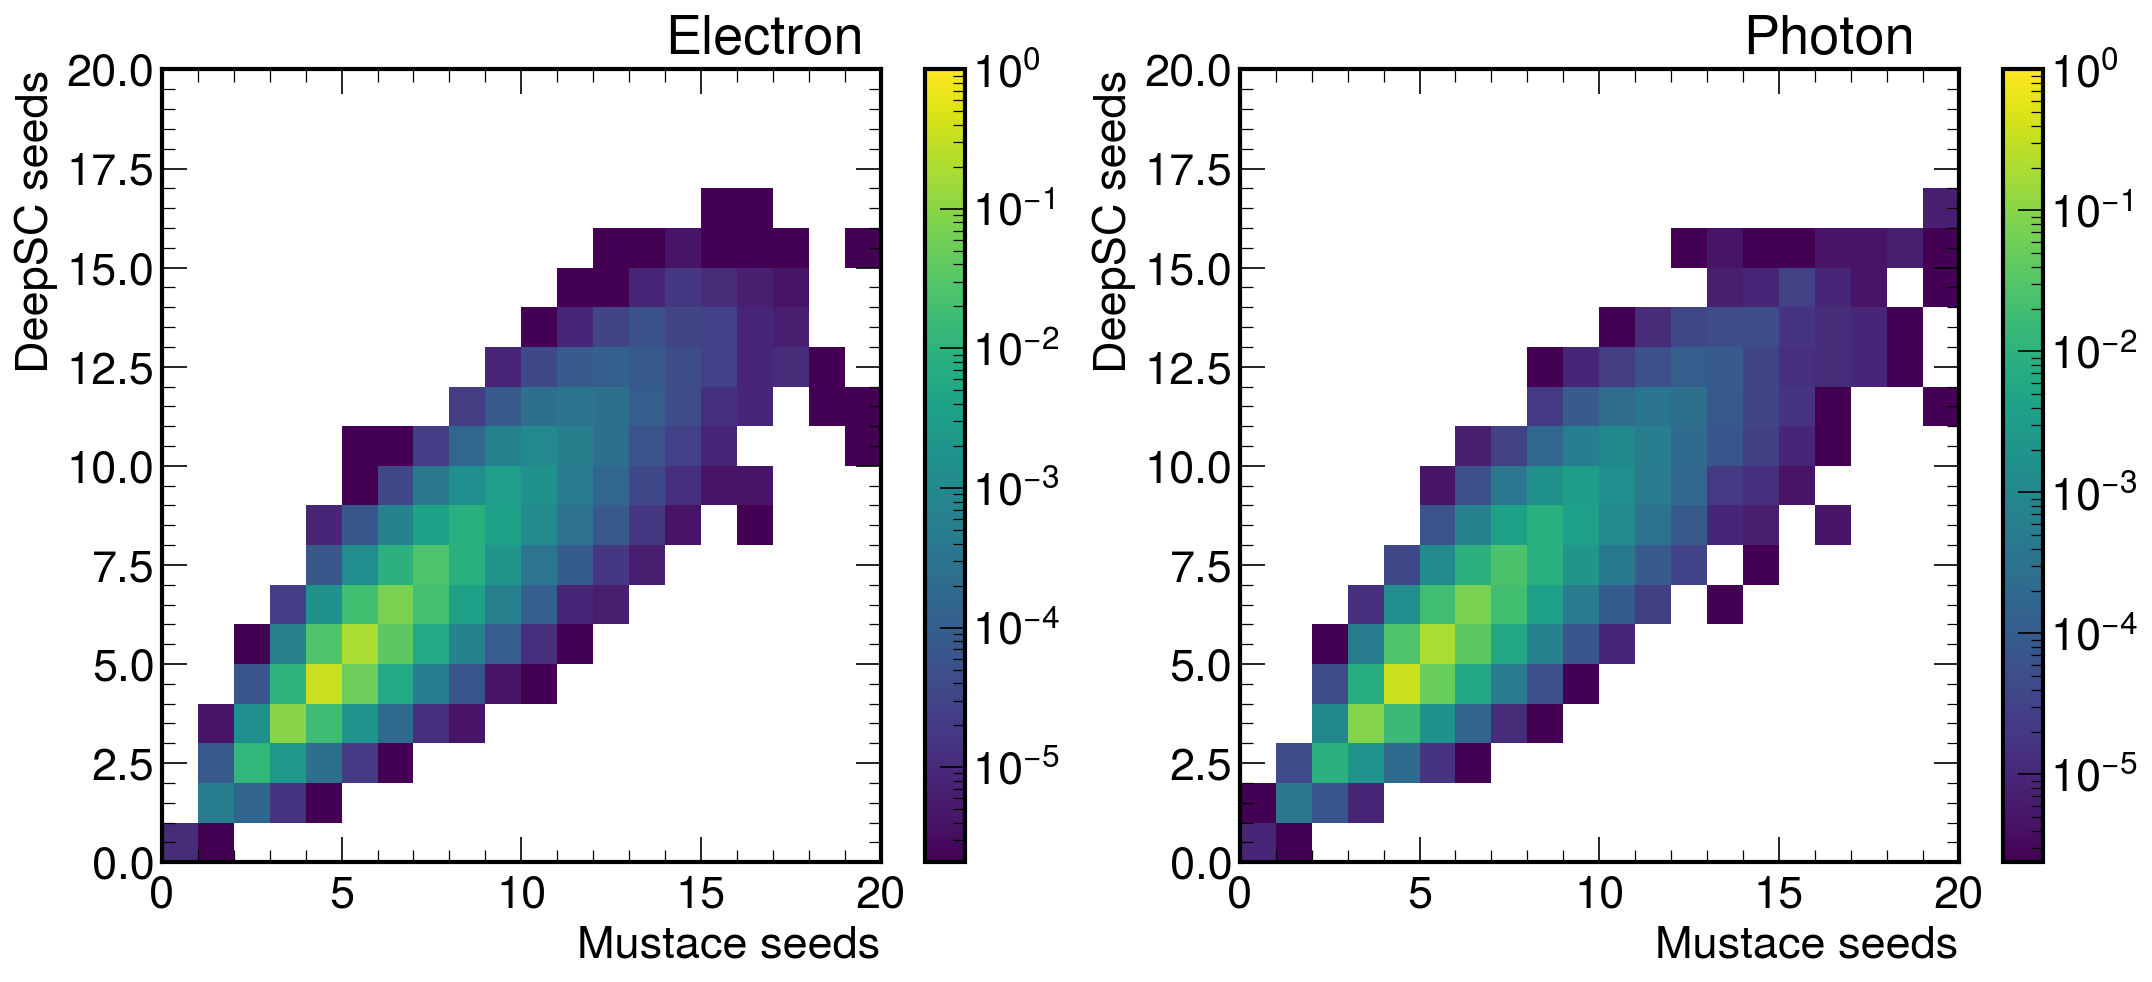

In [60]:
fig,ax = plt.subplots(1,2, figsize=(17,7), dpi=150)

for f, (df,flavour) in enumerate(zip([df_ev_ele, df_ev_gamma],["Electron", "Photon"])):

    mask = df.nseeds_calomatched == 4
    ns = 20

    hist, xbins, ybins, C = ax[f].hist2d(df[mask].nseeds_must, df[mask].nseeds_deepsc, bins=(ns,ns), range=((0,ns),(0,ns)),
                  norm=colors.LogNorm(vmax=1), density=True, cmap="viridis")

#     for i in range(len(ybins)-1):
#         for j in range(len(xbins)-1):
#             ax[f].text(xbins[j]+0.5,ybins[i]+0.5, "{:.5f}".format(hist.T[i,j]), 
#                     color="w", ha="center", va="center", fontweight="bold", fontsize="small")

    ax[f].set_ylabel("DeepSC seeds", fontsize="small")
    ax[f].set_xlabel("Mustace seeds", fontsize="small")

    fig.colorbar(C, ax=ax[f])
    ax[f].text(0.7, 1.02, flavour,  transform=ax[f].transAxes)
    
fig.savefig(output_folder + "/confusion_matrix.png")
fig.savefig(output_folder + "/confusion_matrix.pdf")

Profile of the previous plot

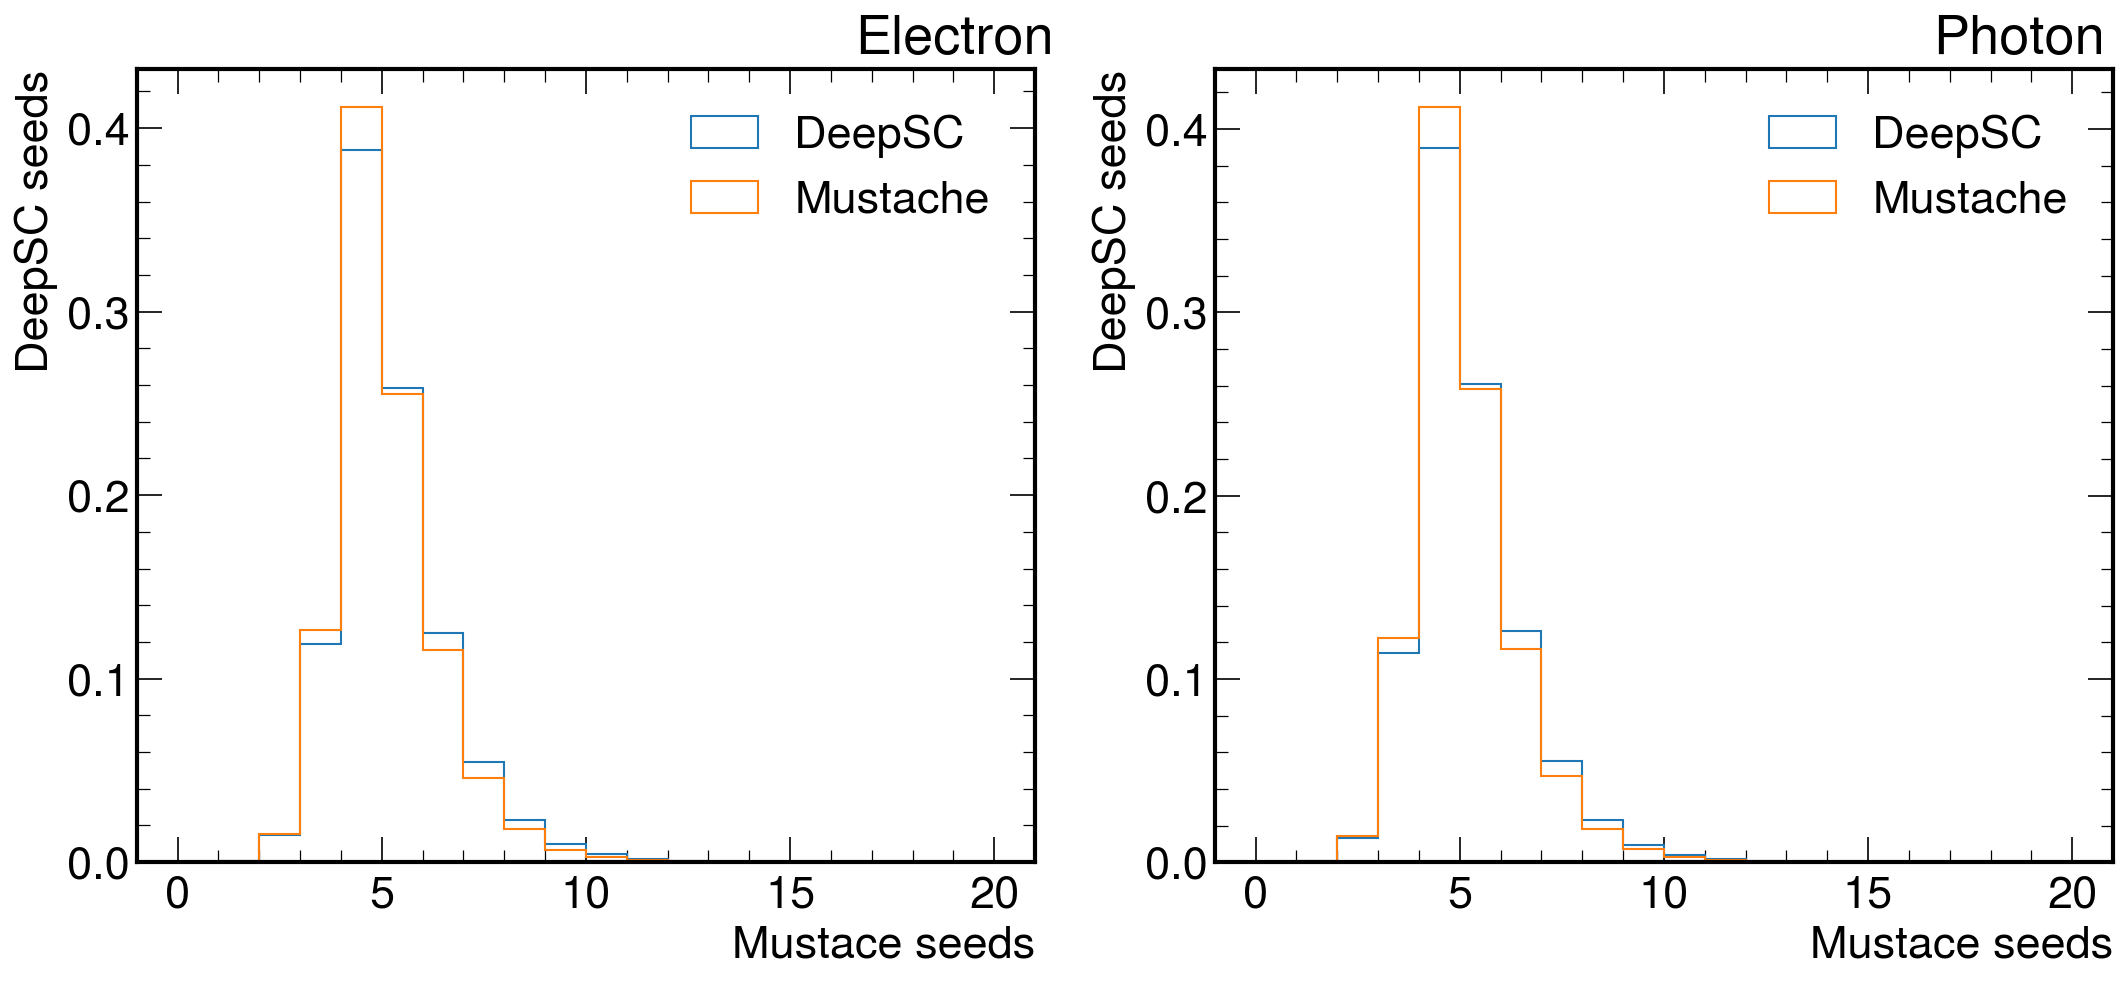

In [33]:
fig,ax = plt.subplots(1,2, figsize=(17,7), dpi=150)

for f, (df,flavour) in enumerate(zip([df_ev_ele, df_ev_gamma],["Electron", "Photon"])):

    mask = df.nseeds_calomatched >0
    ns = 20

    ax[f].hist(df[mask].nseeds_must, bins=ns, range=(0,ns),
                 density=True,histtype="step",label="DeepSC")
    ax[f].hist(df[mask].nseeds_deepsc, bins=ns, range=(0,ns),
                 density=True, histtype="step", label="Mustache")
    ax[f].legend()

#     for i in range(len(ybins)-1):
#         for j in range(len(xbins)-1):
#             ax[f].text(xbins[j]+0.5,ybins[i]+0.5, "{:.5f}".format(hist.T[i,j]), 
#                     color="w", ha="center", va="center", fontweight="bold", fontsize="small")

    ax[f].set_ylabel("DeepSC seeds", fontsize="small")
    ax[f].set_xlabel("Mustace seeds", fontsize="small")

#     fig.colorbar(C, ax=ax[f])
    ax[f].text(0.8, 1.02, flavour,  transform=ax[f].transAxes)
    
# fig.savefig(output_folder + "/confusion_matrix.png")
# fig.savefig(output_folder + "/confusion_matrix.pdf")

## Check on the total number of clusters

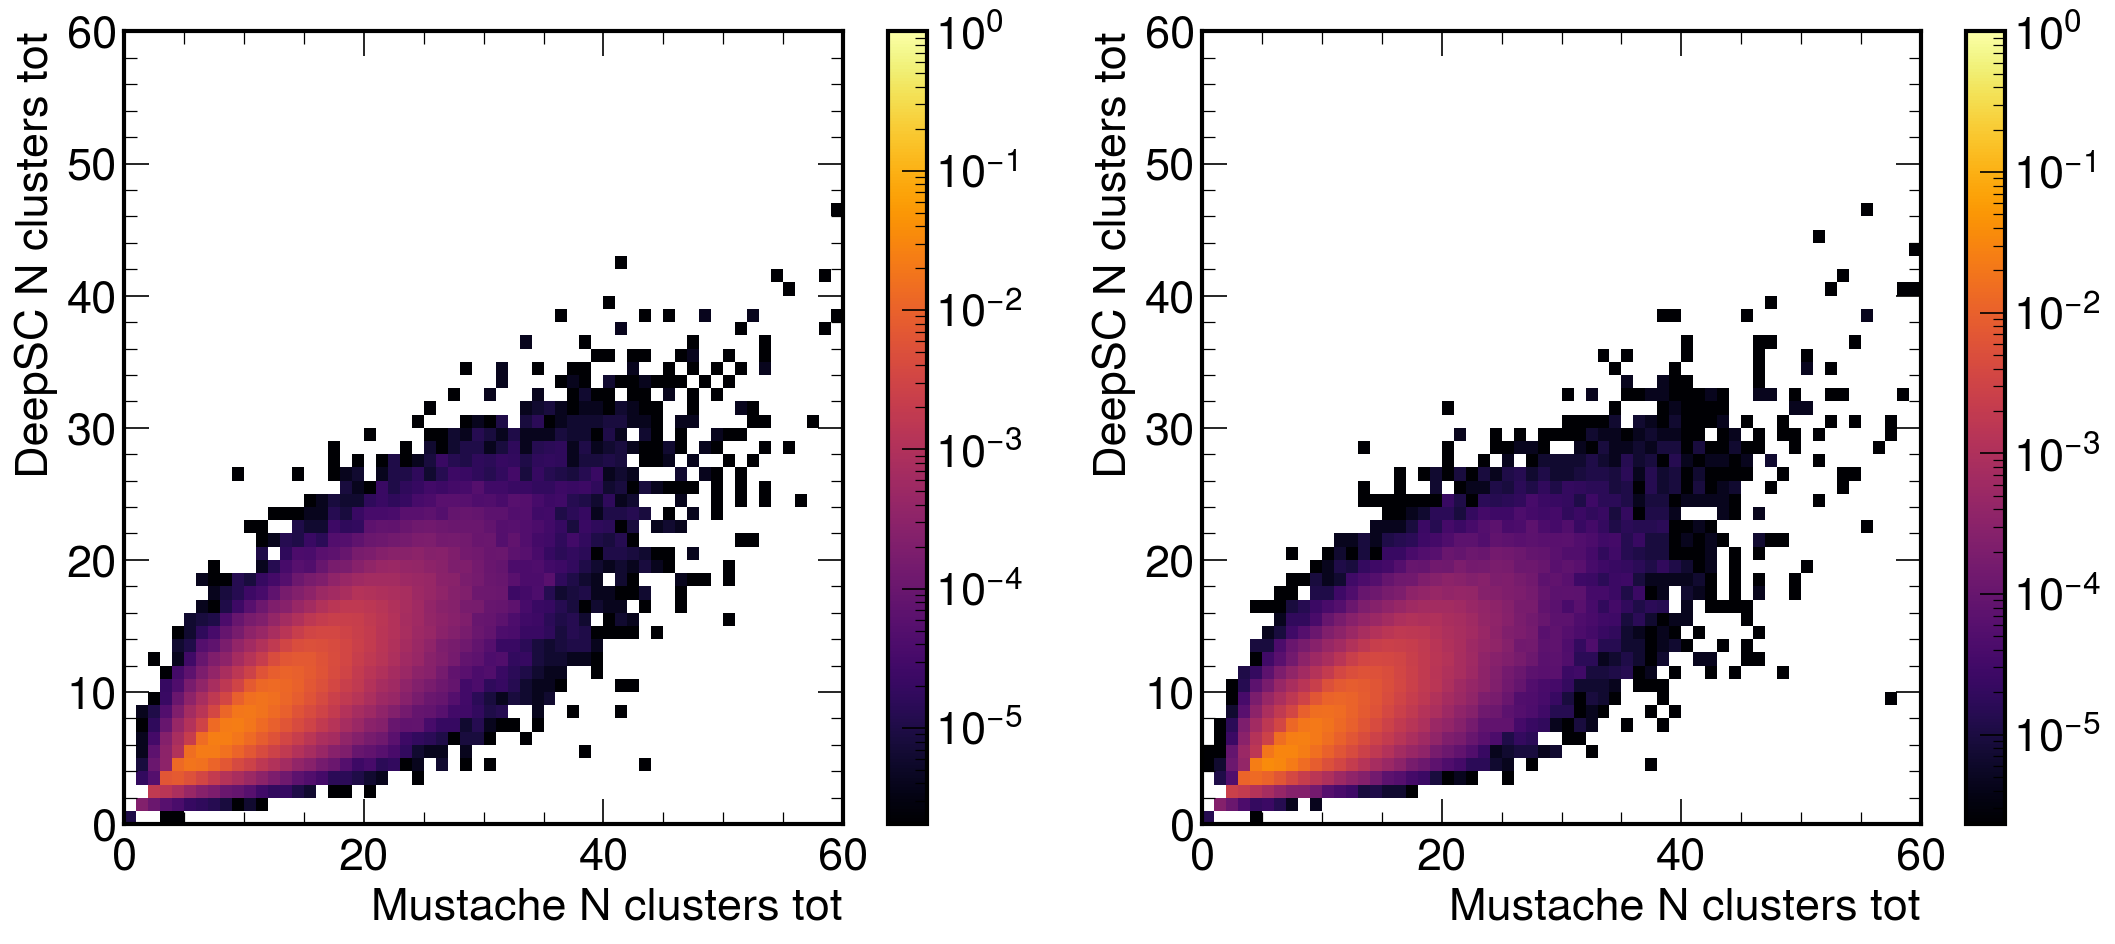

In [24]:
fig,ax = plt.subplots(1,2, figsize=(17,7), dpi=150)

for f, df in enumerate([df_ev_ele, df_ev_gamma]):

    ns = 60

    hist, xbins, ybins, C = ax[f].hist2d(df.ncls_tot_must, df.ncls_tot_deepsc, bins=(ns,ns), range=((0,ns),(0,ns)),
                  norm=colors.LogNorm(vmax=1), density=True, cmap="inferno")

    ax[f].set_ylabel("DeepSC N clusters tot", fontsize="small")
    ax[f].set_xlabel("Mustache N clusters tot", fontsize="small")

    fig.colorbar(C, ax=ax[f])
    
fig.savefig(output_folder + "/ncls_tot.png")
fig.savefig(output_folder + "/ncls_tot.pdf")

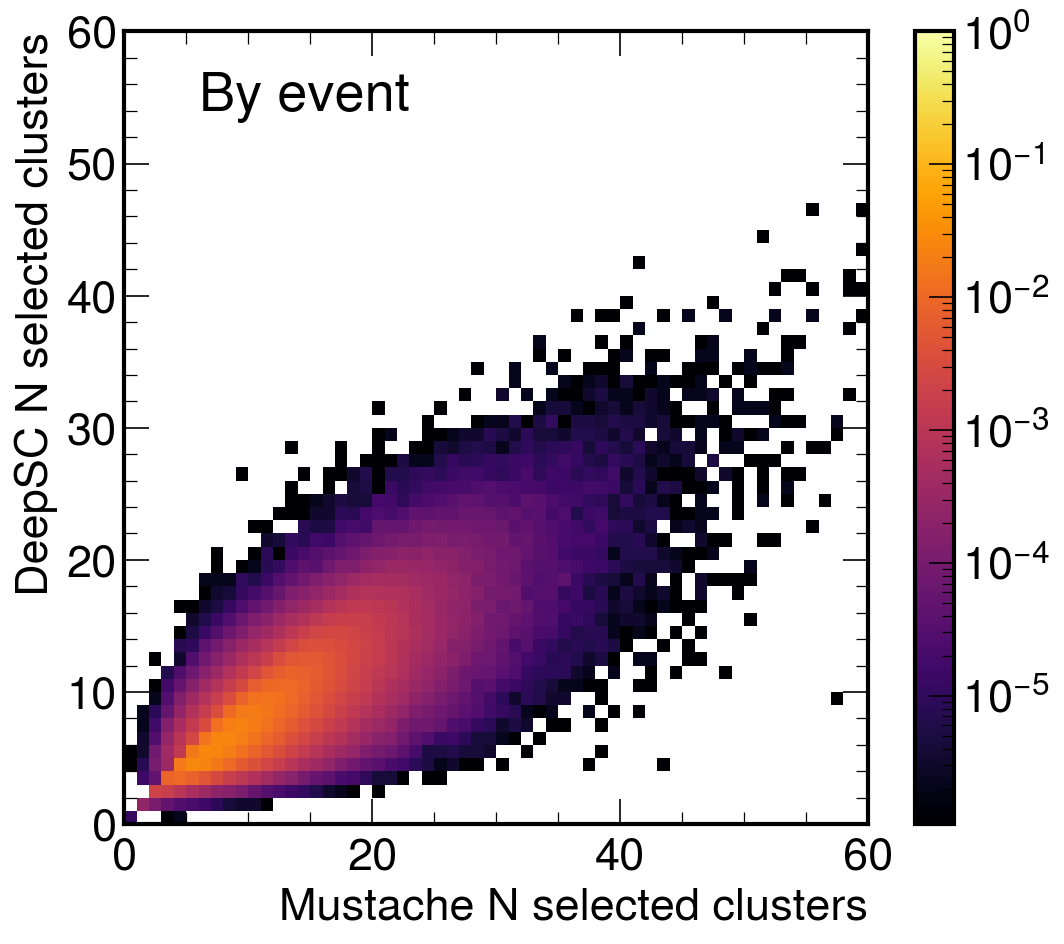

In [150]:
fig,ax = plt.subplots(1,1, figsize=(8,7), dpi=150)
df = df_ev_all
ns = 60

hist, xbins, ybins, C = ax.hist2d(df.ncls_tot_must, df.ncls_tot_deepsc, bins=(ns,ns), range=((0,ns),(0,ns)),
              norm=colors.LogNorm(vmax=1), density=True, cmap="inferno")

ax.set_ylabel("DeepSC N selected clusters", fontsize="small")
ax.set_xlabel("Mustache N selected clusters", fontsize="small")

ax.text(0.1, 0.9, "By event", transform=ax.transAxes)


fig.colorbar(C, ax=ax)
    
fig.savefig(output_folder + "/ncls_tot_elegamma.png")
fig.savefig(output_folder + "/ncls_tot_elegamma.pdf")

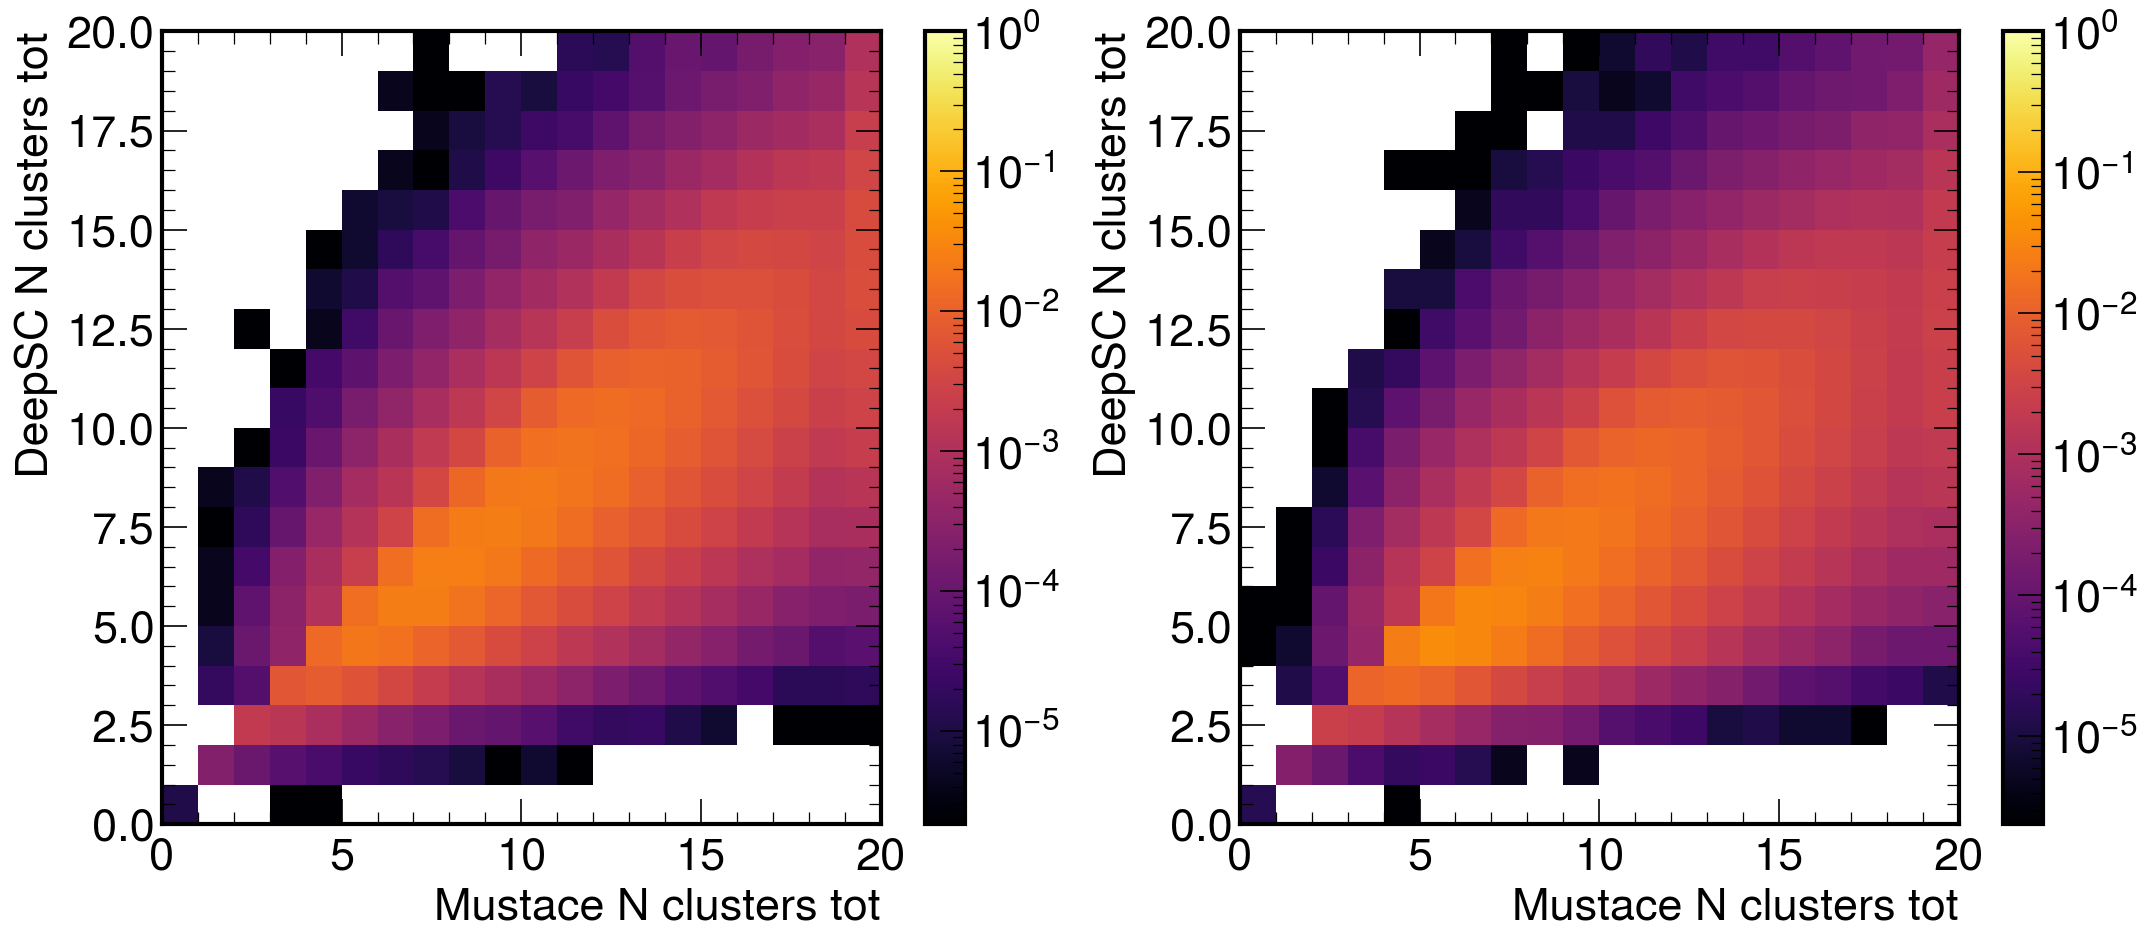

In [110]:
fig,ax = plt.subplots(1,2, figsize=(17,7), dpi=150)

for f, df in enumerate([df_ev_ele, df_ev_gamma]):

    ns = 20

    hist, xbins, ybins, C = ax[f].hist2d(df.ncls_tot_must, df.ncls_tot_deepsc, bins=(ns,ns), range=((0,ns),(0,ns)),
                  norm=colors.LogNorm(vmax=1), density=True, cmap="inferno")

    ax[f].set_ylabel("DeepSC N clusters tot", fontsize="small")
    ax[f].set_xlabel("Mustace N clusters tot", fontsize="small")

    fig.colorbar(C, ax=ax[f])

In [89]:
df_ev_ele.columns

Index(['output_event.csv', 'ncls_tot_deepsc', 'ncls_tot_must',
       'nseeds_calomatched', 'nseeds_calomatched_deepsc',
       'nseeds_calomatched_must', 'nseeds_deepsc', 'nseeds_must',
       'nseeds_nocalomatched', 'seeds_calomatched_deepsc',
       'seeds_calomatched_must', 'seeds_deepsc', 'seeds_must'],
      dtype='object')

# Analysis of seed by seed info

Matching procedure:
- For each calo the highest score cluster is considered as a calo-seed (calomatched==1)
- we look for DeepSC or Mustache Superclusters with the same seed --> in_deepsc or in_mustache label. 

- Then we look for all the Mustache and SuperCluster objects that are not matched and we save some info. 


In [64]:
df_ele = pd.HDFStore("/eos/user/r/rdfexp/ecal/cluster/output_deepcluster_dumper/reco_comparison/electrons/ele_UL18_123X_algoA_v2_seed.h5py", "r")["df"]
df_gamma = pd.HDFStore("/eos/user/r/rdfexp/ecal/cluster/output_deepcluster_dumper/reco_comparison/gammas/gamma_UL18_123X_algoA_v2_seed.h5py", "r")["df"]

In [65]:
df_all = pd.concat([df_ele, df_gamma])

In [66]:
df_ele.columns

Index(['output_seeds.csv', 'calo_en_true_sim', 'calo_et_true_gen',
       'calo_et_true_sim', 'calo_geneta', 'calo_genphi', 'calo_simeta',
       'calo_simphi', 'calomatched', 'cls_deepsc', 'cls_must',
       'en_deepsc_calib', 'en_deepsc_raw', 'en_mustache_calib',
       'en_mustache_raw', 'en_seed', 'en_seed_calib', 'et_deepsc_calib',
       'et_deepsc_raw', 'et_mustache_calib', 'et_mustache_raw', 'et_seed',
       'et_seed_calib', 'event_tot_simen_PU', 'in_deepsc', 'in_mustache',
       'nVtx', 'ncls_deepsc', 'ncls_mustache', 'ncls_tot', 'ncls_true',
       'obsPU', 'rho', 'seed_eta', 'seed_iz', 'seed_phi', 'truePU'],
      dtype='object')

## Analyze the seed matching

### Distribution of Gen Et and seed eta for matched seeds

Text(1, 0, 'Seed Eta')

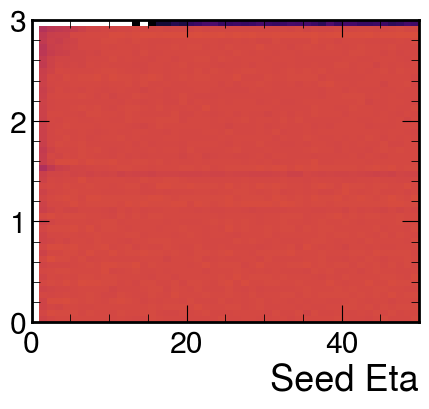

In [75]:
fig,ax = plt.subplots(1,1, figsize=(5,4), dpi=100)
mask = (df_all.calomatched==1)

ax.hist2d(df_all[mask].calo_et_true_gen, df_all[mask].seed_eta.abs(), bins=(50,50), range=((0,50),(0,3)), density=True, 
          norm=colors.LogNorm(vmax=1),cmap="inferno")
ax.set_xlabel("Calo ET")
ax.set_xlabel("Seed Eta")

### Delta R from GEN for calo-matched  and not calo-matched seeds

In [80]:
def deltaphi(a, b):
    return (a - b + np.pi) % (2 * np.pi) - np.pi

Text(1, 0, 'dR seed-GEN not calomatched')

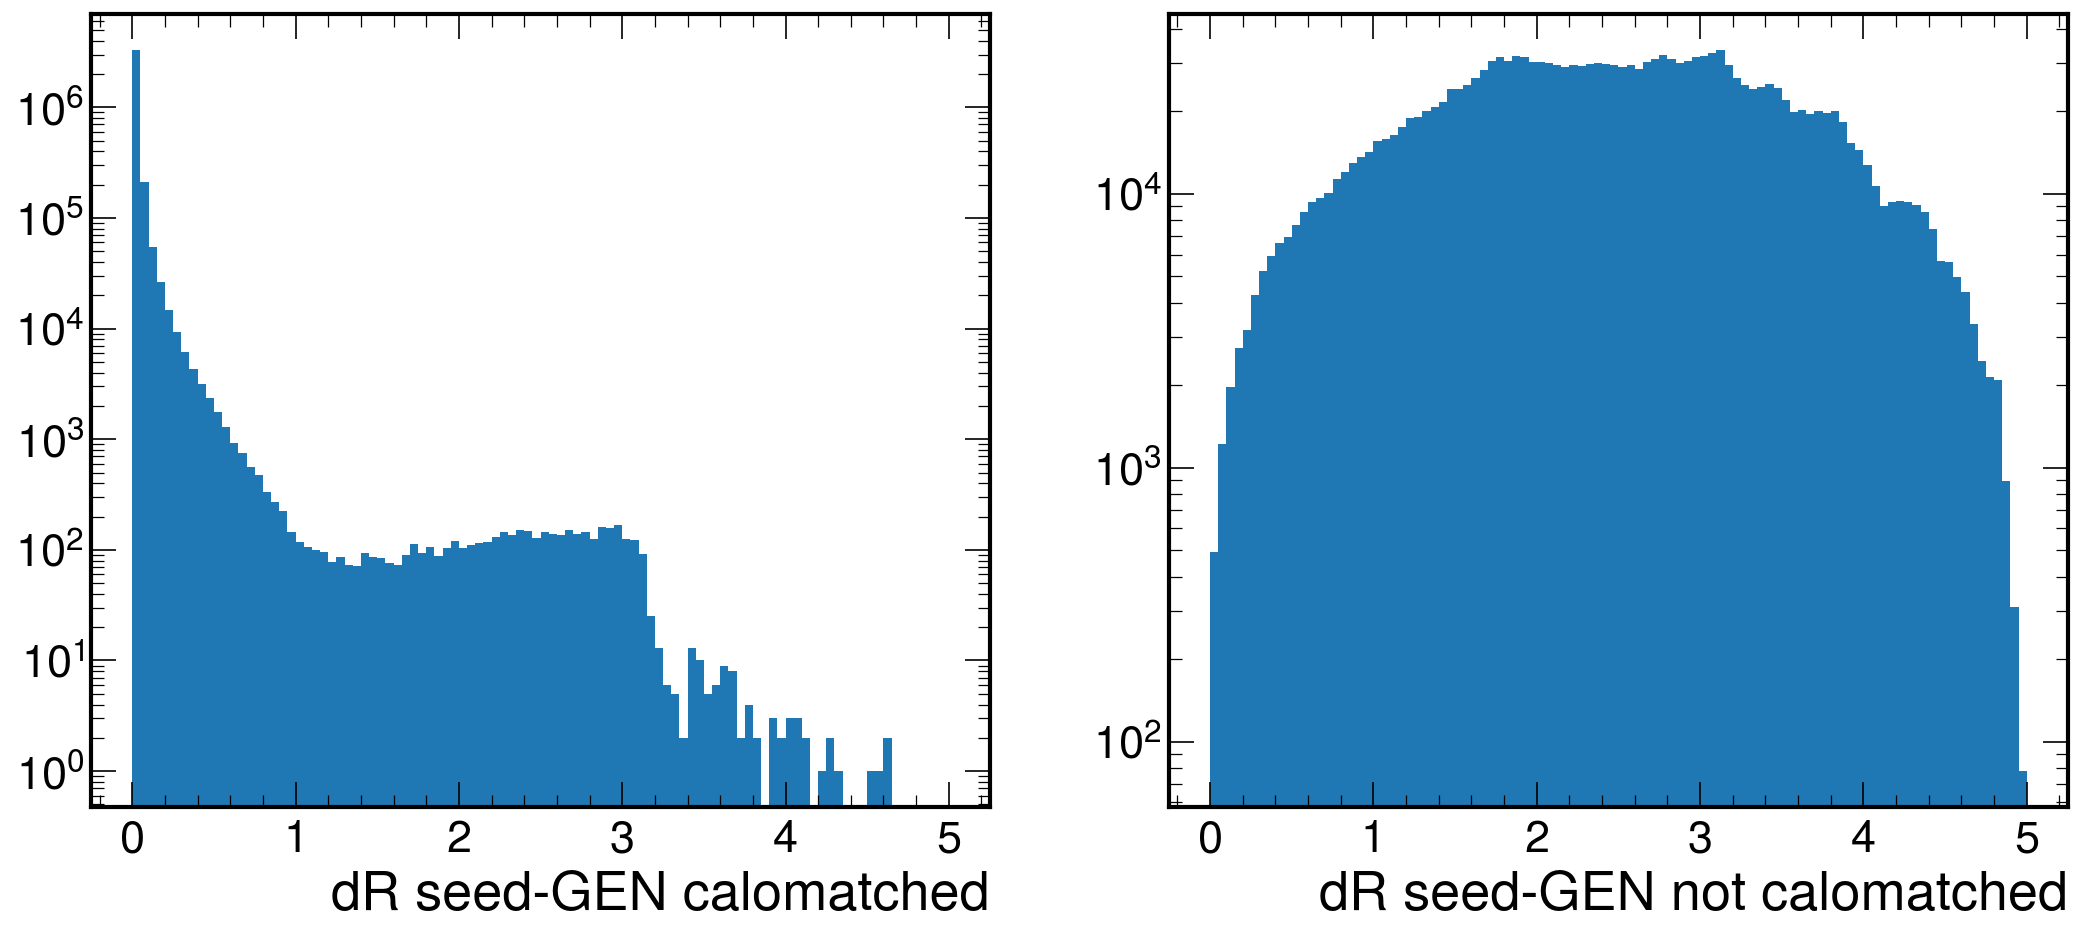

In [91]:
fig,ax = plt.subplots(1,2, figsize=(17,7), dpi=150)

cm = df_all.calomatched ==1
ncm = df_all.calomatched == 0
dR_mat = np.sqrt(deltaphi(df_all[cm].seed_phi, df_all[cm].calo_genphi)**2 + (df_all[cm].seed_eta - df_all[cm].calo_geneta)**2)
dR_nomat = np.sqrt(deltaphi(df_all[ncm].seed_phi, df_all[ncm].calo_genphi)**2 + (df_all[ncm].seed_eta - df_all[ncm].calo_geneta)**2)
ax[0].hist(dR_mat, bins=100, range=(0,5))
ax[0].set_yscale("log")
ax[0].set_xlabel("dR seed-GEN calomatched")
ax[1].hist(dR_nomat, bins=100, range=(0,5))
ax[1].set_yscale("log")
ax[1].set_xlabel("dR seed-GEN not calomatched")

Text(1, 0, 'Seed Eta')

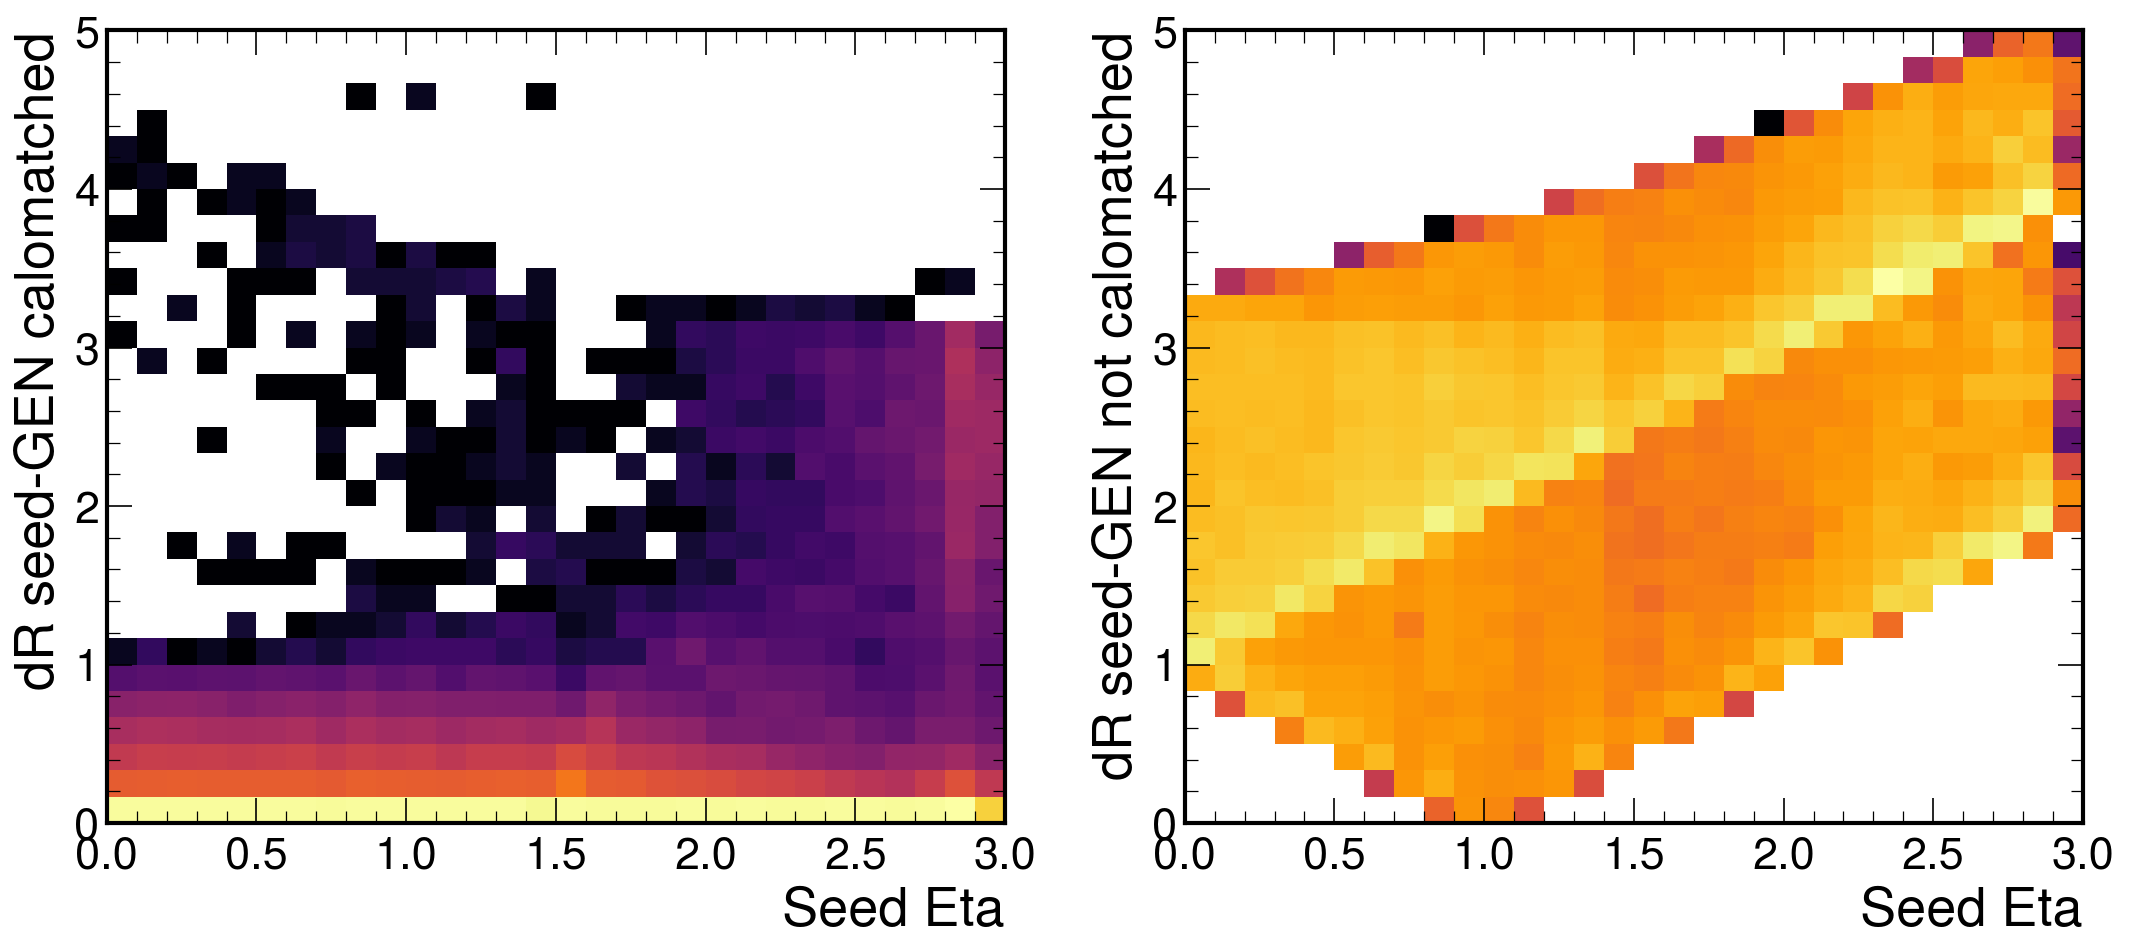

In [97]:
fig,ax = plt.subplots(1,2, figsize=(17,7), dpi=150)
ax[0].hist2d(df_all[cm].seed_eta.abs(), dR_mat, bins=(30,30), range=((0,3),(0,5)), norm=colors.LogNorm(), cmap="inferno")
#ax[0].set_yscale("log")
ax[0].set_ylabel("dR seed-GEN calomatched")
ax[0].set_xlabel("Seed Eta")
ax[1].hist2d(df_all[ncm].seed_eta.abs(), dR_nomat, bins=(30,30), range=((0,3),(0,5)),norm=colors.LogNorm(), cmap="inferno")

# ax[1].set_yscale("log")
ax[1].set_ylabel("dR seed-GEN not calomatched")
ax[1].set_xlabel("Seed Eta")

## Plots with DeepSC and Mustache calomatched both to the same seed

Comparison of the number of selected clusters and the total selected energy along the detector.

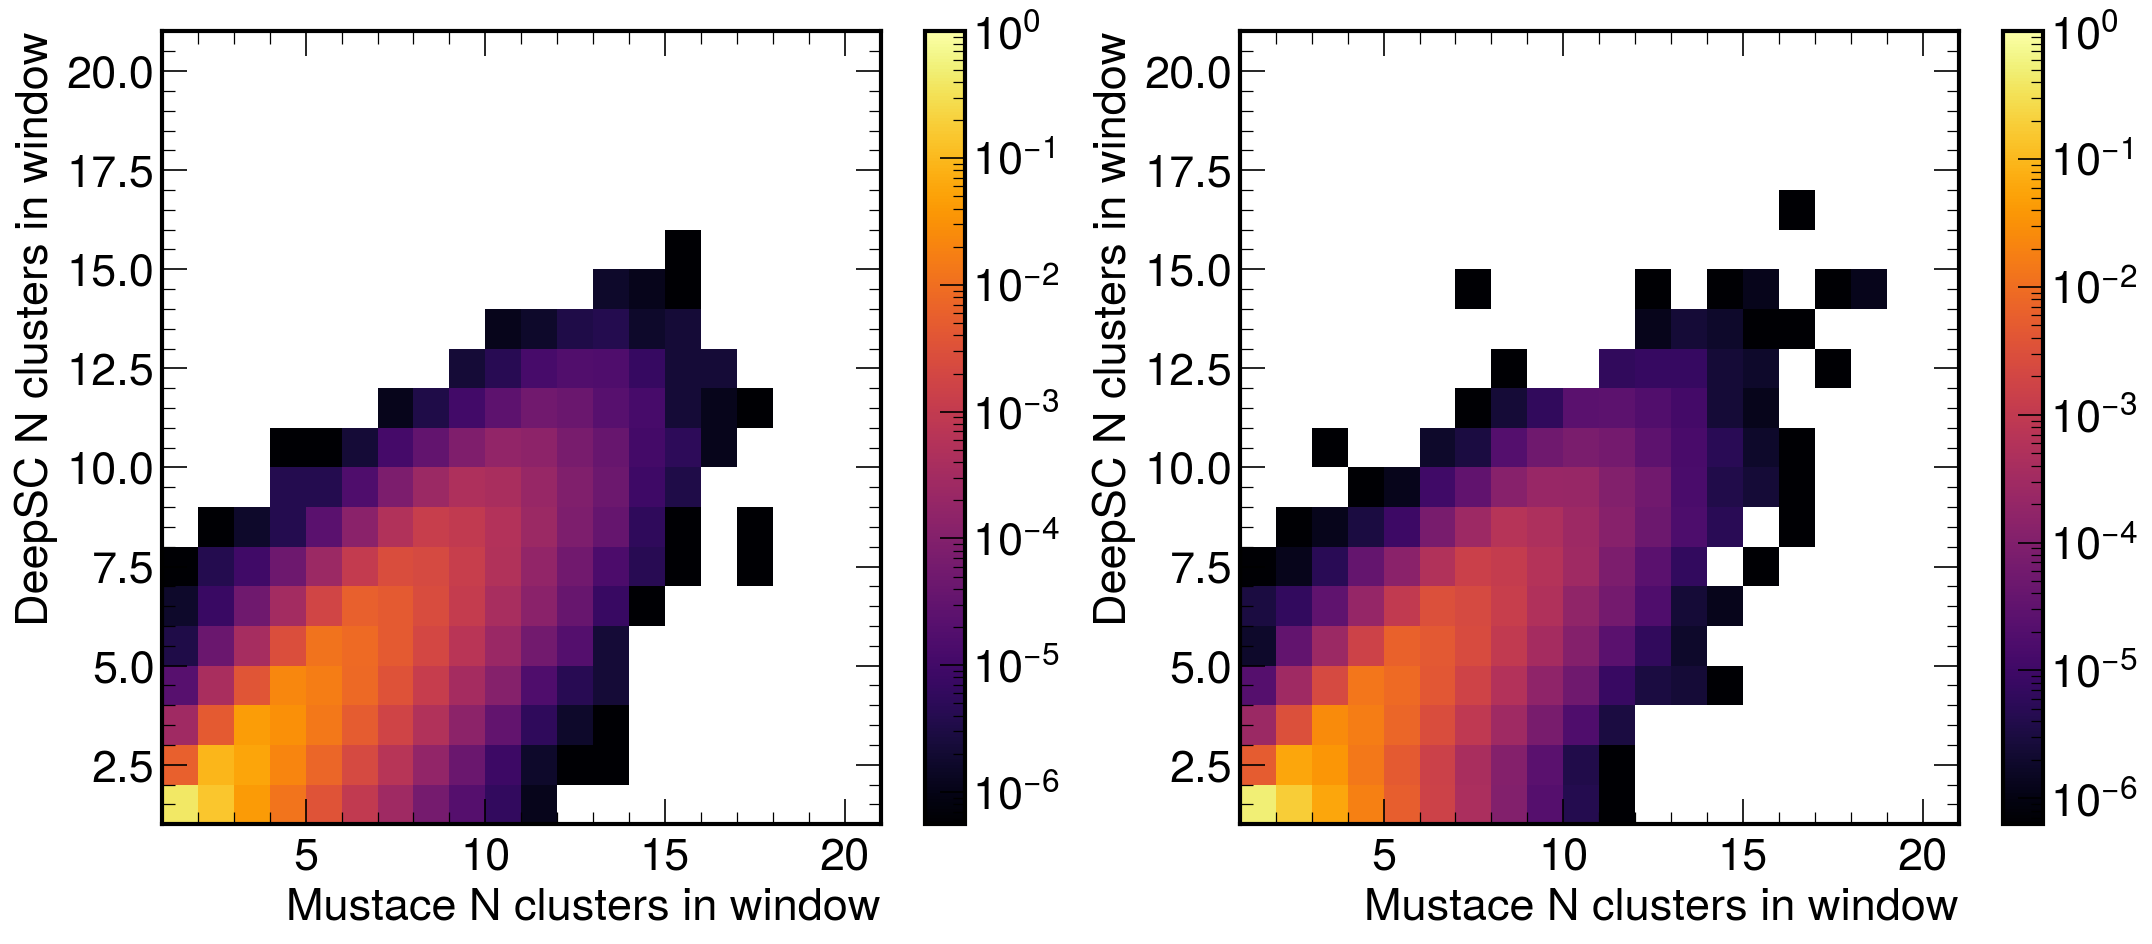

In [37]:
fig,ax = plt.subplots(1,2, figsize=(17,7), dpi=150)

for f, df in enumerate([df_ele, df_gamma]):

    ns = 20
    
    # Full calo match
    mask = (df.in_deepsc ==1) & (df.in_mustache==1) & (df.calomatched ==1)

    hist, xbins, ybins, C = ax[f].hist2d(df[mask].ncls_mustache, df[mask].ncls_deepsc, bins=(ns,ns), range=((1,ns+1),(1,ns+1)),
                  norm=colors.LogNorm(vmax=1), density=True, cmap="inferno")

    ax[f].set_ylabel("DeepSC N clusters in window", fontsize="small")
    ax[f].set_xlabel("Mustace N clusters in window", fontsize="small")

    fig.colorbar(C, ax=ax[f])
    
fig.savefig(output_folder + "/ncls_inwindow.png")
fig.savefig(output_folder + "/ncls_inwindow.pdf")

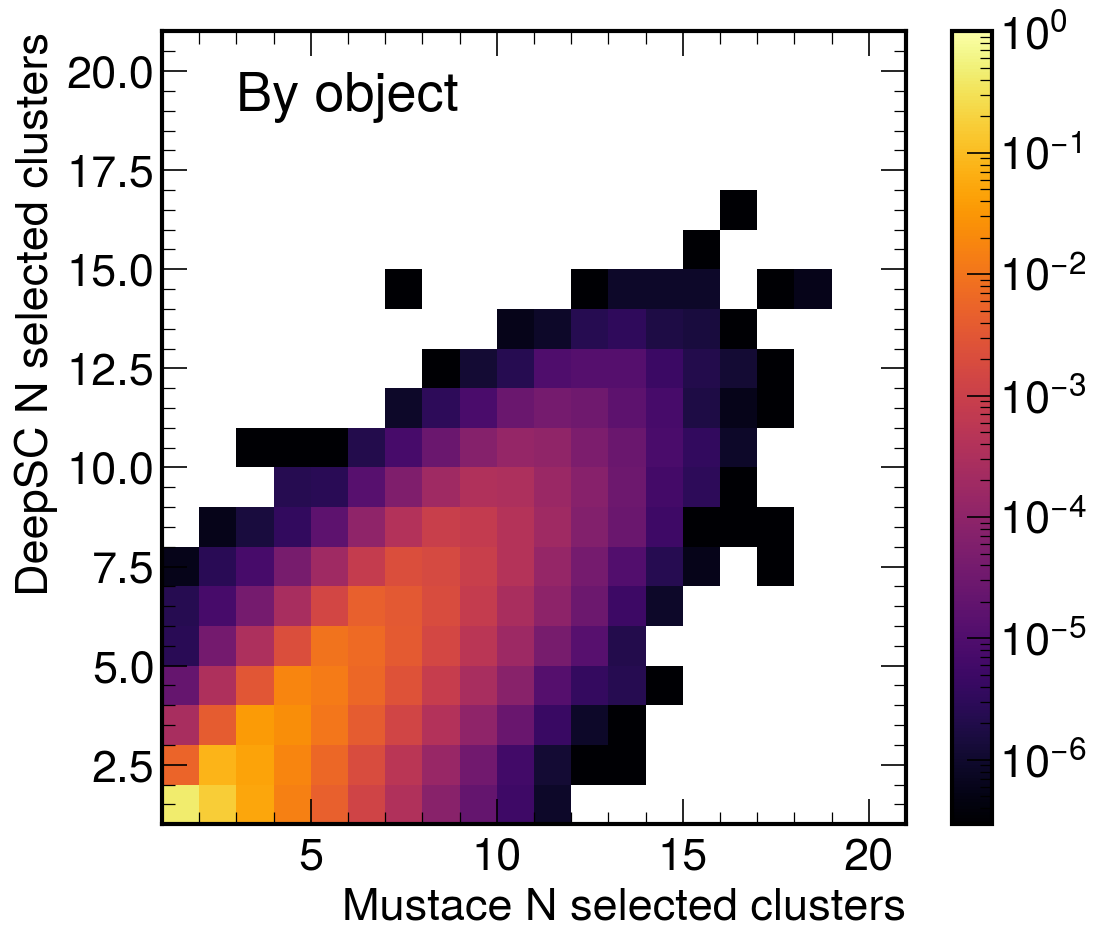

In [149]:
fig,ax = plt.subplots(1,1, figsize=(8,7), dpi=150)

df = df_all
ns = 20

mask = (df.in_deepsc ==1) & (df.in_mustache==1) & (df.calomatched ==1)

hist, xbins, ybins, C = ax.hist2d(df[mask].ncls_mustache, df[mask].ncls_deepsc, bins=(ns,ns), range=((1,ns+1),(1,ns+1)),
              norm=colors.LogNorm(vmax=1), density=True, cmap="inferno")

ax.set_ylabel("DeepSC N selected clusters", fontsize="small")
ax.set_xlabel("Mustace N selected clusters", fontsize="small")

ax.text(0.1, 0.9, "By object", transform=ax.transAxes)

fig.colorbar(C, ax=ax)
    
fig.savefig(output_folder + "/ncls_inwindow_elegamma.png")
fig.savefig(output_folder + "/ncls_inwindow_elegamma.pdf")

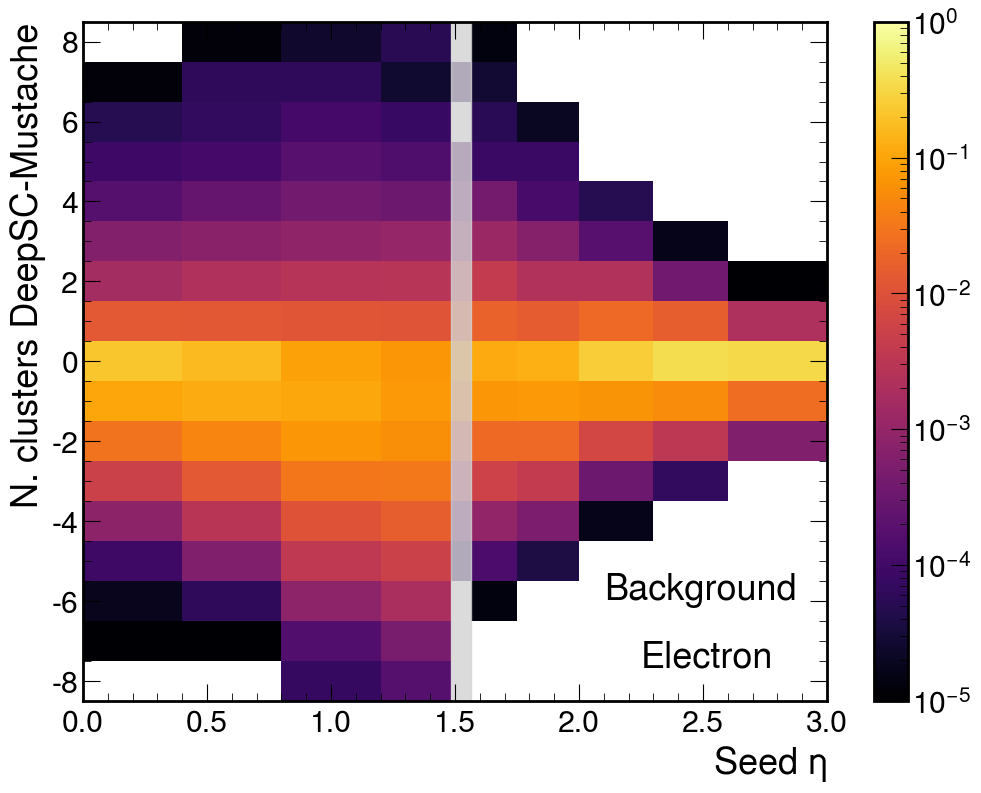

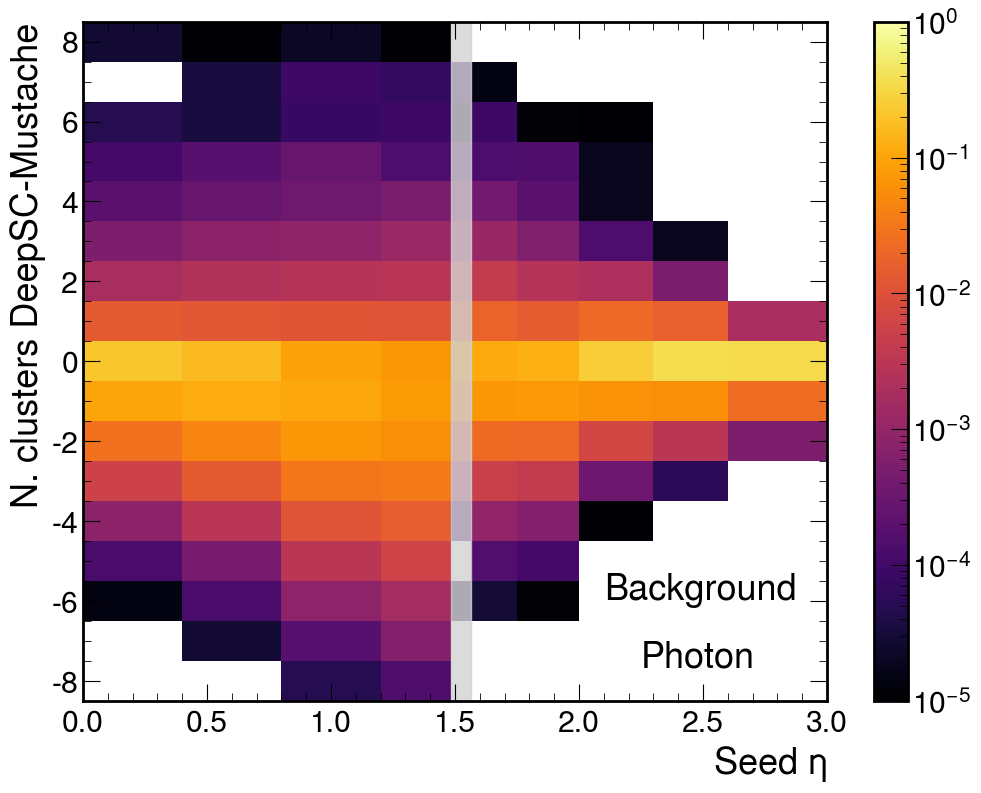

In [117]:
etas =  [0, 0.4,0.8, 1.2,1.485, 1.566, 1.75,2.,2.3,2.6,3]
xbins = [-8.5, -7.5, -6.5,-5.5,-4.5,-3.5,-2.5,-1.5,-0.5,0.5, 1.5 ,2.5 ,3.5, 4.5 ,5.5,6.5,7.5,8.5]

for df, flavour in zip([df_ele, df_gamma],["Electron", "Photon"]):
    mask = (df.in_deepsc == 1) & (df.in_mustache==1) & (df.calomatched != 1)

    fig, ax = plt.subplots(1,1, figsize=(12,9),dpi=100)
    A  = ax.hist2d(abs(df[mask].seed_eta), df[mask].ncls_deepsc - df[mask].ncls_mustache, bins=(etas, xbins ), cmap="inferno",
                   density=True, norm=colors.LogNorm(vmax=1, vmin=1e-5) )
    
    ax.fill_between([1.485, 1.566], [-8.5,-8.5],[8.5,8.5], color="lightgray", alpha=0.8)

    fig.colorbar(A[3], ax=ax)   
    ax.set_ylabel("N. clusters DeepSC-Mustache")
    ax.set_xlabel("Seed $\eta$")
    ax.text(0.7, 0.15, "Background", transform=ax.transAxes)
    ax.text(0.75, 0.05, flavour, transform=ax.transAxes)


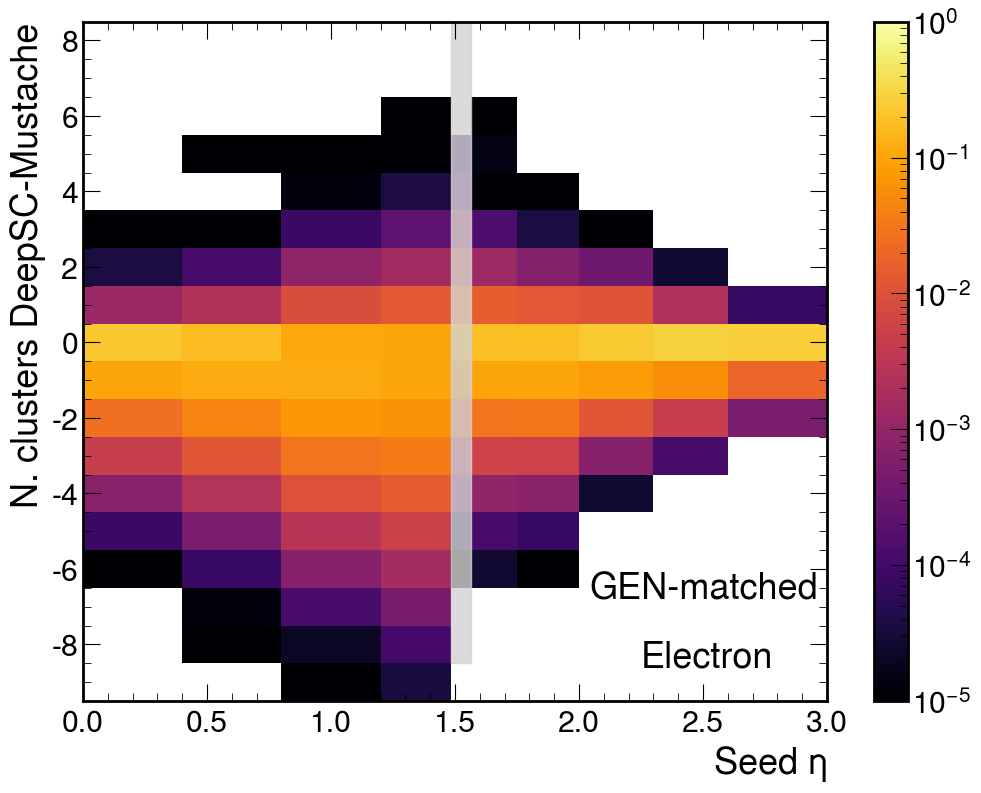

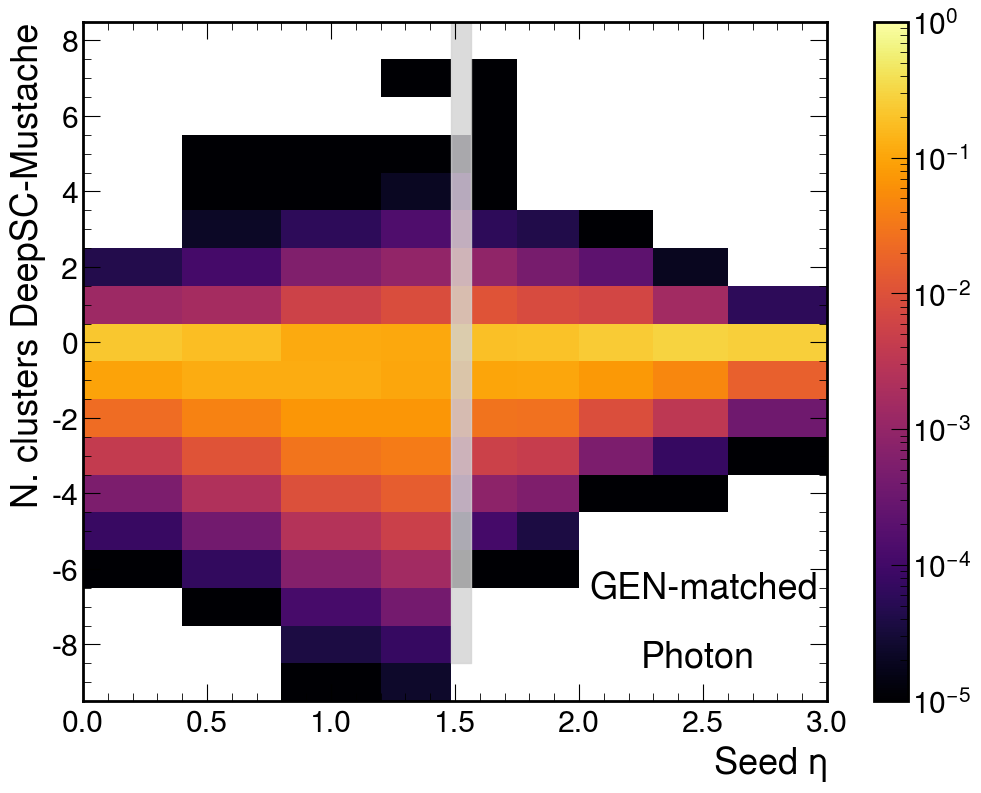

In [220]:
etas =  [0, 0.4,0.8, 1.2,1.485, 1.566, 1.75,2.,2.3,2.6,3]
xbins = [-9.5,-8.5, -7.5, -6.5,-5.5,-4.5,-3.5,-2.5,-1.5,-0.5,0.5, 1.5 ,2.5 ,3.5, 4.5 ,5.5,6.5,7.5,8.5]

for df, flavour in zip([df_ele, df_gamma],["Electron", "Photon"]):
    mask = (df.in_deepsc == 1) & (df.in_mustache==1) & (df.calomatched == 1)

    fig, ax = plt.subplots(1,1, figsize=(12,9),dpi=100)
    A  = ax.hist2d(abs(df[mask].seed_eta), df[mask].ncls_deepsc - df[mask].ncls_mustache, bins=(etas, xbins ), cmap="inferno",
                   density=True, norm=colors.LogNorm(vmax=1, vmin=1e-5) )
    
    ax.fill_between([1.485, 1.566], [-8.5,-8.5],[8.5,8.5], color="lightgray", alpha=0.8)

    fig.colorbar(A[3], ax=ax)   
    ax.set_ylabel("N. clusters DeepSC-Mustache")
    ax.set_xlabel("Seed $\eta$")
    ax.text(0.68, 0.15, "GEN-matched", transform=ax.transAxes)
    ax.text(0.75, 0.05, flavour, transform=ax.transAxes)


Text(0.68, 0.05, 'GEN-matched')

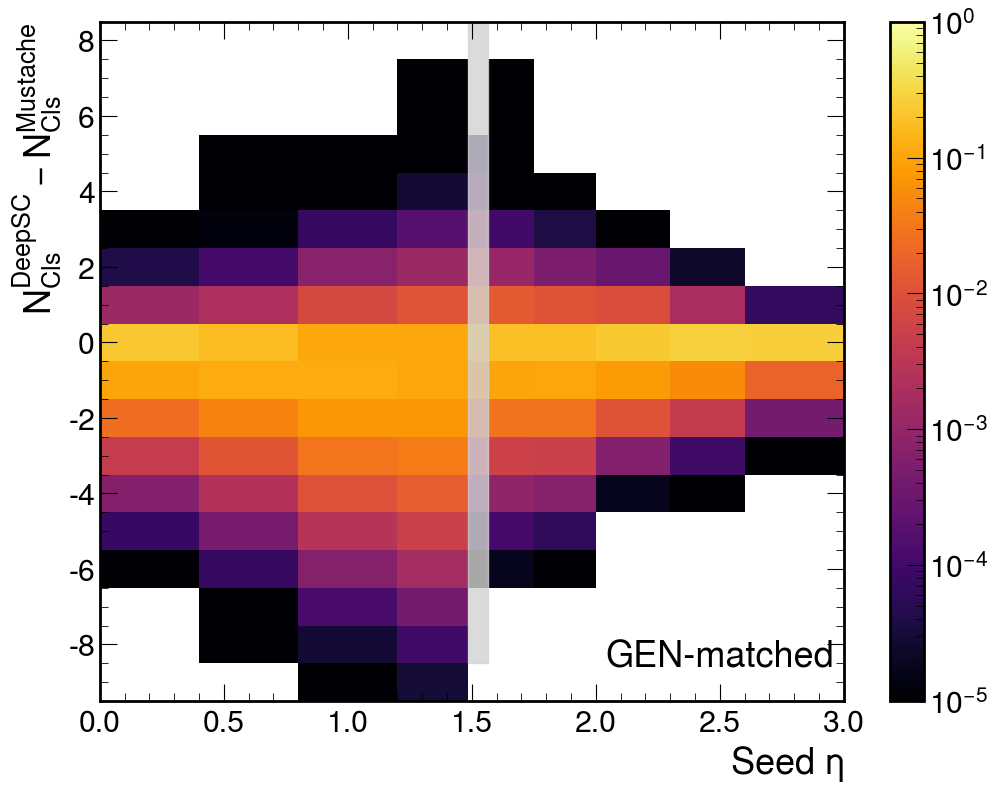

In [154]:
etas =  [0, 0.4,0.8, 1.2,1.485, 1.566, 1.75,2.,2.3,2.6,3]
xbins = [-9.5,-8.5, -7.5, -6.5,-5.5,-4.5,-3.5,-2.5,-1.5,-0.5,0.5, 1.5 ,2.5 ,3.5, 4.5 ,5.5,6.5,7.5,8.5]

df = df_all
mask = (df.in_deepsc == 1) & (df.in_mustache==1) & (df.calomatched == 1)

fig, ax = plt.subplots(1,1, figsize=(12,9),dpi=100)
A  = ax.hist2d(abs(df[mask].seed_eta), df[mask].ncls_deepsc - df[mask].ncls_mustache, bins=(etas, xbins ), cmap="inferno",
               density=True, norm=colors.LogNorm(vmax=1, vmin=1e-5) )

ax.fill_between([1.485, 1.566], [-8.5,-8.5],[8.5,8.5], color="lightgray", alpha=0.8)

fig.colorbar(A[3], ax=ax)   
ax.set_ylabel("$N_{Cls}^{DeepSC} -N_{Cls}^{Mustache}$")
ax.set_xlabel("Seed $\eta$")
ax.text(0.68, 0.05, "SIM-matched", transform=ax.transAxes)


Text(0.68, 0.05, 'Inclusive')

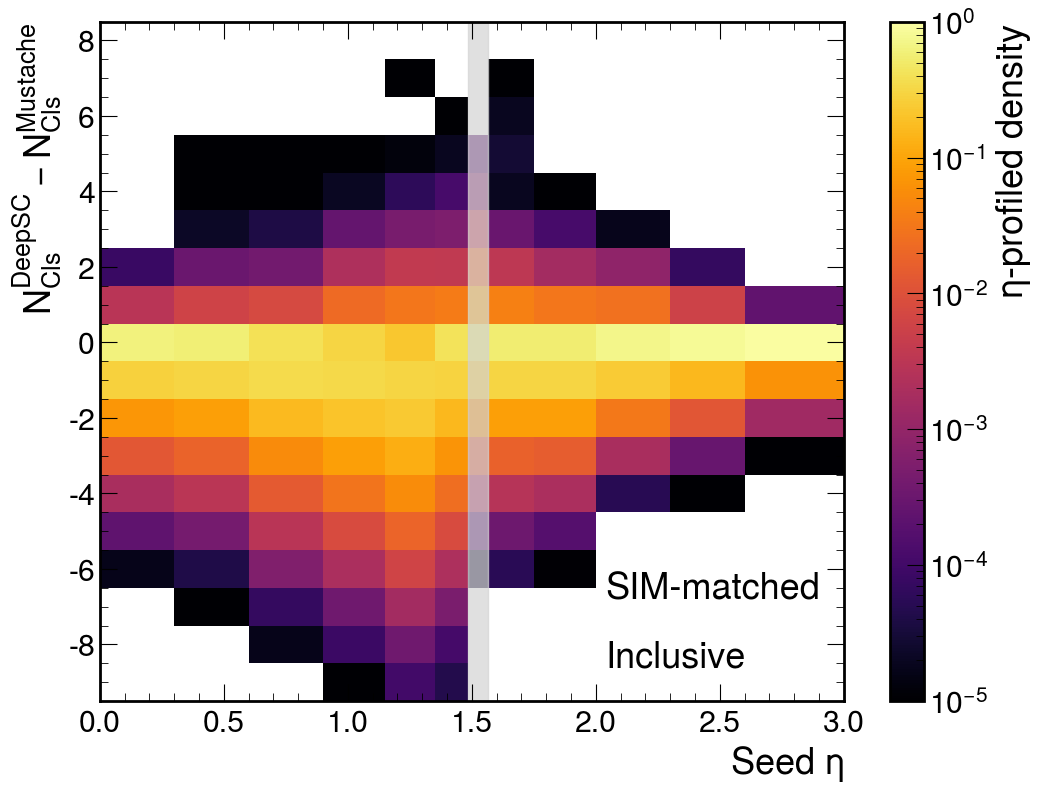

In [272]:
etas =  [0, 0.3,0.6, 0.9, 1.15, 1.35, 1.485, 1.566, 1.75,2.,2.3,2.6,3]
ybins = [-9.5,-8.5, -7.5, -6.5,-5.5,-4.5,-3.5,-2.5,-1.5,-0.5,0.5, 1.5 ,2.5 ,3.5, 4.5 ,5.5,6.5,7.5,8.5]

df = df_all
mask = (df.in_deepsc == 1) & (df.in_mustache==1) & (df.calomatched == 1)

fig, ax = plt.subplots(1,1, figsize=(12,9),dpi=100)
A,xedges,yedges  = np.histogram2d(abs(df[mask].seed_eta), df[mask].ncls_deepsc - df[mask].ncls_mustache, bins=(etas, ybins ))
s = np.expand_dims(np.sum(A, axis=-1), axis=1)
a = A/s
X, Y = np.meshgrid(xedges, yedges)
I = ax.pcolormesh(X, Y, a.T, norm=colors.LogNorm(vmax=1, vmin=1e-5), cmap="inferno")

ax.fill_between([1.485, 1.566], [ybins[0], ybins[0]],[ybins[-1],ybins[-1]], color="lightgray", alpha=0.7)

fig.colorbar(I, ax=ax, label="$\eta$-profiled density")   
ax.set_ylabel("$N_{Cls}^{DeepSC} -N_{Cls}^{Mustache}$")
ax.set_xlabel("Seed $\eta$")
ax.text(0.68, 0.15, "SIM-matched", transform=ax.transAxes)
ax.text(0.68, 0.05, "Inclusive", transform=ax.transAxes)


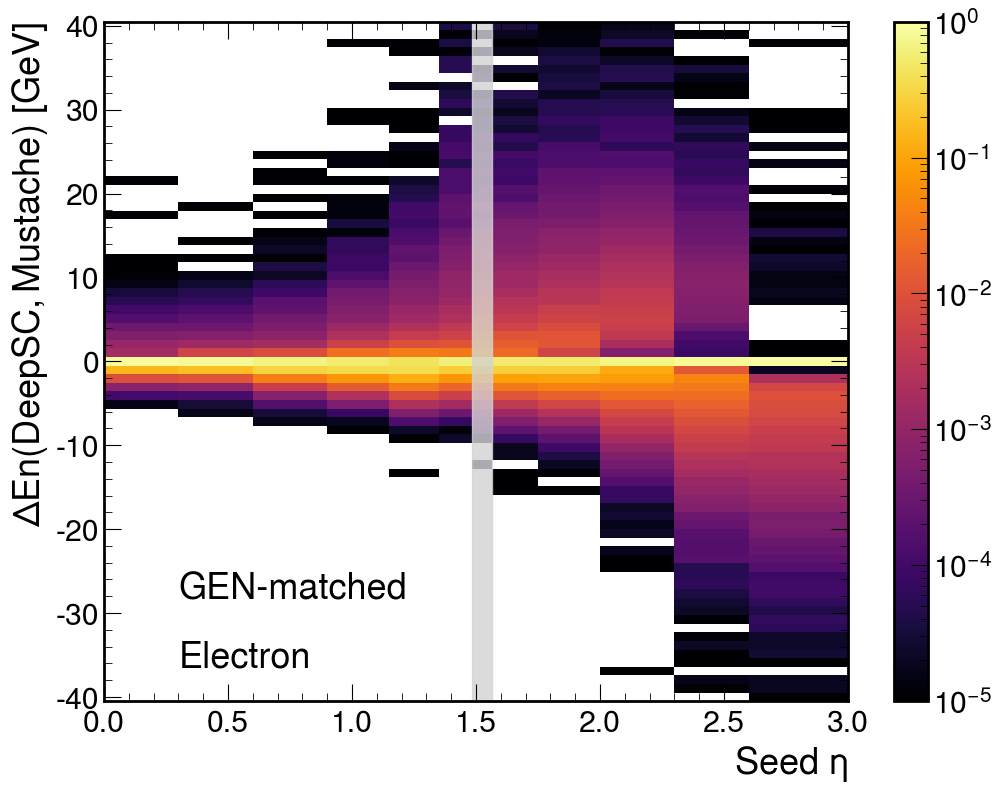

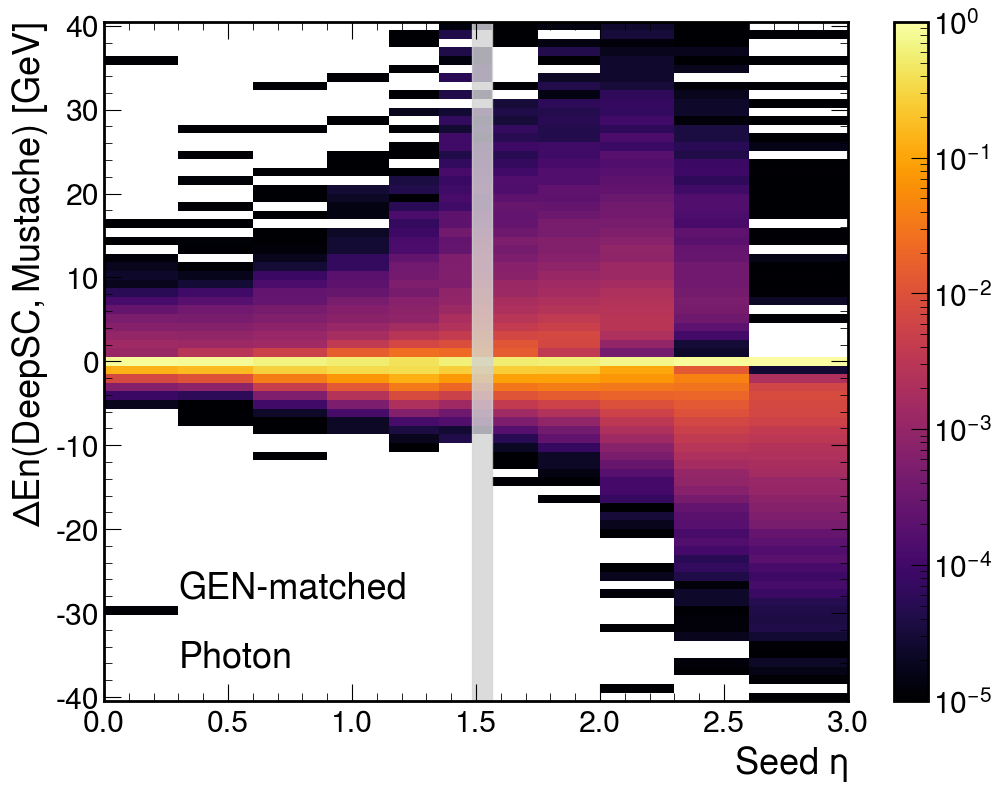

In [269]:
etas =  [0, 0.3,0.6, 0.9, 1.15, 1.35, 1.485, 1.566, 1.75,2.,2.3,2.6,3]
xbins = np.linspace(-40.5,40.5,80)

for df, flavour in zip([df_ele, df_gamma],["Electron", "Photon"]):
    mask = (df.in_deepsc == 1) & (df.in_mustache==1) & (df.calomatched == 1)

    fig, ax = plt.subplots(1,1, figsize=(12,9),dpi=100)
    
    A,xedges,yedges  = np.histogram2d(abs(df[mask].seed_eta), df[mask].en_deepsc_raw - df[mask].en_mustache_raw, bins=(etas, xbins ))
    s = np.expand_dims(np.sum(A, axis=-1), axis=1)
    a = A/s
    X, Y = np.meshgrid(xedges, yedges)
    I = ax.pcolormesh(X, Y, a.T, norm=colors.LogNorm(vmax=1, vmin=1e-5), cmap="inferno")
    
    
    ax.fill_between([1.485, 1.566], [-40.5,-40.5],[40.5,40.5], color="lightgray", alpha=0.8)

    fig.colorbar(I, ax=ax)   
    ax.set_ylabel("$\Delta En (DeepSC, Mustache)$ [GeV]")
    ax.set_xlabel("Seed $\eta$")
    ax.text(0.1, 0.15, "GEN-matched", transform=ax.transAxes)
    ax.text(0.1, 0.05, flavour, transform=ax.transAxes)


Text(0.1, 0.05, 'Inclusive')

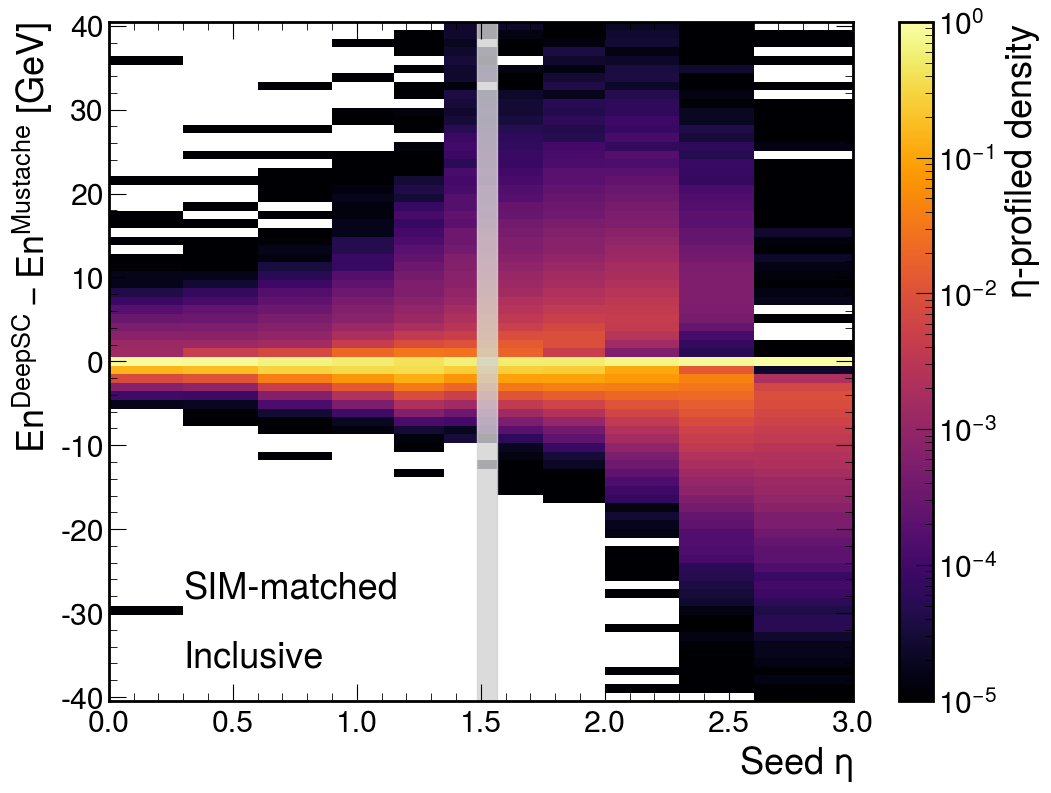

In [275]:
etas =  [0, 0.3,0.6, 0.9, 1.15, 1.35, 1.485, 1.566, 1.75,2.,2.3,2.6,3]
xbins = np.linspace(-40.5,40.5,80)

df = df_all
mask = (df.in_deepsc == 1) & (df.in_mustache==1) & (df.calomatched == 1)

fig, ax = plt.subplots(1,1, figsize=(12,9),dpi=100)

A,xedges,yedges  = np.histogram2d(abs(df[mask].seed_eta), df[mask].en_deepsc_raw - df[mask].en_mustache_raw, bins=(etas, xbins ))
s = np.expand_dims(np.sum(A, axis=-1), axis=1)
a = A/s
X, Y = np.meshgrid(xedges, yedges)
I = ax.pcolormesh(X, Y, a.T, norm=colors.LogNorm(vmax=1, vmin=1e-5), cmap="inferno")

ax.fill_between([1.485, 1.566], [-40.5,-40.5],[40.5,40.5], color="lightgray", alpha=0.8)

fig.colorbar(I, ax=ax, label="$\eta$-profiled density")   
ax.set_ylabel("$En^{DeepSC} - En^{Mustache}$ [GeV]")
ax.set_xlabel("Seed $\eta$")
ax.text(0.1, 0.15, "SIM-matched", transform=ax.transAxes)
ax.text(0.1, 0.05, "Inclusive", transform=ax.transAxes)


Text(0.5, 0.05, 'Inclusive')

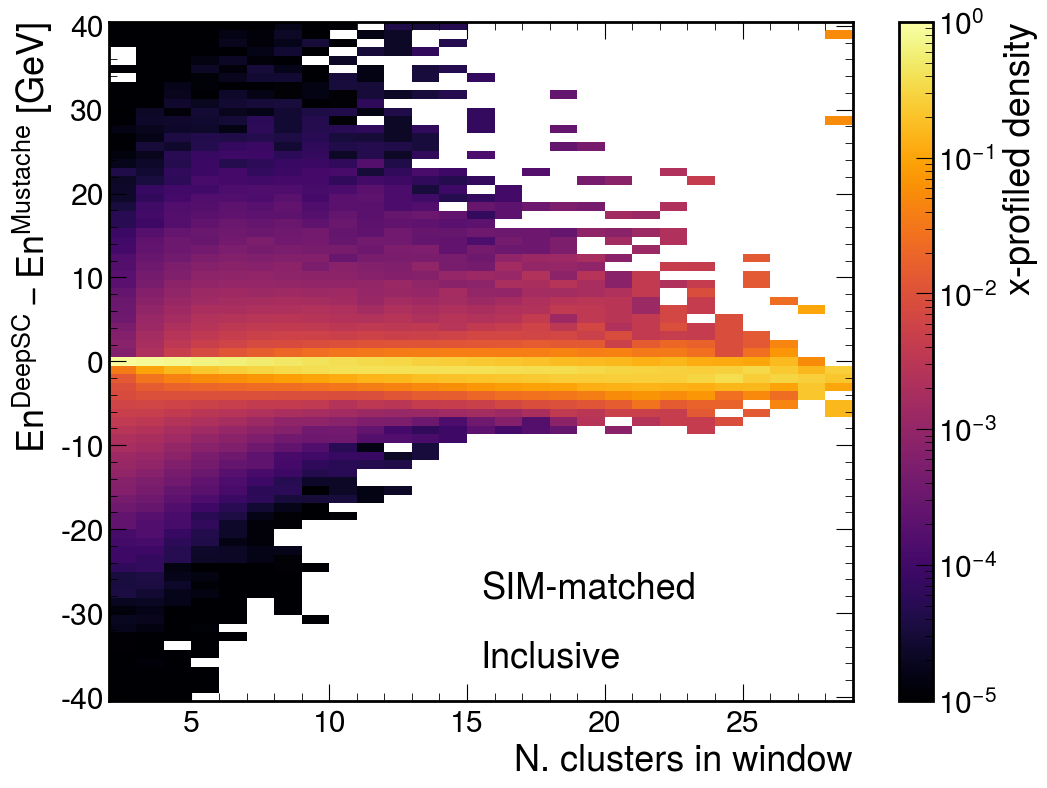

In [283]:
etas =  np.arange(2, 30)
xbins = np.linspace(-40.5,40.5,80)

df = df_all
mask = (df.in_deepsc == 1) & (df.in_mustache==1) & (df.calomatched == 1)

fig, ax = plt.subplots(1,1, figsize=(12,9),dpi=100)

A,xedges,yedges  = np.histogram2d(df[mask].ncls_tot, df[mask].en_deepsc_raw - df[mask].en_mustache_raw, bins=(etas, xbins ))
s = np.expand_dims(np.sum(A, axis=-1), axis=1)
a = A/s
X, Y = np.meshgrid(xedges, yedges)
I = ax.pcolormesh(X, Y, a.T, norm=colors.LogNorm(vmax=1, vmin=1e-5), cmap="inferno")

#ax.fill_between([1.485, 1.566], [-40.5,-40.5],[40.5,40.5], color="lightgray", alpha=0.8)

fig.colorbar(I, ax=ax, label="x-profiled density")   
ax.set_ylabel("$En^{DeepSC} - En^{Mustache}$ [GeV]")
ax.set_xlabel("N. clusters in window")
ax.text(0.5, 0.15, "SIM-matched", transform=ax.transAxes)
ax.text(0.5, 0.05, "Inclusive", transform=ax.transAxes)


Text(0.52, 0.85, 'Inclusive')

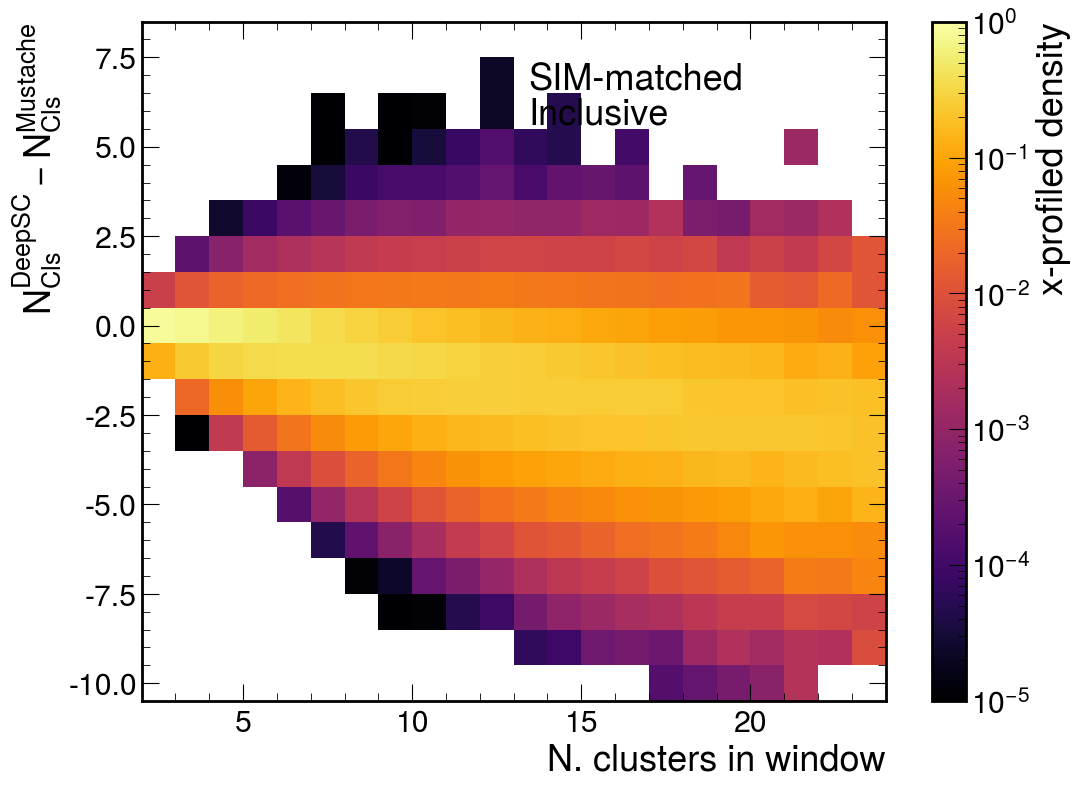

In [294]:
ybins =  [-10.5, -9.5,-8.5, -7.5, -6.5,-5.5,-4.5,-3.5,-2.5,-1.5,-0.5,0.5, 1.5 ,2.5 ,3.5, 4.5 ,5.5,6.5,7.5,8.5]
xbins = np.arange(2,25,)

df = df_all
mask = (df.in_deepsc == 1) & (df.in_mustache==1) & (df.calomatched == 1)

fig, ax = plt.subplots(1,1, figsize=(12,9),dpi=100)

A,xedges,yedges  = np.histogram2d(df[mask].ncls_tot, df[mask].ncls_deepsc - df[mask].ncls_mustache, bins=(xbins, ybins ))
s = np.expand_dims(np.sum(A, axis=-1), axis=1)
a = A/s
X, Y = np.meshgrid(xedges, yedges)
I = ax.pcolormesh(X, Y, a.T, norm=colors.LogNorm(vmax=1, vmin=1e-5), cmap="inferno")

#ax.fill_between([1.485, 1.566], [-40.5,-40.5],[40.5,40.5], color="lightgray", alpha=0.8)

fig.colorbar(I, ax=ax, label="x-profiled density")   
ax.set_ylabel("$N_{Cls}^{DeepSC} -N_{Cls}^{Mustache}$")
ax.set_xlabel("N. clusters in window")
ax.text(0.52, 0.9, "SIM-matched", transform=ax.transAxes)
ax.text(0.52, 0.85, "Inclusive", transform=ax.transAxes)


# Resolution comparison

In [38]:
df_ele_A = pd.HDFStore("/eos/user/r/rdfexp/ecal/cluster/output_deepcluster_dumper/reco_comparison/electrons/ele_UL18_123X_algoA_v2_seed.h5py", "r")["df"]
df_ele_B = pd.HDFStore("/eos/user/r/rdfexp/ecal/cluster/output_deepcluster_dumper/reco_comparison/electrons/ele_UL18_123X_algoB_v2_seed.h5py", "r")["df"]
df_ele_C = pd.HDFStore("/eos/user/r/rdfexp/ecal/cluster/output_deepcluster_dumper/reco_comparison/electrons/ele_UL18_123X_algoC_v2_seed.h5py", "r")["df"]

In [39]:
def bin_analysis(col):
    def f(df):
        m = df[col].mean()
        A = (df[col].quantile(0.84) - df[col].quantile(0.16))/2
        B = (df[col].quantile(0.975) - df[col].quantile(0.025))/2
        return pd.Series({
            "m": m,
            "w68": A,
            "w95": B,
            "N": df[col].count()
        })
    return f

def bin_analysis_central(col):
    def f(df):
        m = df[col].mean()
        qM = np.sum(df[col]< m) / df[col].count()
        print(qM)
        if (qM> 0.66):
            A = (df[col].quantile(1) - df[col].quantile(qM-0.34))/2
        elif (qM < 0.34):
            A = (df[col].quantile(qM +0.34) - df[col].quantile(0))/2
        else:
            A = (df[col].quantile(qM +0.34) - df[col].quantile(qM-0.34))/2
        return pd.Series({
            "m": m,
            "qM": qM,
            "w68": A,
            "N": df[col].count()
        })
    return f

In [40]:
df_ele_A.columns

Index(['output_seeds.csv', 'calo_en_true_sim', 'calo_et_true_gen',
       'calo_et_true_sim', 'calo_geneta', 'calo_genphi', 'calo_simeta',
       'calo_simphi', 'calomatched', 'cls_deepsc', 'cls_must',
       'en_deepsc_calib', 'en_deepsc_raw', 'en_mustache_calib',
       'en_mustache_raw', 'en_seed', 'en_seed_calib', 'et_deepsc_calib',
       'et_deepsc_raw', 'et_mustache_calib', 'et_mustache_raw', 'et_seed',
       'et_seed_calib', 'event_tot_simen_PU', 'in_deepsc', 'in_mustache',
       'nVtx', 'ncls_deepsc', 'ncls_mustache', 'ncls_tot', 'ncls_true',
       'obsPU', 'rho', 'seed_eta', 'seed_iz', 'seed_phi', 'truePU'],
      dtype='object')

/tmp/ipykernel_789/3613747281.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["et_bin"] = pd.cut(df.calo_et_true_gen, ets, labels=list(range(len(ets)-1)))
/tmp/ipykernel_789/3613747281.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["eta_bin"] = pd.cut(abs(df.calo_simeta), etas, labels=list(range(len(etas)-1)))
/tmp/ipykernel_789/3613747281.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

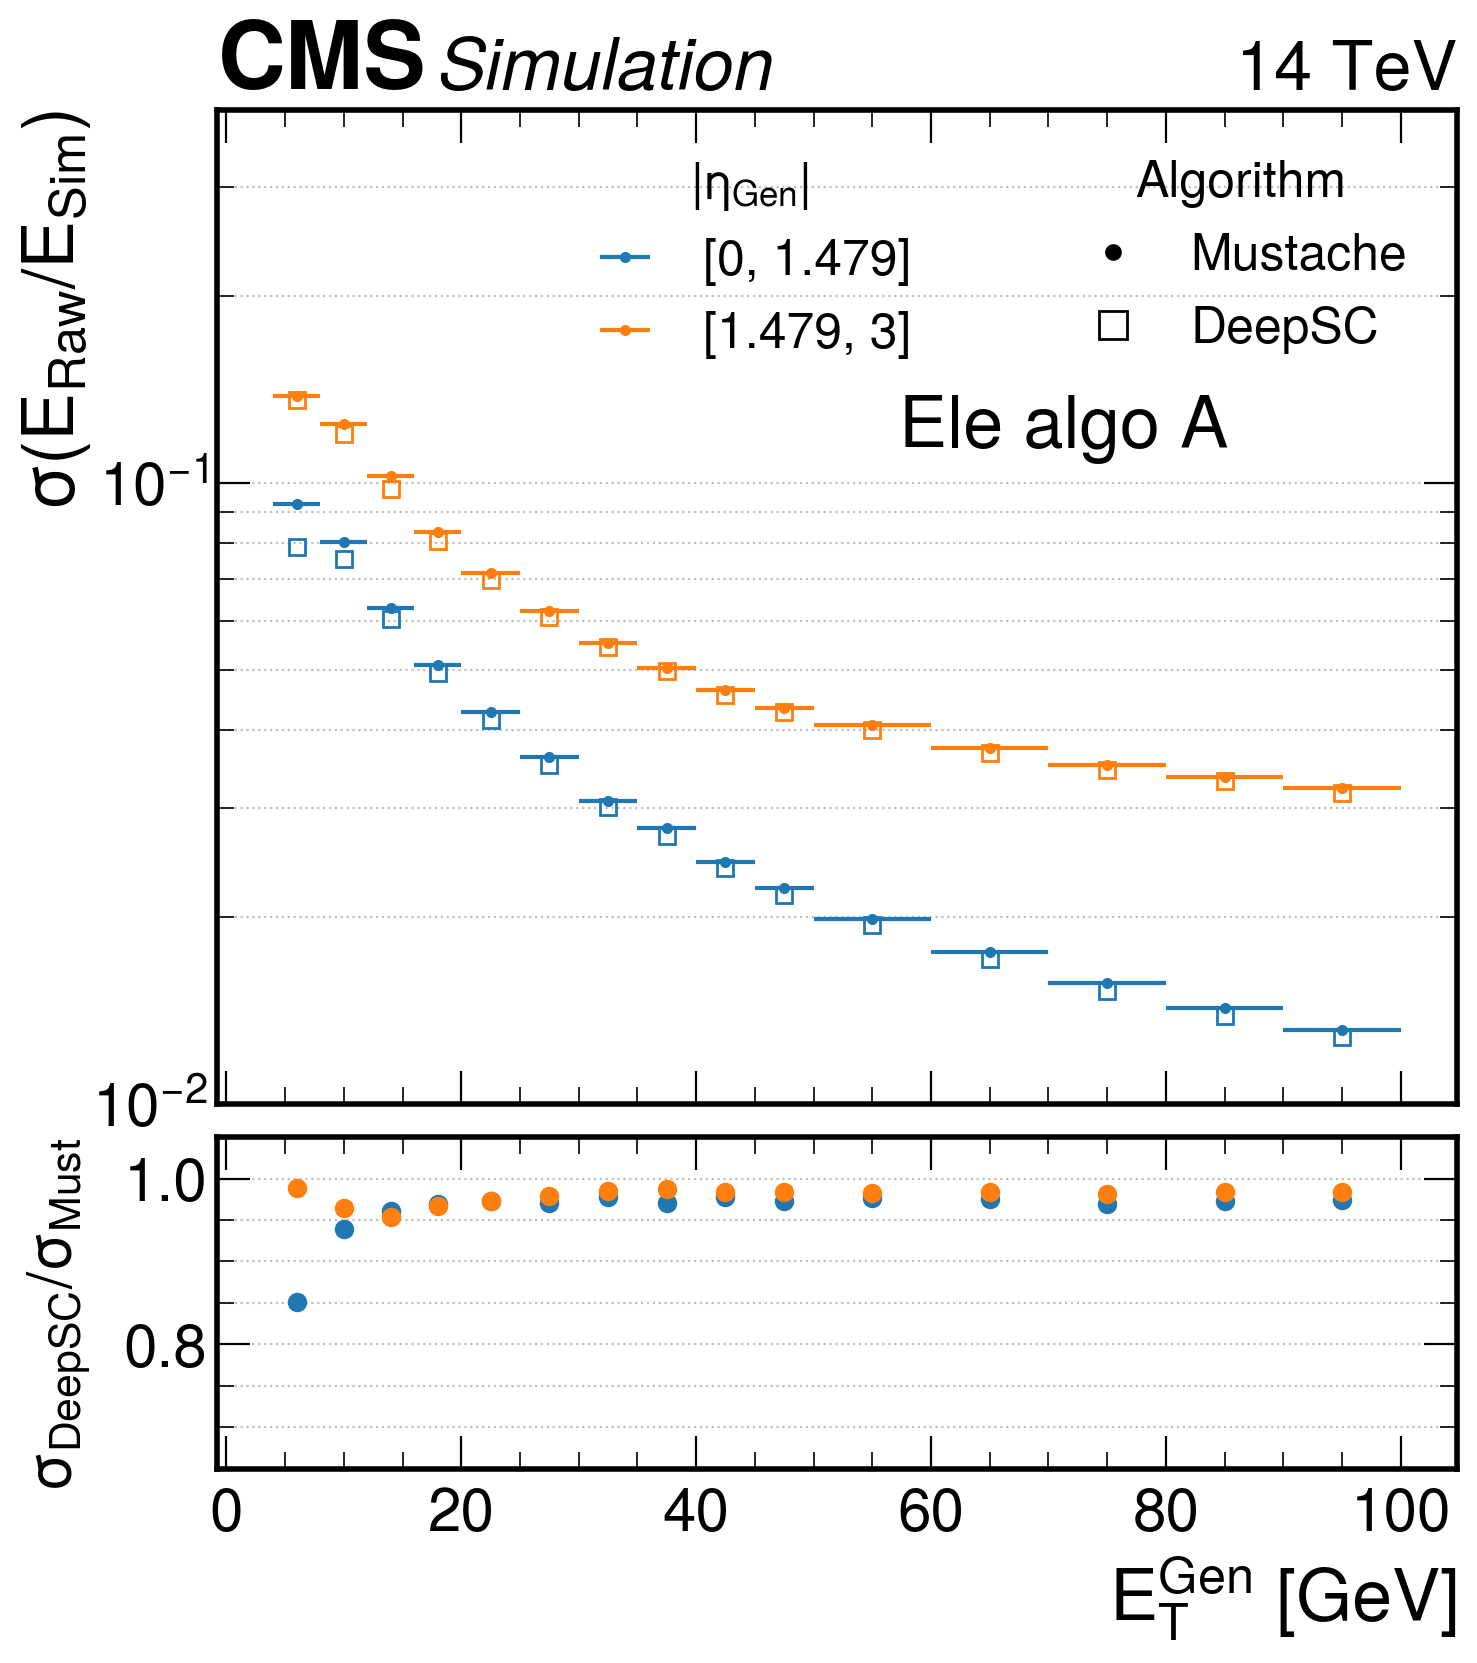

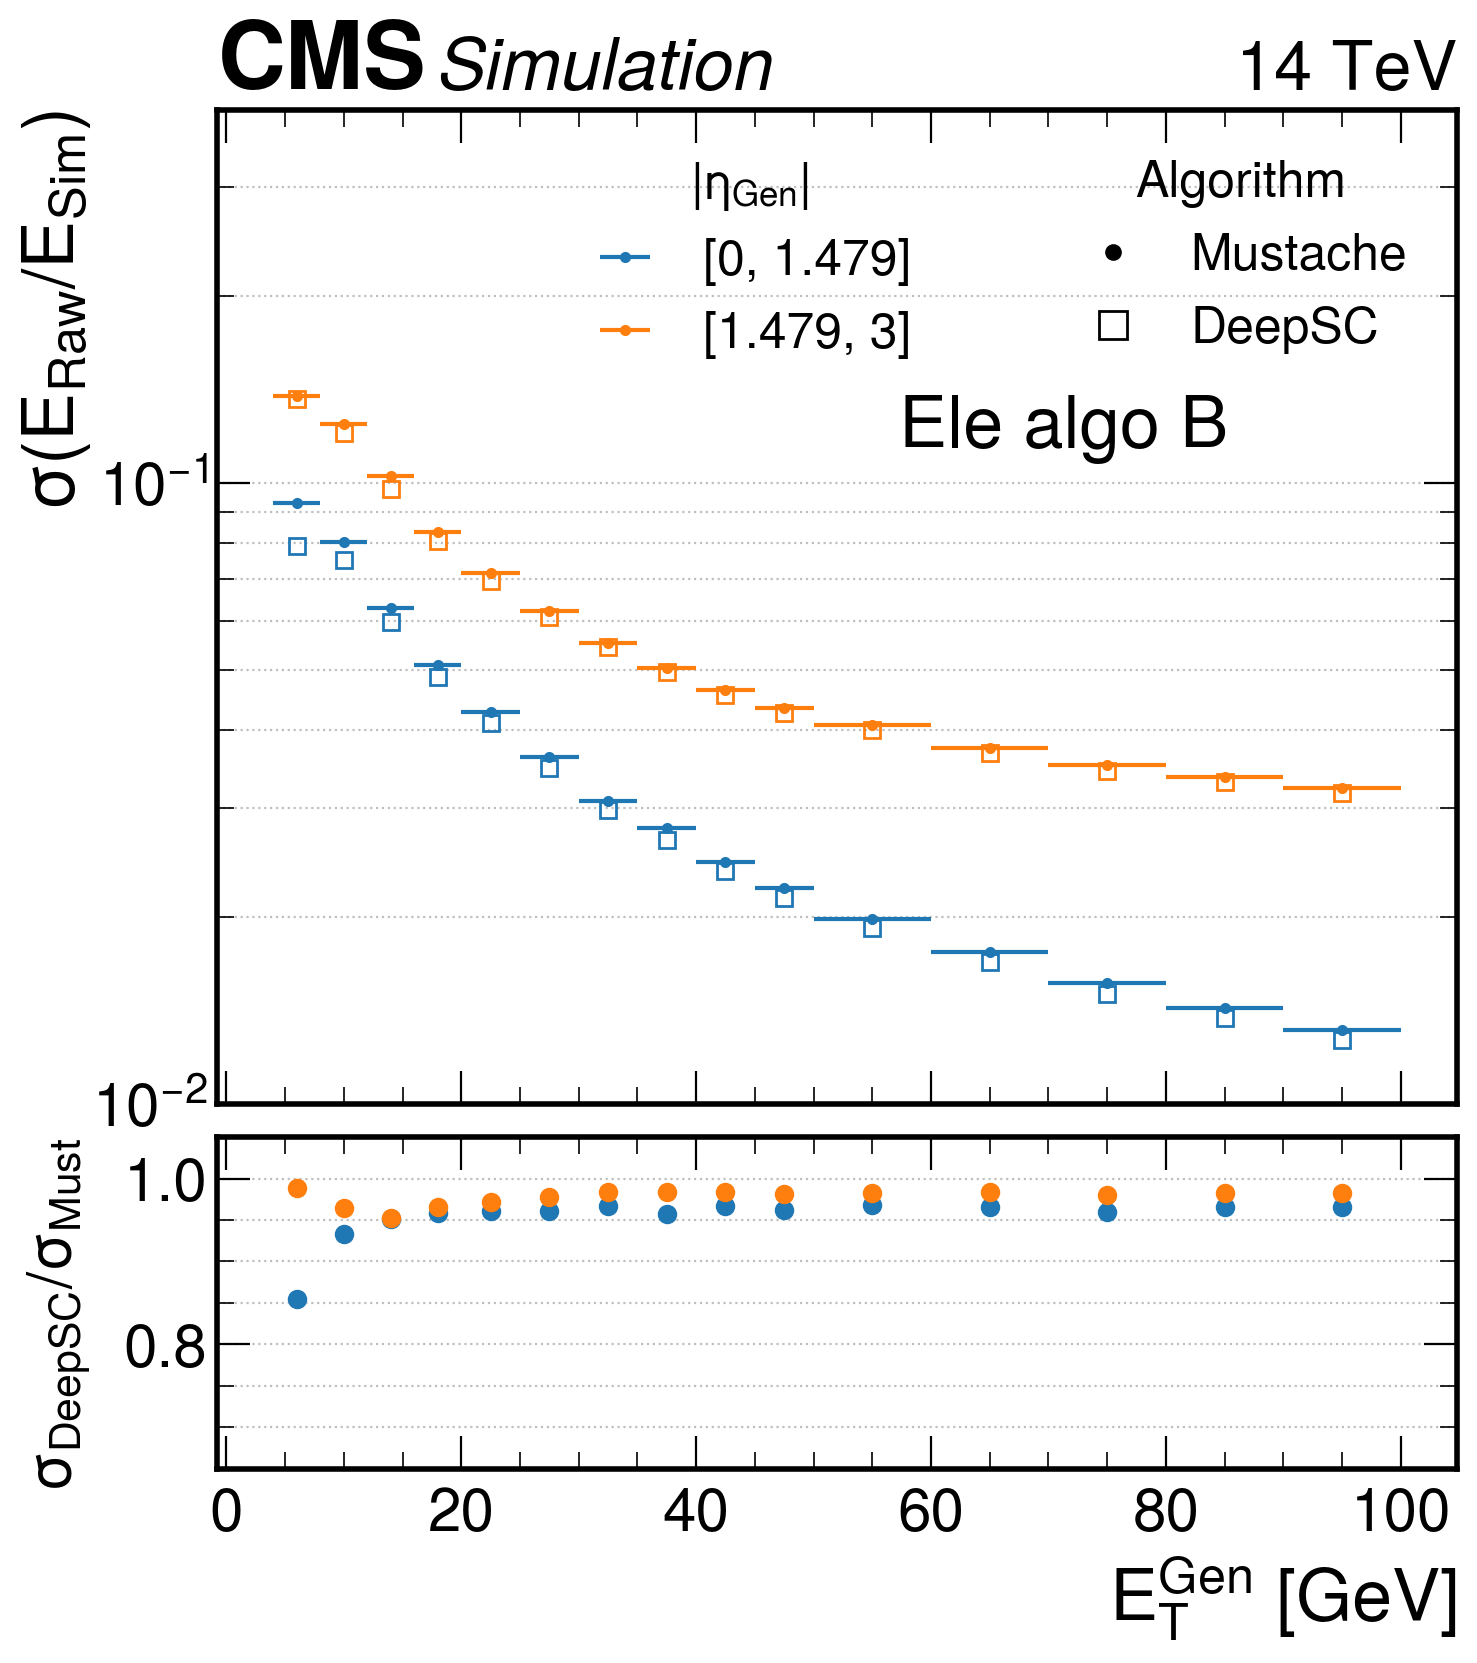

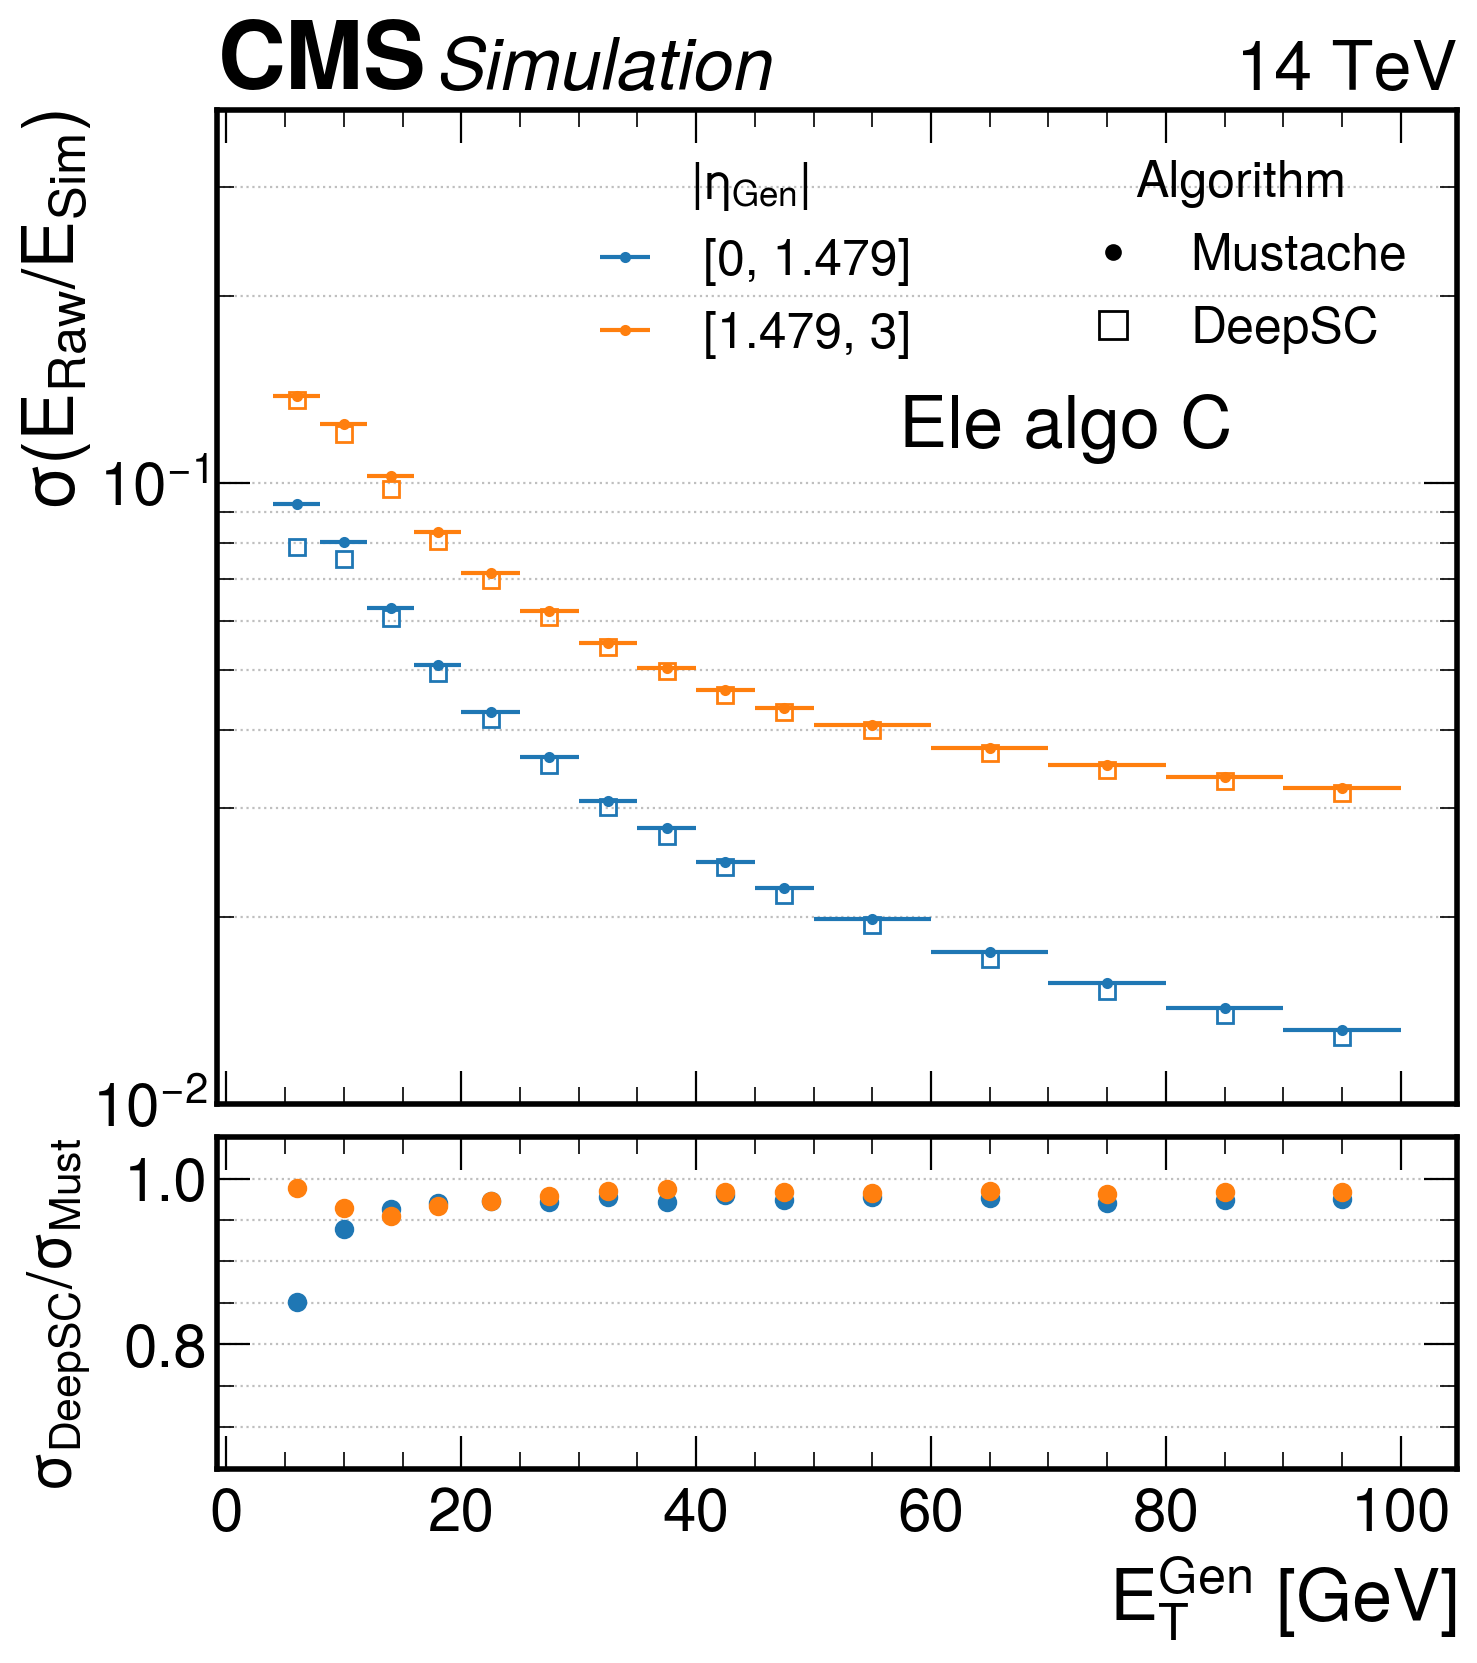

In [41]:
dfs = [df_ele_A, df_ele_B, df_ele_C]
flavours = ["Ele algo A", "Ele algo B", "Ele algo C"]

for df,flavour in zip(dfs, flavours):
    mask = (df.calomatched == 1) & (df.in_deepsc==1) & (df.in_mustache==1)
    df["En_ovEtrue_deepsc"] = df.en_deepsc_raw / df.calo_en_true_sim
    df["En_ovEtrue_mustache"] = df.en_mustache_raw / df.calo_en_true_sim
    df = df[mask]
#     ets = [1.5, 3,4,5, 6,8, 10,15,20,40,60, 80,100]
    ets = [4, 8, 12,16, 20,25 ,30,35,40, 45, 50, 60, 70, 80, 90 ,100]
    etas = [0, 1.479, 3]
    df["et_bin"] = pd.cut(df.calo_et_true_gen, ets, labels=list(range(len(ets)-1)))
    df["eta_bin"] = pd.cut(abs(df.calo_simeta), etas, labels=list(range(len(etas)-1)))


    res = df.groupby(["et_bin","eta_bin"]).apply(bin_analysis("En_ovEtrue_deepsc"))
    res_must = df.groupby(["et_bin","eta_bin"]).apply(bin_analysis("En_ovEtrue_mustache"))
#     avgenraw = df.groupby(["et_bin","eta_bin"]).agg({"en_true_sim_good": "mean"})
    res.reset_index(level=0, inplace=True)
    res.reset_index(level=0, inplace=True)
    res_must.reset_index(level=0, inplace=True)
    res_must.reset_index(level=0, inplace=True)
    
#     avgenraw.reset_index(level=0, inplace=True)
#     avgenraw.reset_index(level=0, inplace=True)

    fig = plt.figure(figsize=(8,9), dpi=200)
    gs = fig.add_gridspec(2, hspace=0.05, height_ratios=[0.75,0.25])
    axs = gs.subplots(sharex=True)

    errx = []
    x = []
    for i in range(len(ets)-1):
        errx.append((ets[i+1]- ets[i])/2)
        x.append((ets[i+1]+ ets[i])/2)

    mustl = []
    deepl = []


        
    for ieta, eta in enumerate(etas[:-1]):
        l = axs[0].errorbar(x, res_must[res_must.eta_bin == ieta].w68, xerr=errx, label="[{}, {}]".format(etas[ieta], etas[ieta+1]), fmt = ".")
        mustl.append(l)
        
    for ieta, eta in enumerate(etas[:-1]):
        l = axs[0].errorbar(x, res[res.eta_bin == ieta].w68, xerr=errx,label="[{}, {}]".format(etas[ieta], etas[ieta+1]), 
                                marker="s", markerfacecolor='none', c=mustl[ieta].lines[0].get_color(), linestyle='none', elinewidth=0)
        deepl.append(l)
    

    for ieta, eta in enumerate(etas[:-1]):
#         v =res_must[res_must.eta_bin == ieta].w68**2 - res[res.eta_bin == ieta].w68**2
#         var = np.sqrt(np.abs(v))*np.sign(v) / res_must[res_must.eta_bin == ieta].w68
        var = res[res.eta_bin == ieta].w68 / res_must[res_must.eta_bin == ieta].w68
        axs[1].errorbar(x, var, xerr=errx, label="[{}, {}]".format(etas[ieta], etas[ieta+1]), fmt="o", linestyle='none', elinewidth=0 )

    axs[0].set_ylabel("$\sigma (E_{Raw}/E_{Sim})$")

    axs[1].set_xlabel("$E_T^{Gen}$ [GeV]")
    # ax.plot([0,100],[1,1], linestyle="dashed", color="black")
    axs[0].set_ylim(1e-2, 0.4)
    axs[1].set_ylim(0.65, 1.05)
    axs[1].set_ylabel("$\sigma_{DeepSC}/\sigma_{Must}$", fontsize=22)
    axs[0].get_yaxis().set_label_coords(-0.1,1)
    axs[1].get_yaxis().set_label_coords(-0.1,1)
#     axs[1].legend(ncol=2, loc="upper right", fontsize=15)

    axs[0].text(0.55, 0.66, flavour, transform=axs[0].transAxes)
    axs[0].set_yscale("log")

    l1= axs[0].legend(handles=mustl, title="$|\eta_{Gen}|$", title_fontsize=18, loc="upper right", bbox_to_anchor=(0.6, 1), fontsize=18)
    
    ml = mlines.Line2D([], [], color='black', marker='.', linestyle='None', markersize=10, label='Mustache')
    dl = mlines.Line2D([], [], color='black', marker='s', markerfacecolor='none', linestyle='None', markersize=10, label='DeepSC')
    axs[0].legend(handles=[ml,dl], title="Algorithm", title_fontsize=18, loc="upper right", fontsize=18)
    axs[0].add_artist(l1)
    axs[1].grid(axis="y",which="both")
    axs[0].grid(axis="y", which="both")

    hep.cms.label(rlabel="14 TeV", loc=0, ax=axs[0])
    
#     fig.savefig(output_folder + "/resolution_byEnergy_{}_ratio.png".format(flavour))
#     fig.savefig(output_folder + "/resolution_byEnergy_{}_ratio.pdf".format(flavour))
#     fig.savefig(output_folder + "/resolution_byEnergy_{}_ratio.svg".format(flavour))

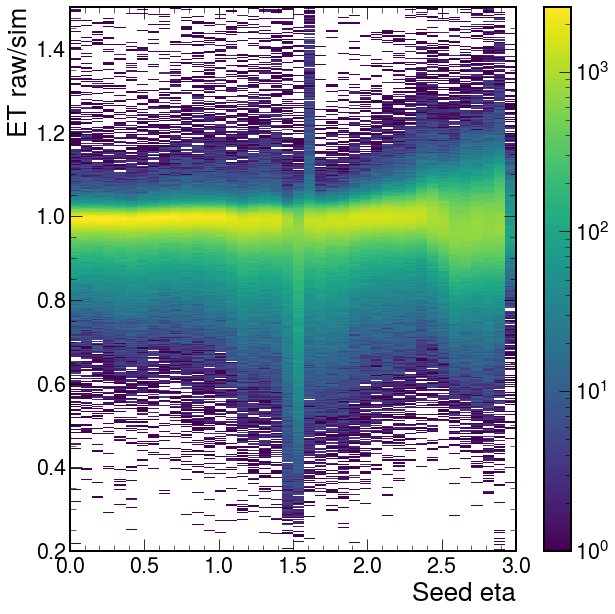

In [43]:
plt.hist2d(df_ele_A.seed_eta.abs()
           , df_ele_A.En_ovEtrue_mustache, bins=(40,500), range=((0,3),(0.2,1.5)), norm=colors.LogNorm())
plt.ylabel("ET raw/sim")
plt.xlabel("Seed eta")
plt.colorbar()

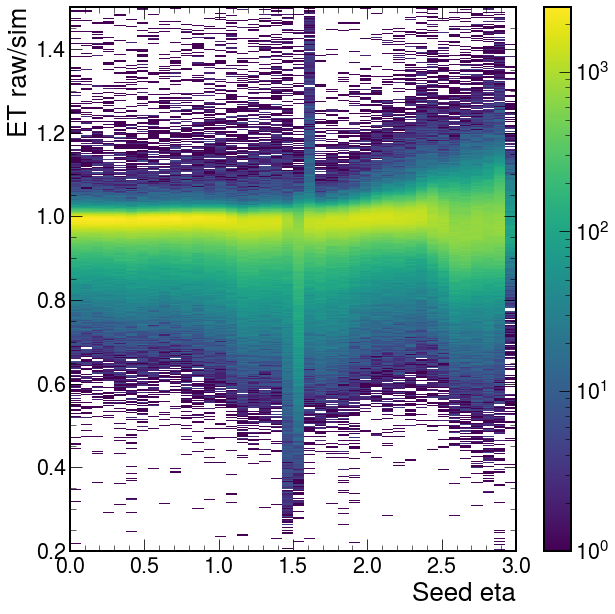

In [44]:
plt.hist2d(df_ele_A.seed_eta.abs()
           , df_ele_A.En_ovEtrue_deepsc, bins=(40,500), range=((0,3),(0.2,1.5)), norm=colors.LogNorm())
plt.ylabel("ET raw/sim")
plt.xlabel("Seed eta")
plt.colorbar()

/tmp/ipykernel_516/82731934.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["et_bin"] = pd.cut(df.calo_et_true_gen, ets, labels=list(range(len(ets)-1)))
/tmp/ipykernel_516/82731934.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["eta_bin"] = pd.cut(abs(df.calo_simeta), etas, labels=list(range(len(etas)-1)))
/tmp/ipykernel_516/82731934.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

<Figure size 1600x1800 with 0 Axes>

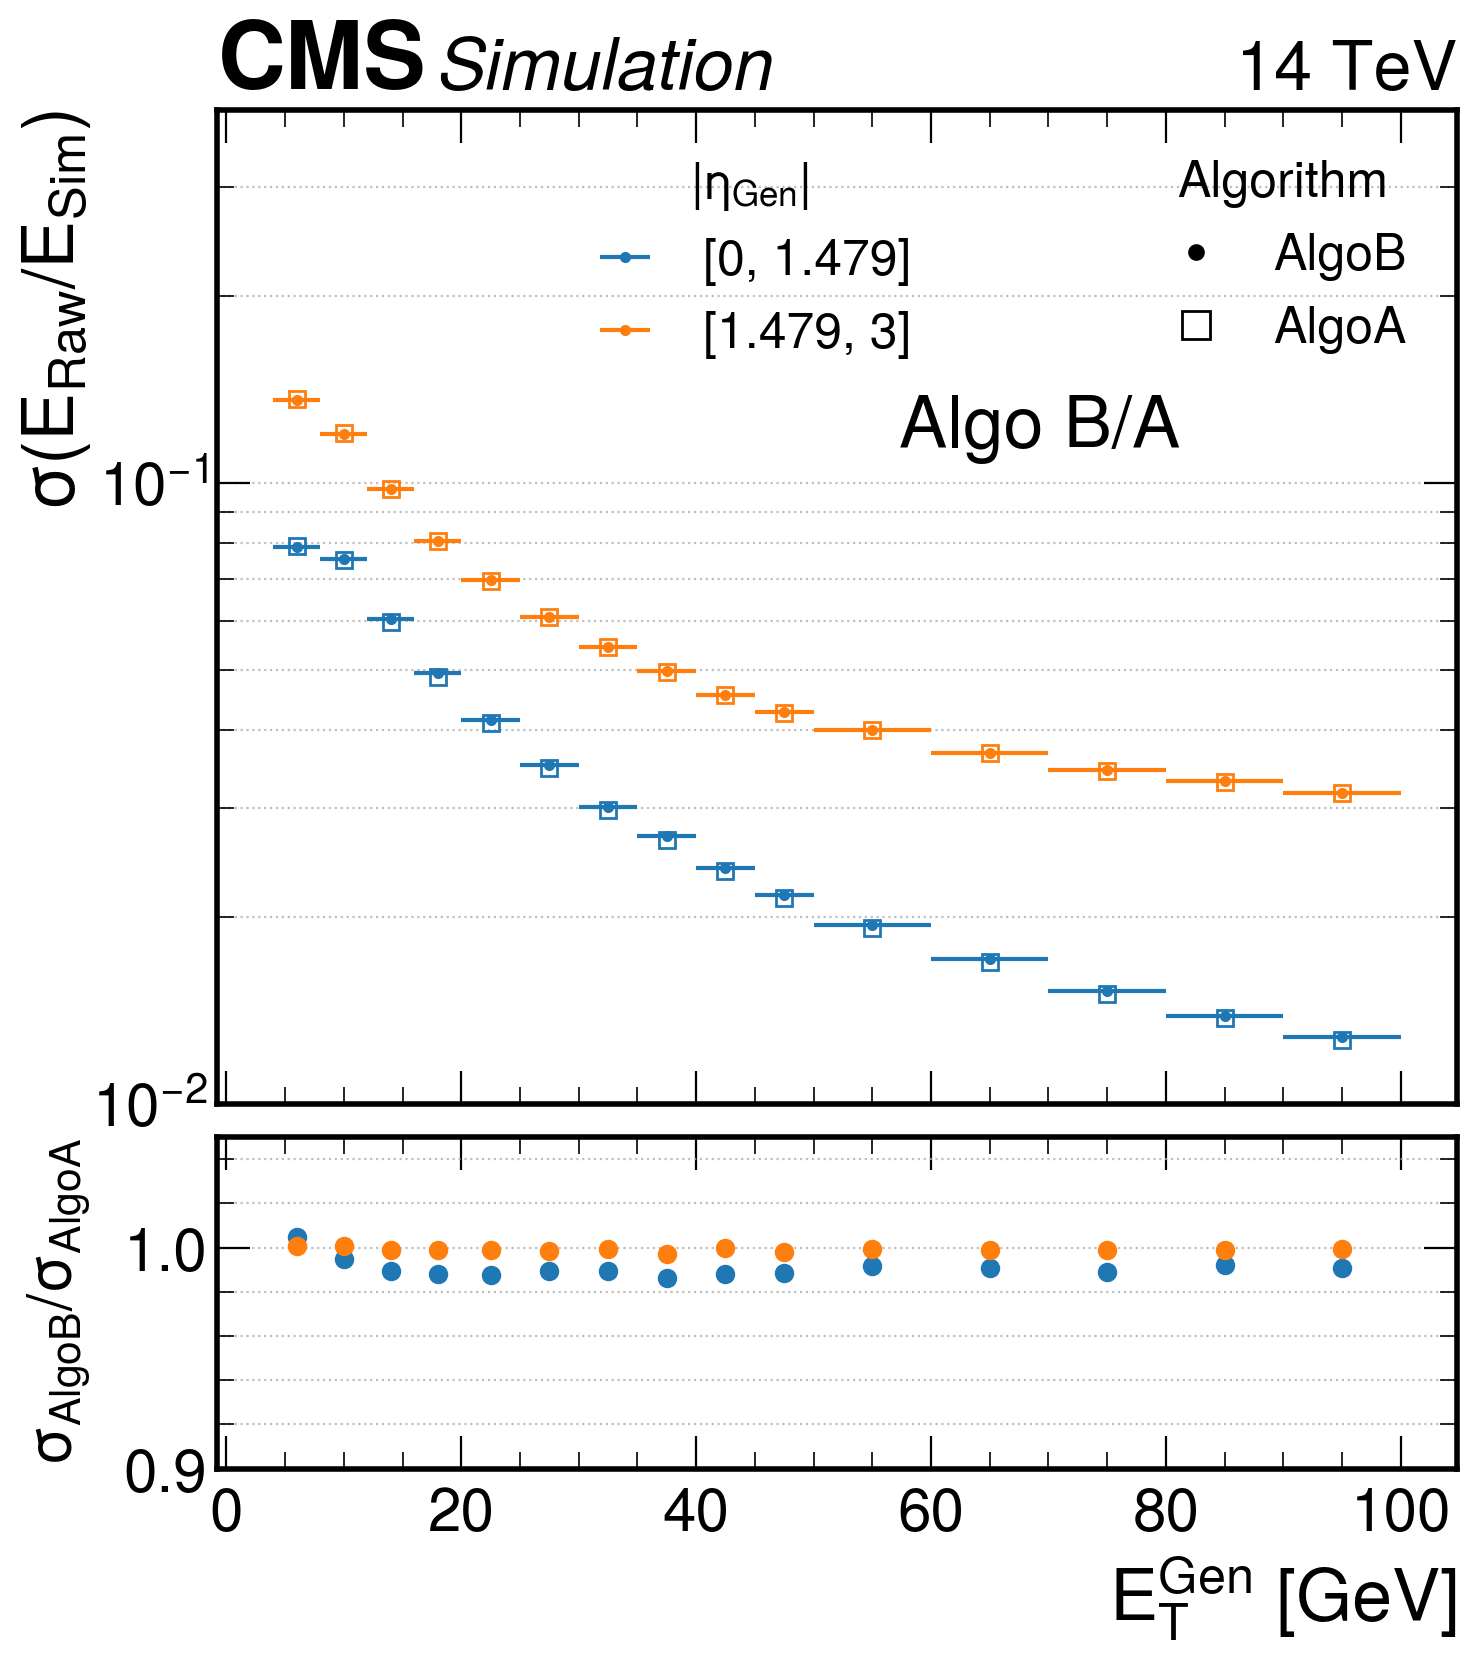

In [22]:
df1 = df_ele_A
df2 = df_ele_B
flavour = "Algo B/A"
out = []
for df in [df1, df2]:
    mask = (df.calomatched == 1) & (df.in_deepsc==1) & (df.in_mustache==1)
    df["En_ovEtrue_deepsc"] = df.en_deepsc_raw / df.calo_en_true_sim
    df = df[mask]
    #     ets = [1.5, 3,4,5, 6,8, 10,15,20,40,60, 80,100]
    ets = [4, 8, 12,16, 20,25 ,30,35,40, 45, 50, 60, 70, 80, 90 ,100]
    etas = [0, 1.479, 3]
    df["et_bin"] = pd.cut(df.calo_et_true_gen, ets, labels=list(range(len(ets)-1)))
    df["eta_bin"] = pd.cut(abs(df.calo_simeta), etas, labels=list(range(len(etas)-1)))

    res = df.groupby(["et_bin","eta_bin"]).apply(bin_analysis("En_ovEtrue_deepsc"))
    res.reset_index(level=0, inplace=True)
    res.reset_index(level=0, inplace=True)
    out.append(res)

    
    fig = plt.figure(figsize=(8,9), dpi=200)
gs = fig.add_gridspec(2, hspace=0.05, height_ratios=[0.75,0.25])
axs = gs.subplots(sharex=True)

errx = []
x = []
for i in range(len(ets)-1):
    errx.append((ets[i+1]- ets[i])/2)
    x.append((ets[i+1]+ ets[i])/2)

mustl = []
deepl = []

for ieta, eta in enumerate(etas[:-1]):
    l = axs[0].errorbar(x, out[0][out[0].eta_bin == ieta].w68, xerr=errx, label="[{}, {}]".format(etas[ieta], etas[ieta+1]), fmt = ".")
    mustl.append(l)

for ieta, eta in enumerate(etas[:-1]):
    l = axs[0].errorbar(x, out[1][out[1].eta_bin == ieta].w68, xerr=errx,label="[{}, {}]".format(etas[ieta], etas[ieta+1]), 
                            marker="s", markerfacecolor='none', c=mustl[ieta].lines[0].get_color(), linestyle='none', elinewidth=0)
    deepl.append(l)


for ieta, eta in enumerate(etas[:-1]):
#         v =res_must[res_must.eta_bin == ieta].w68**2 - res[res.eta_bin == ieta].w68**2
#         var = np.sqrt(np.abs(v))*np.sign(v) / res_must[res_must.eta_bin == ieta].w68
    var = out[1][out[1].eta_bin == ieta].w68 / out[0][out[0].eta_bin == ieta].w68
    axs[1].errorbar(x, var, xerr=errx, label="[{}, {}]".format(etas[ieta], etas[ieta+1]), fmt="o", linestyle='none', elinewidth=0 )

axs[0].set_ylabel("$\sigma (E_{Raw}/E_{Sim})$")

axs[1].set_xlabel("$E_T^{Gen}$ [GeV]")
# ax.plot([0,100],[1,1], linestyle="dashed", color="black")
axs[0].set_ylim(1e-2, 0.4)
axs[1].set_ylim(0.9, 1.05)
axs[1].set_ylabel("$\sigma_{AlgoB}/\sigma_{AlgoA}$", fontsize=22)
axs[0].get_yaxis().set_label_coords(-0.1,1)
axs[1].get_yaxis().set_label_coords(-0.1,1)
#     axs[1].legend(ncol=2, loc="upper right", fontsize=15)

axs[0].text(0.55, 0.66, flavour, transform=axs[0].transAxes)
axs[0].set_yscale("log")

l1= axs[0].legend(handles=mustl, title="$|\eta_{Gen}|$", title_fontsize=18, loc="upper right", bbox_to_anchor=(0.6, 1), fontsize=18)

ml = mlines.Line2D([], [], color='black', marker='.', linestyle='None', markersize=10, label='AlgoB')
dl = mlines.Line2D([], [], color='black', marker='s', markerfacecolor='none', linestyle='None', markersize=10, label='AlgoA')
axs[0].legend(handles=[ml,dl], title="Algorithm", title_fontsize=18, loc="upper right", fontsize=18)
axs[0].add_artist(l1)
axs[1].grid(axis="y",which="both")
axs[0].grid(axis="y", which="both")

hep.cms.label(rlabel="14 TeV", loc=0, ax=axs[0])

fig.savefig(output_folder + "/resolution_byEnergy_{}_ratio.png".format("Algo_AvsB"))
fig.savefig(output_folder + "/resolution_byEnergy_{}_ratio.pdf".format("Algo_AvsB"))
fig.savefig(output_folder + "/resolution_byEnergy_{}_ratio.svg".format("Algo_AvsB"))

/tmp/ipykernel_516/3422485214.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["et_bin"] = pd.cut(df.calo_et_true_gen, ets, labels=list(range(len(ets)-1)))
/tmp/ipykernel_516/3422485214.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["eta_bin"] = pd.cut(abs(df.calo_simeta), etas, labels=list(range(len(etas)-1)))
/tmp/ipykernel_516/3422485214.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

<Figure size 1600x1800 with 0 Axes>

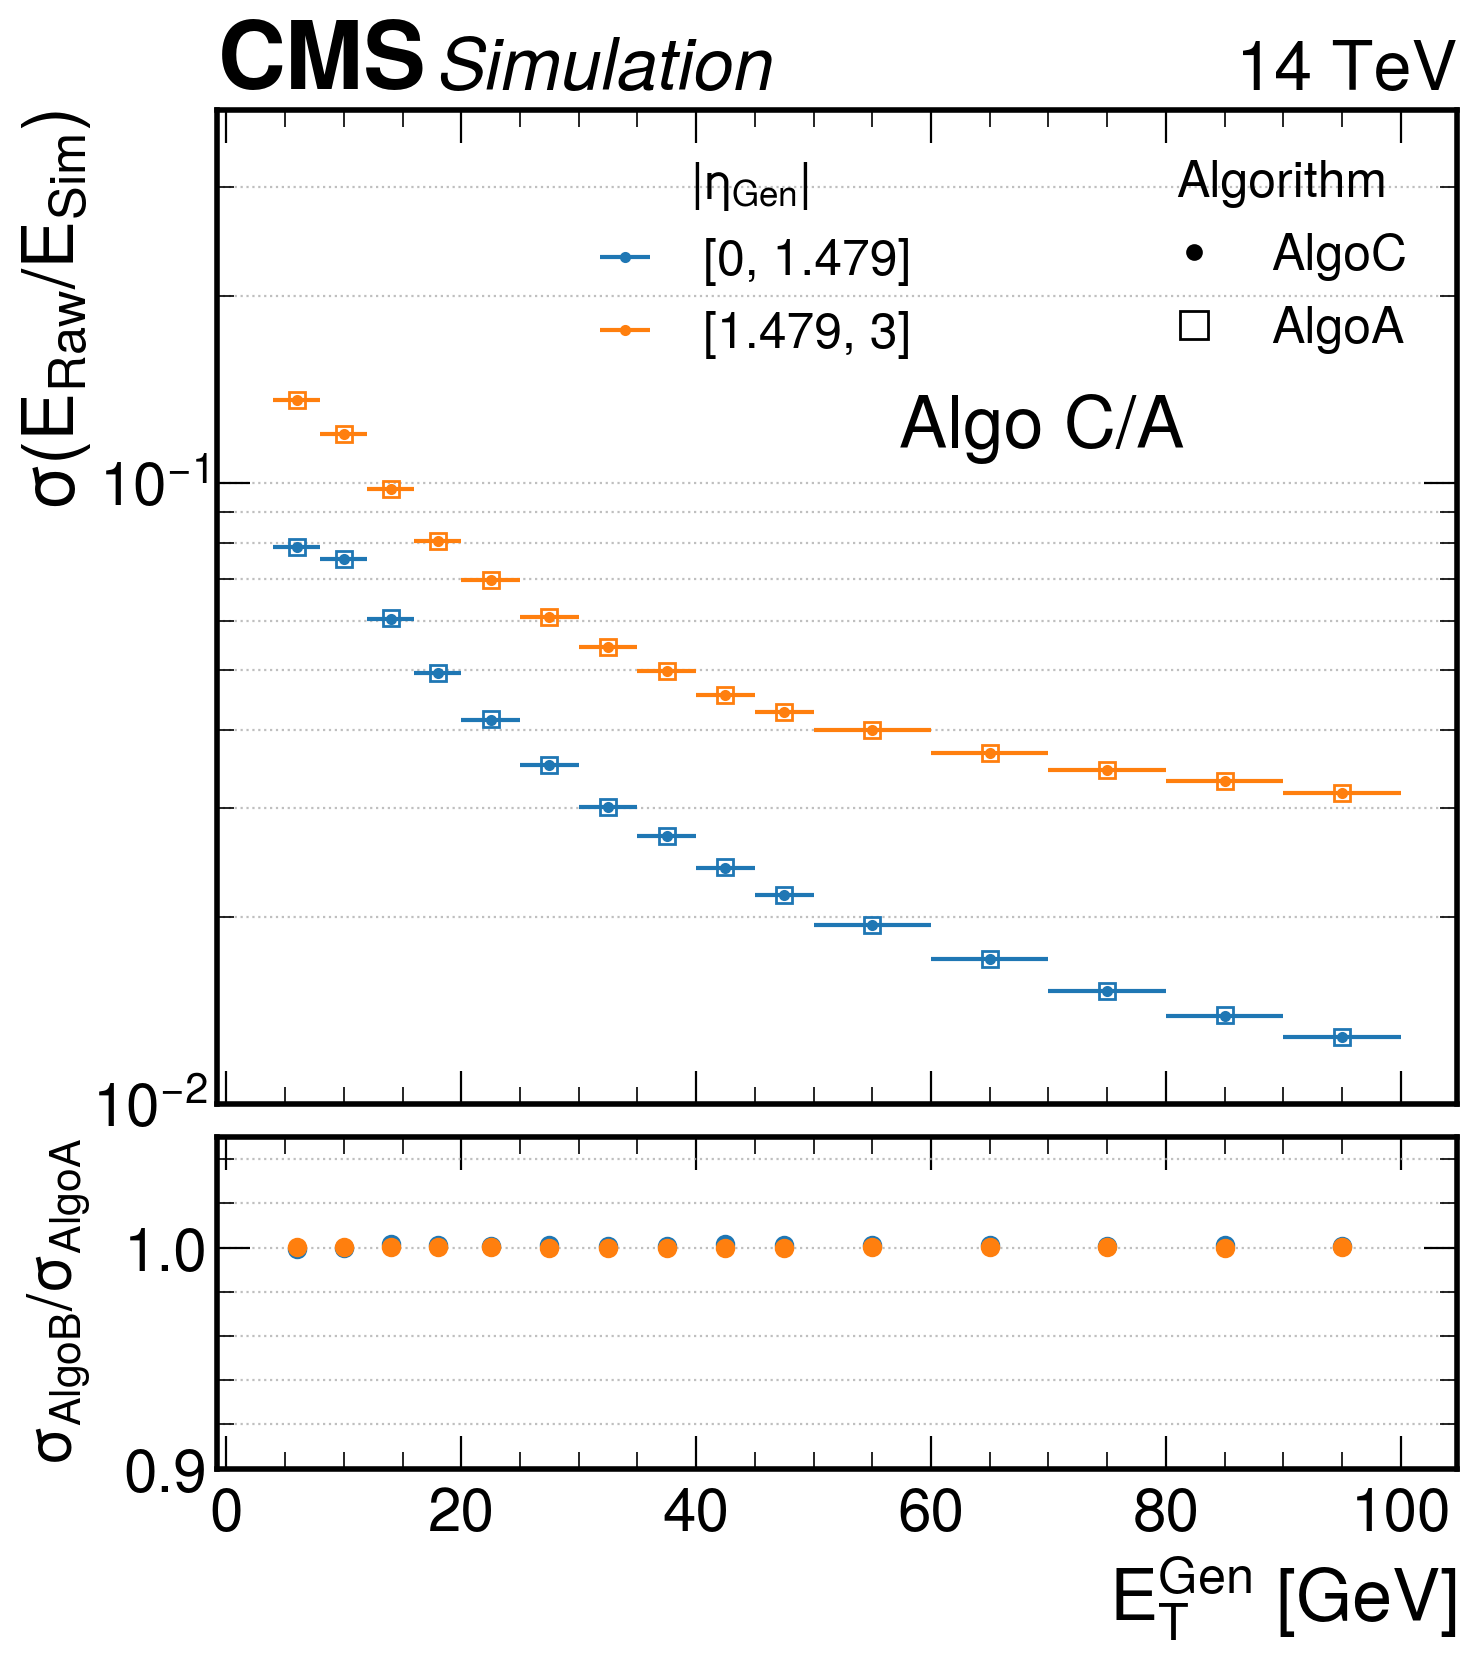

In [23]:
df1 = df_ele_A
df2 = df_ele_C
flavour = "Algo C/A"
out = []
for df in [df1, df2]:
    mask = (df.calomatched == 1) & (df.in_deepsc==1) & (df.in_mustache==1)
    df["En_ovEtrue_deepsc"] = df.en_deepsc_raw / df.calo_en_true_sim
    df = df[mask]
    #     ets = [1.5, 3,4,5, 6,8, 10,15,20,40,60, 80,100]
    ets = [4, 8, 12,16, 20,25 ,30,35,40, 45, 50, 60, 70, 80, 90 ,100]
    etas = [0, 1.479, 3]
    df["et_bin"] = pd.cut(df.calo_et_true_gen, ets, labels=list(range(len(ets)-1)))
    df["eta_bin"] = pd.cut(abs(df.calo_simeta), etas, labels=list(range(len(etas)-1)))

    res = df.groupby(["et_bin","eta_bin"]).apply(bin_analysis("En_ovEtrue_deepsc"))
    res.reset_index(level=0, inplace=True)
    res.reset_index(level=0, inplace=True)
    out.append(res)

    
    fig = plt.figure(figsize=(8,9), dpi=200)
gs = fig.add_gridspec(2, hspace=0.05, height_ratios=[0.75,0.25])
axs = gs.subplots(sharex=True)

errx = []
x = []
for i in range(len(ets)-1):
    errx.append((ets[i+1]- ets[i])/2)
    x.append((ets[i+1]+ ets[i])/2)

mustl = []
deepl = []

for ieta, eta in enumerate(etas[:-1]):
    l = axs[0].errorbar(x, out[0][out[0].eta_bin == ieta].w68, xerr=errx, label="[{}, {}]".format(etas[ieta], etas[ieta+1]), fmt = ".")
    mustl.append(l)

for ieta, eta in enumerate(etas[:-1]):
    l = axs[0].errorbar(x, out[1][out[1].eta_bin == ieta].w68, xerr=errx,label="[{}, {}]".format(etas[ieta], etas[ieta+1]), 
                            marker="s", markerfacecolor='none', c=mustl[ieta].lines[0].get_color(), linestyle='none', elinewidth=0)
    deepl.append(l)


for ieta, eta in enumerate(etas[:-1]):
#         v =res_must[res_must.eta_bin == ieta].w68**2 - res[res.eta_bin == ieta].w68**2
#         var = np.sqrt(np.abs(v))*np.sign(v) / res_must[res_must.eta_bin == ieta].w68
    var = out[1][out[1].eta_bin == ieta].w68 / out[0][out[0].eta_bin == ieta].w68
    axs[1].errorbar(x, var, xerr=errx, label="[{}, {}]".format(etas[ieta], etas[ieta+1]), fmt="o", linestyle='none', elinewidth=0 )

axs[0].set_ylabel("$\sigma (E_{Raw}/E_{Sim})$")

axs[1].set_xlabel("$E_T^{Gen}$ [GeV]")
# ax.plot([0,100],[1,1], linestyle="dashed", color="black")
axs[0].set_ylim(1e-2, 0.4)
axs[1].set_ylim(0.9, 1.05)
axs[1].set_ylabel("$\sigma_{AlgoB}/\sigma_{AlgoA}$", fontsize=22)
axs[0].get_yaxis().set_label_coords(-0.1,1)
axs[1].get_yaxis().set_label_coords(-0.1,1)
#     axs[1].legend(ncol=2, loc="upper right", fontsize=15)

axs[0].text(0.55, 0.66, flavour, transform=axs[0].transAxes)
axs[0].set_yscale("log")

l1= axs[0].legend(handles=mustl, title="$|\eta_{Gen}|$", title_fontsize=18, loc="upper right", bbox_to_anchor=(0.6, 1), fontsize=18)

ml = mlines.Line2D([], [], color='black', marker='.', linestyle='None', markersize=10, label='AlgoC')
dl = mlines.Line2D([], [], color='black', marker='s', markerfacecolor='none', linestyle='None', markersize=10, label='AlgoA')
axs[0].legend(handles=[ml,dl], title="Algorithm", title_fontsize=18, loc="upper right", fontsize=18)
axs[0].add_artist(l1)
axs[1].grid(axis="y",which="both")
axs[0].grid(axis="y", which="both")

hep.cms.label(rlabel="14 TeV", loc=0, ax=axs[0])

fig.savefig(output_folder + "/resolution_byEnergy_{}_ratio.png".format("Algo_AvsC"))
fig.savefig(output_folder + "/resolution_byEnergy_{}_ratio.pdf".format("Algo_AvsC"))
fig.savefig(output_folder + "/resolution_byEnergy_{}_ratio.svg".format("Algo_AvsC"))

# Comparison by eta

/tmp/ipykernel_516/1986489144.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["et_bin"] = pd.cut(df.calo_et_true_gen, ets, labels=list(range(len(ets)-1)))
/tmp/ipykernel_516/1986489144.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["eta_bin"] = pd.cut(abs(df.calo_simeta), etas, labels=list(range(len(etas)-1)))
/tmp/ipykernel_516/1986489144.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

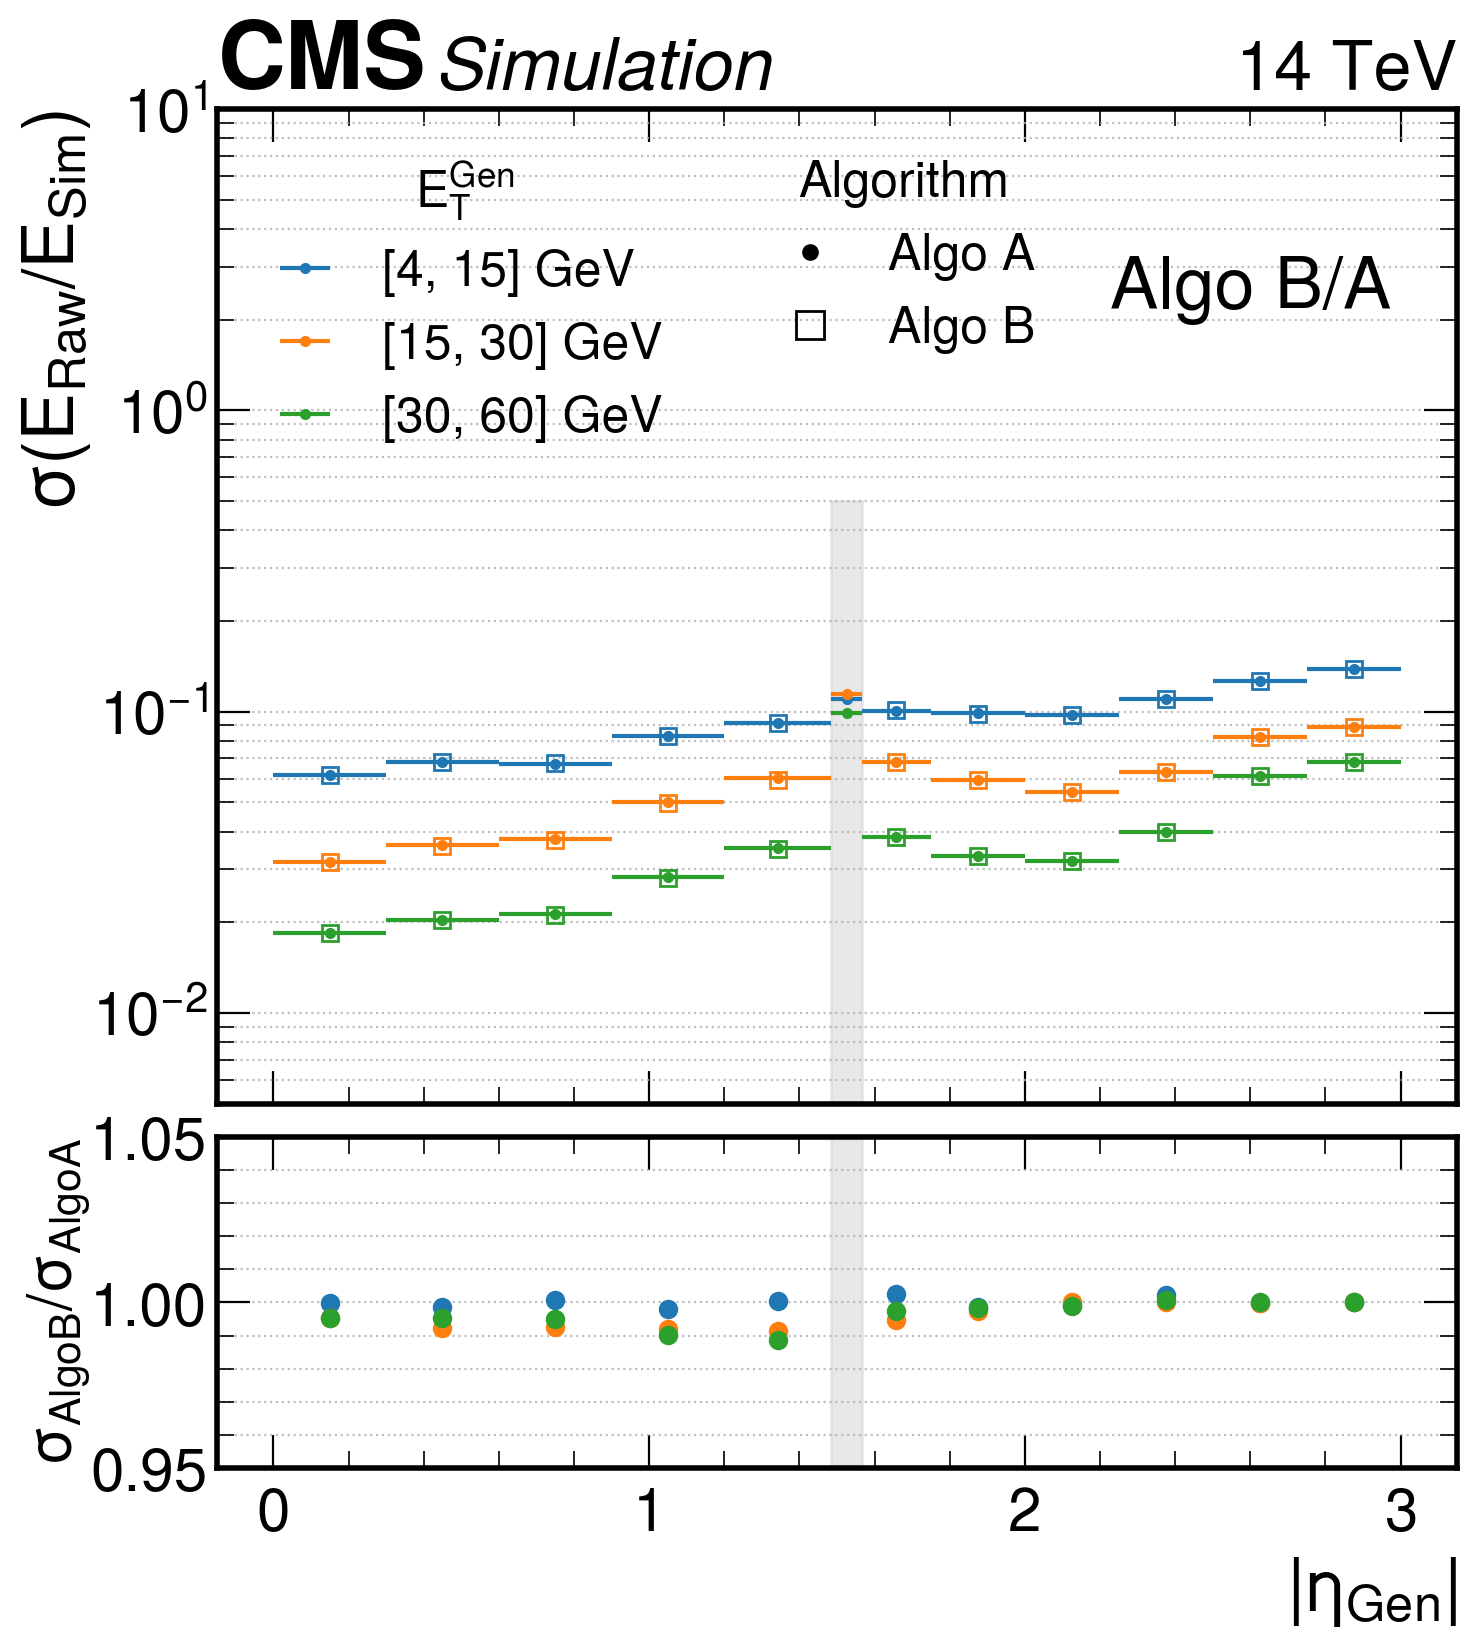

In [34]:
df1 = df_ele_A
df2 = df_ele_B
flavour = "Algo B/A"
out = []
for df in [df1, df2]:
    mask = (df.calomatched == 1) & (df.in_deepsc==1) & (df.in_mustache==1)
    df["En_ovEtrue_deepsc"] = df.en_deepsc_raw / df.calo_en_true_sim
    df = df[mask]
    
    ets = [4,15,30,60]
    iplot = [0, 1, 2, 3 ]
    etas = [0, 0.3,0.6,0.9,1.2, 1.485, 1.566, 1.75, 2.,2.25,2.5,2.75,3]
    exclude_bin = 5
    df["et_bin"] = pd.cut(df.calo_et_true_gen, ets, labels=list(range(len(ets)-1)))
    df["eta_bin"] = pd.cut(abs(df.calo_simeta), etas, labels=list(range(len(etas)-1)))

    res = df.groupby(["et_bin","eta_bin"]).apply(bin_analysis("En_ovEtrue_deepsc"))
    res.reset_index(level=0, inplace=True)
    res.reset_index(level=0, inplace=True)
    out.append(res)



fig = plt.figure(figsize=(8,9), dpi=200)
gs = fig.add_gridspec(2, hspace=0.05, height_ratios=[0.75,0.25])
axs = gs.subplots(sharex=True)

errx = []
x = []
for i in range(len(etas)-1):
    errx.append((etas[i+1]- etas[i])/2)
    x.append((etas[i+1]+ etas[i])/2)

mustl = []
deepl = []

res.loc[res.eta_bin == exclude_bin, ["w68"]] = 0
res_must.loc[res_must.eta_bin == exclude_bin, ["w68"]] = 0

for iet, et in enumerate(ets[:-1]):
    if iet not in iplot: continue
    l = axs[0].errorbar(x, out[0][out[0].et_bin == iet].w68, xerr=errx, label="[{}, {}] GeV".format(ets[iet], ets[iet+1]), fmt = ".")
    mustl.append(l)

i = 0
for iet, et in enumerate(ets[:-1]):
    if iet not in iplot: continue
    l = axs[0].errorbar(x, out[1][out[1].et_bin == iet].w68,  xerr=errx ,label="[{}, {}] GeV".format(ets[iet], ets[iet+1]), 
                            c=mustl[i].lines[0].get_color(), marker="s", markerfacecolor='none', linestyle='none',elinewidth=0)
    i+=1
    deepl.append(l)

axs[0].fill_between([1.485, 1.566], [5e-3,5e-3],[0.5,0.5], color="lightgray", alpha=0.5)

for iet, et in enumerate(ets[:-1]):
    if iet not in iplot: continue
    #v =res_must[res_must.et_bin == iet].w68**2 - res[res.et_bin == iet].w68**2
    #var = np.sqrt(np.abs(v))*np.sign(v) / res_must[res_must.et_bin == iet].w68
    var = out[1][out[1].et_bin==iet].w68 / out[0][out[0].et_bin==iet].w68
    axs[1].errorbar(x, var,xerr=errx, label="$E_T^{Gen} $" + " [{}, {}] GeV".format(ets[iet], ets[iet+1]),  fmt="o", linestyle='none', elinewidth=0)

axs[0].set_ylabel("$\sigma (E_{Raw}/E_{Sim})$")

l1= axs[0].legend(handles=mustl, title="$E_T^{Gen}$", title_fontsize=18, loc="upper left", fontsize=18)

ml = mlines.Line2D([], [], color='black', marker='.', linestyle='None', markersize=10, label='Algo A')
dl = mlines.Line2D([], [], color='black', marker='s', markerfacecolor='none', linestyle='None', markersize=10, label='Algo B')
axs[0].legend(handles=[ml,dl], title="Algorithm", title_fontsize=18, loc="upper right", bbox_to_anchor=(0.7, 1), fontsize=18)
axs[0].add_artist(l1)

axs[1].set_xlabel("$|\eta_{Gen}|$")
axs[0].set_ylim(5e-3,1e1)
# ax.plot([0,100],[1,1], linestyle="dashed", color="black")

axs[1].set_ylim(0.95, 1.05)
axs[1].set_ylabel("$\sigma_{Algo B}/\sigma_{Algo A}$", fontsize=22)
axs[0].get_yaxis().set_label_coords(-0.1,1)
axs[1].get_yaxis().set_label_coords(-0.1,1)

axs[1].fill_between([1.485, 1.566], [-0.1,-0.1],[1.1,1.1], color="lightgray", alpha=0.5)

#     axs[1].legend(ncol=3,prop={'size': 13}, loc="lower left" )

axs[0].text(0.72, 0.8, flavour, transform=axs[0].transAxes)

axs[0].set_yscale("log")
axs[0].grid(which="both",axis="y")
axs[1].grid(which="both",axis="y")

hep.cms.label(rlabel="14 TeV", loc=0, ax=axs[0])

flavour = "algo_AvsB"
fig.savefig(output_folder + "/resolution_byeta_{}_ratio.png".format(flavour))
fig.savefig(output_folder + "/resolution_byeta_{}_ratio.pdf".format(flavour))
fig.savefig(output_folder + "/resolution_byeta_{}_ratio.svg".format(flavour))

/tmp/ipykernel_516/2438570079.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["et_bin"] = pd.cut(df.calo_et_true_gen, ets, labels=list(range(len(ets)-1)))
/tmp/ipykernel_516/2438570079.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["eta_bin"] = pd.cut(abs(df.calo_simeta), etas, labels=list(range(len(etas)-1)))
/tmp/ipykernel_516/2438570079.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

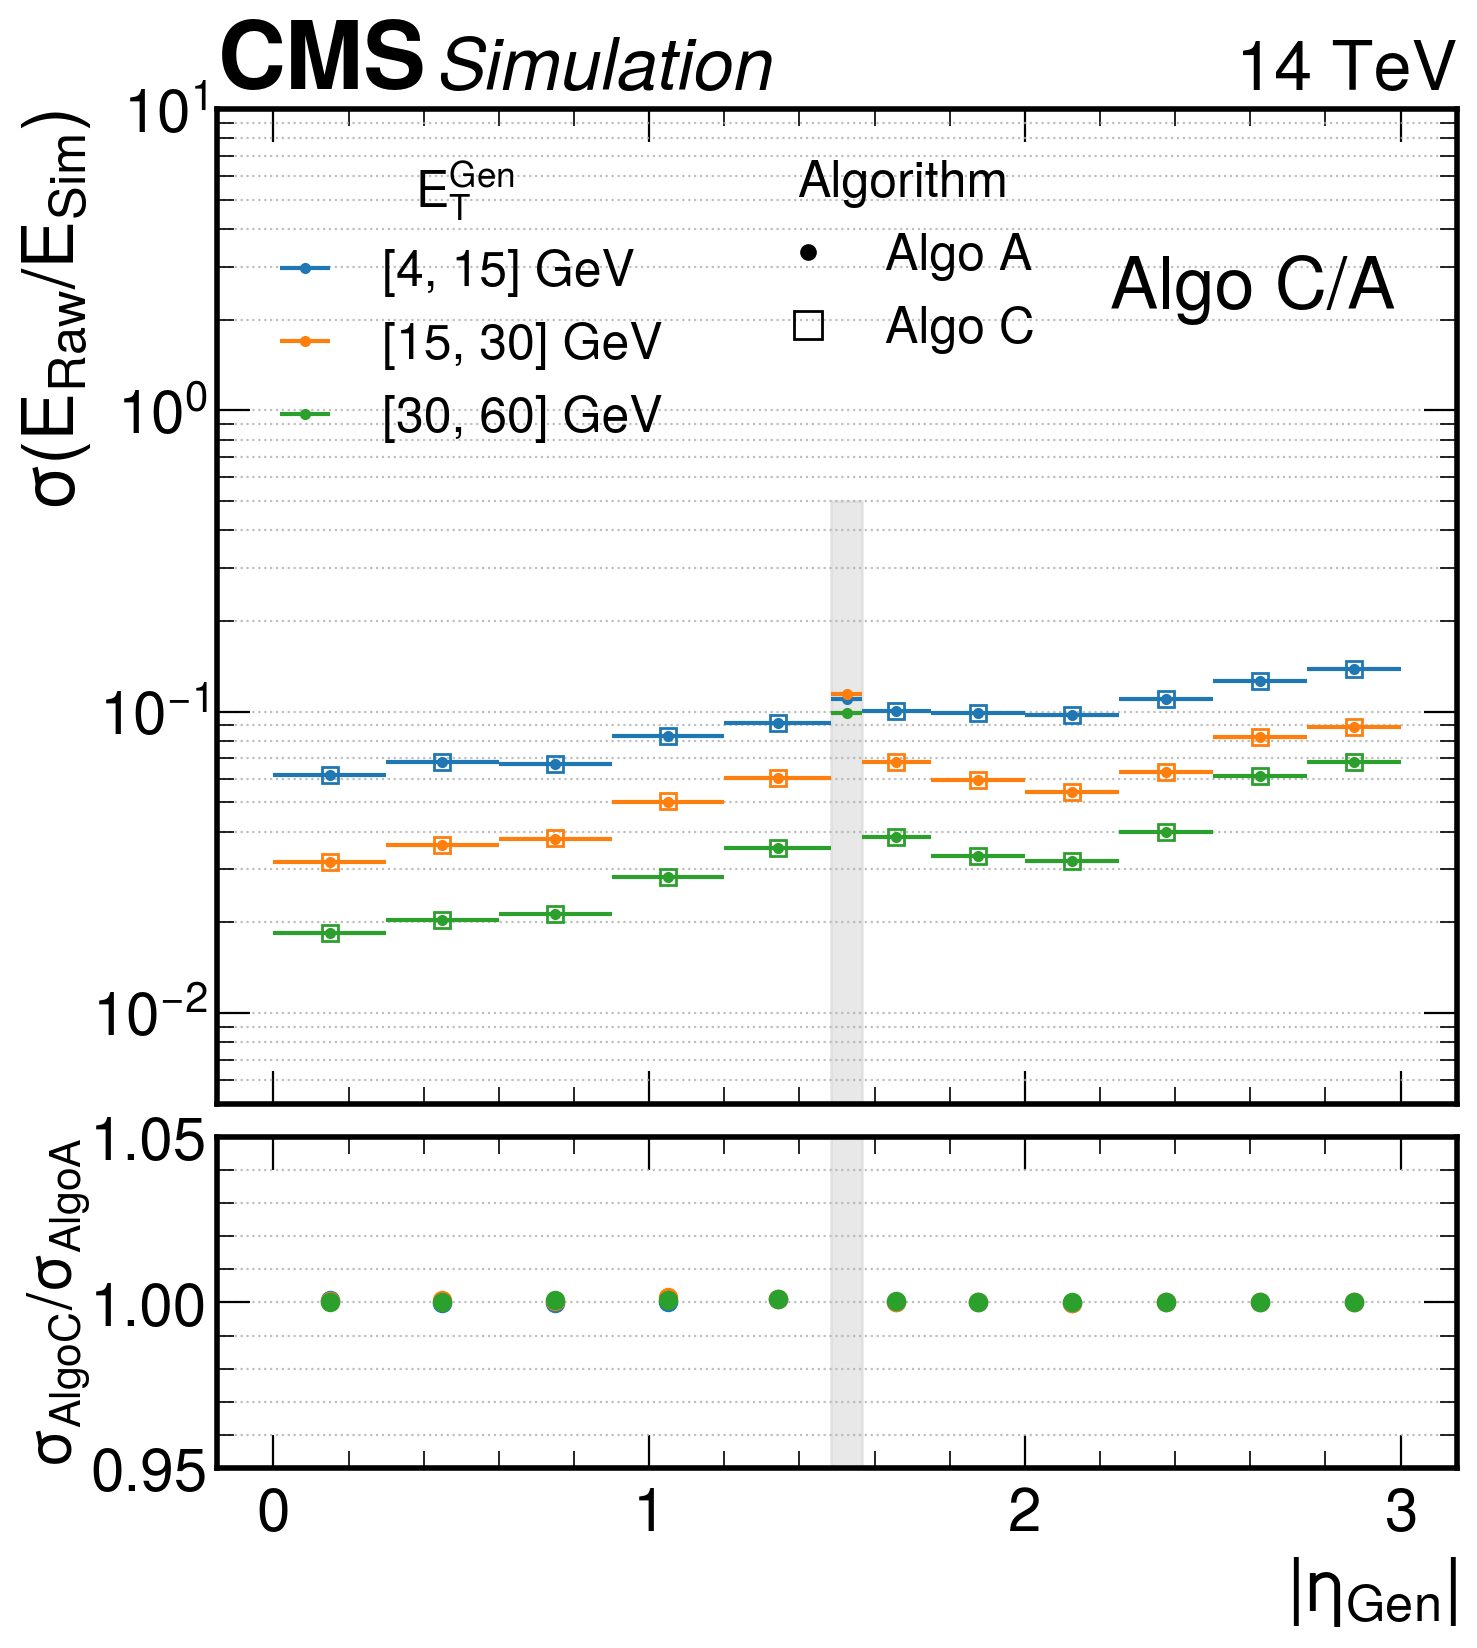

In [35]:
df1 = df_ele_A
df2 = df_ele_C
flavour = "Algo C/A"
out = []
for df in [df1, df2]:
    mask = (df.calomatched == 1) & (df.in_deepsc==1) & (df.in_mustache==1)
    df["En_ovEtrue_deepsc"] = df.en_deepsc_raw / df.calo_en_true_sim
    df = df[mask]
    
    ets = [4,15,30,60]
    iplot = [0, 1, 2, 3 ]
    etas = [0, 0.3,0.6,0.9,1.2, 1.485, 1.566, 1.75, 2.,2.25,2.5,2.75,3]
    exclude_bin = 5
    df["et_bin"] = pd.cut(df.calo_et_true_gen, ets, labels=list(range(len(ets)-1)))
    df["eta_bin"] = pd.cut(abs(df.calo_simeta), etas, labels=list(range(len(etas)-1)))

    res = df.groupby(["et_bin","eta_bin"]).apply(bin_analysis("En_ovEtrue_deepsc"))
    res.reset_index(level=0, inplace=True)
    res.reset_index(level=0, inplace=True)
    out.append(res)



fig = plt.figure(figsize=(8,9), dpi=200)
gs = fig.add_gridspec(2, hspace=0.05, height_ratios=[0.75,0.25])
axs = gs.subplots(sharex=True)

errx = []
x = []
for i in range(len(etas)-1):
    errx.append((etas[i+1]- etas[i])/2)
    x.append((etas[i+1]+ etas[i])/2)

mustl = []
deepl = []

res.loc[res.eta_bin == exclude_bin, ["w68"]] = 0
res_must.loc[res_must.eta_bin == exclude_bin, ["w68"]] = 0

for iet, et in enumerate(ets[:-1]):
    if iet not in iplot: continue
    l = axs[0].errorbar(x, out[0][out[0].et_bin == iet].w68, xerr=errx, label="[{}, {}] GeV".format(ets[iet], ets[iet+1]), fmt = ".")
    mustl.append(l)

i = 0
for iet, et in enumerate(ets[:-1]):
    if iet not in iplot: continue
    l = axs[0].errorbar(x, out[1][out[1].et_bin == iet].w68,  xerr=errx ,label="[{}, {}] GeV".format(ets[iet], ets[iet+1]), 
                            c=mustl[i].lines[0].get_color(), marker="s", markerfacecolor='none', linestyle='none',elinewidth=0)
    i+=1
    deepl.append(l)

axs[0].fill_between([1.485, 1.566], [5e-3,5e-3],[0.5,0.5], color="lightgray", alpha=0.5)

for iet, et in enumerate(ets[:-1]):
    if iet not in iplot: continue
    #v =res_must[res_must.et_bin == iet].w68**2 - res[res.et_bin == iet].w68**2
    #var = np.sqrt(np.abs(v))*np.sign(v) / res_must[res_must.et_bin == iet].w68
    var = out[1][out[1].et_bin==iet].w68 / out[0][out[0].et_bin==iet].w68
    axs[1].errorbar(x, var,xerr=errx, label="$E_T^{Gen} $" + " [{}, {}] GeV".format(ets[iet], ets[iet+1]),  fmt="o", linestyle='none', elinewidth=0)

axs[0].set_ylabel("$\sigma (E_{Raw}/E_{Sim})$")

l1= axs[0].legend(handles=mustl, title="$E_T^{Gen}$", title_fontsize=18, loc="upper left", fontsize=18)

ml = mlines.Line2D([], [], color='black', marker='.', linestyle='None', markersize=10, label='Algo A')
dl = mlines.Line2D([], [], color='black', marker='s', markerfacecolor='none', linestyle='None', markersize=10, label='Algo C')
axs[0].legend(handles=[ml,dl], title="Algorithm", title_fontsize=18, loc="upper right", bbox_to_anchor=(0.7, 1), fontsize=18)
axs[0].add_artist(l1)

axs[1].set_xlabel("$|\eta_{Gen}|$")
axs[0].set_ylim(5e-3,1e1)
# ax.plot([0,100],[1,1], linestyle="dashed", color="black")

axs[1].set_ylim(0.95, 1.05)
axs[1].set_ylabel("$\sigma_{Algo C}/\sigma_{Algo A}$", fontsize=22)
axs[0].get_yaxis().set_label_coords(-0.1,1)
axs[1].get_yaxis().set_label_coords(-0.1,1)

axs[1].fill_between([1.485, 1.566], [-0.1,-0.1],[1.1,1.1], color="lightgray", alpha=0.5)

#     axs[1].legend(ncol=3,prop={'size': 13}, loc="lower left" )

axs[0].text(0.72, 0.8, flavour, transform=axs[0].transAxes)

axs[0].set_yscale("log")
axs[0].grid(which="both",axis="y")
axs[1].grid(which="both",axis="y")

hep.cms.label(rlabel="14 TeV", loc=0, ax=axs[0])

flavour = "algo_AvsC"
fig.savefig(output_folder + "/resolution_byeta_{}_ratio.png".format(flavour))
fig.savefig(output_folder + "/resolution_byeta_{}_ratio.pdf".format(flavour))
fig.savefig(output_folder + "/resolution_byeta_{}_ratio.svg".format(flavour))

# Compare algos by number of clusters

/tmp/ipykernel_516/3660821878.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["et_bin"] = pd.cut(df.calo_et_true_gen, ets, labels=list(range(len(ets)-1)))
/tmp/ipykernel_516/3660821878.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ncls_bin"] = pd.cut(df.ncls_tot, ncls, labels=list(range(len(ncls)-1)))
/tmp/ipykernel_516/3660821878.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

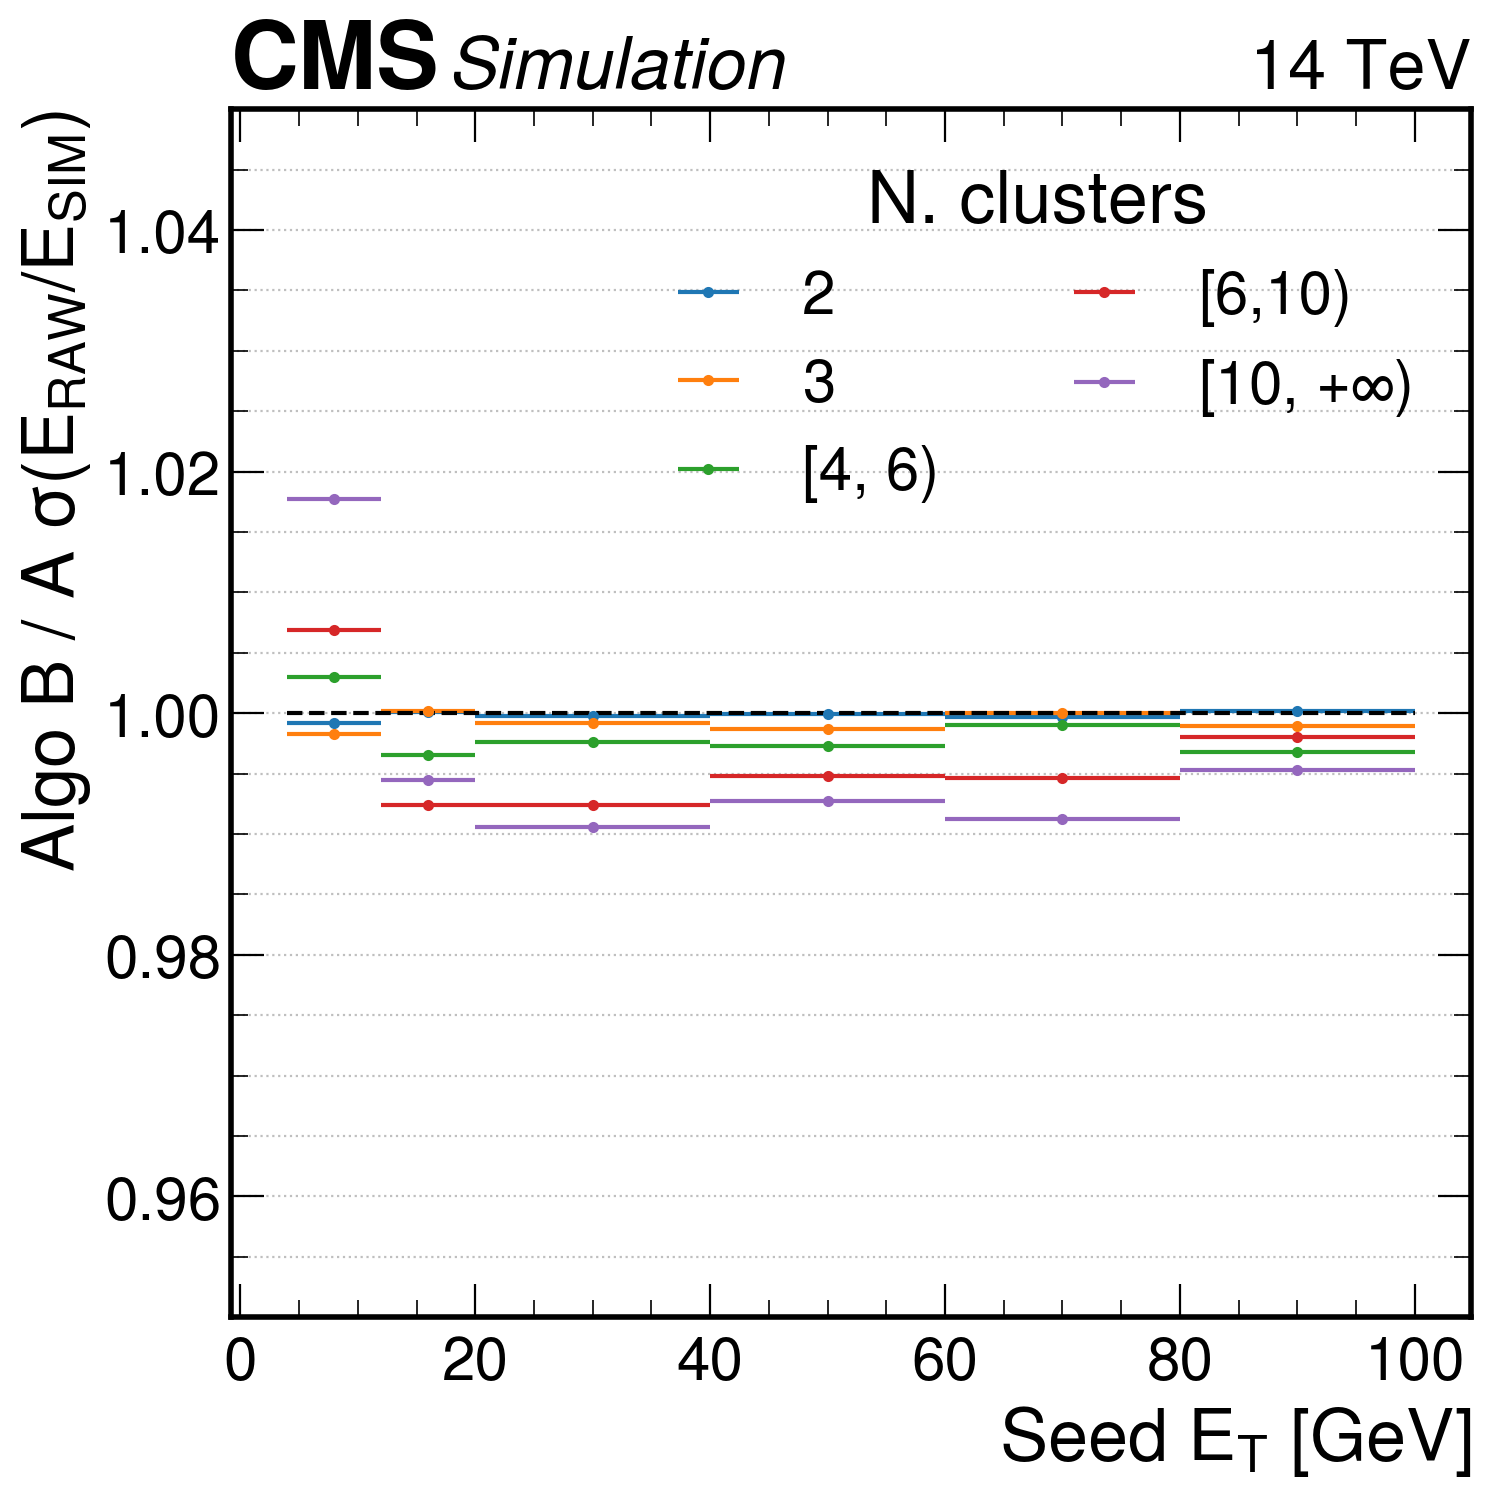

In [36]:
df1 = df_ele_A
df2 = df_ele_B
flavour = "Algo B/A"
out = []
legends = ["2", "3", "[4, 6)", "[6,10)","[10, $+\infty$)"]
for df in [df1, df2]:
    mask = (df.calomatched == 1) & (df.in_deepsc==1) & (df.in_mustache==1)
    df["En_ovEtrue_deepsc"] = df.en_deepsc_raw / df.calo_en_true_sim
    df = df[mask]
    ets = [4,12,20,40,60,80,100]
    ncls = [2,3,4,6,10,15]
    df["et_bin"] = pd.cut(df.calo_et_true_gen, ets, labels=list(range(len(ets)-1)))
    df["ncls_bin"] = pd.cut(df.ncls_tot, ncls, labels=list(range(len(ncls)-1)))


    res = df.groupby(["et_bin","ncls_bin"]).apply(bin_analysis("En_ovEtrue_deepsc"))
    res.reset_index(level=0, inplace=True)
    res.reset_index(level=0, inplace=True)
    out.append(res)

ig, ax = plt.subplots(1,1, figsize=(8,8),dpi=200, )

errx = []
x = []
for i in range(len(ets)-1):
    errx.append((ets[i+1]- ets[i])/2)
    x.append((ets[i+1]+ ets[i])/2)


# gs = fig.add_gridspec(2, hspace=0.1, height_ratios=[0.8,0.2])
# axs = gs.subplots(sharex=True)

for ieta, eta in enumerate(ncls[:-1]):
    ax.errorbar(x, out[1][out[1].ncls_bin == ieta].w68/out[0][out[0].ncls_bin == ieta].w68, xerr=errx, label=legends[ieta], fmt=".")


ax.set_ylim(0.95, 1.05)
ax.set_ylabel("Algo B / A $\sigma (E_{RAW}/E_{SIM})$")
ax.legend(ncol=2, title="N. clusters")

ax.set_xlabel("Seed $E_T$ [GeV]")
ax.plot([min(ets),max(ets)],[1,1], linestyle="dashed", color="black")

ax.grid(axis="y", which="both")

hep.cms.label(rlabel="14 TeV", loc=0, ax=ax)

flavour = "algo_AvsB"
fig.savefig(output_folder + "/resolution_byncls_{}_ratio.png".format(flavour))
fig.savefig(output_folder + "/resolution_byncls_{}_ratio.pdf".format(flavour))
fig.savefig(output_folder + "/resolution_byncls_{}_ratio.svg".format(flavour))

/tmp/ipykernel_516/1178366055.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["et_bin"] = pd.cut(df.calo_et_true_gen, ets, labels=list(range(len(ets)-1)))
/tmp/ipykernel_516/1178366055.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ncls_bin"] = pd.cut(df.ncls_tot, ncls, labels=list(range(len(ncls)-1)))
/tmp/ipykernel_516/1178366055.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

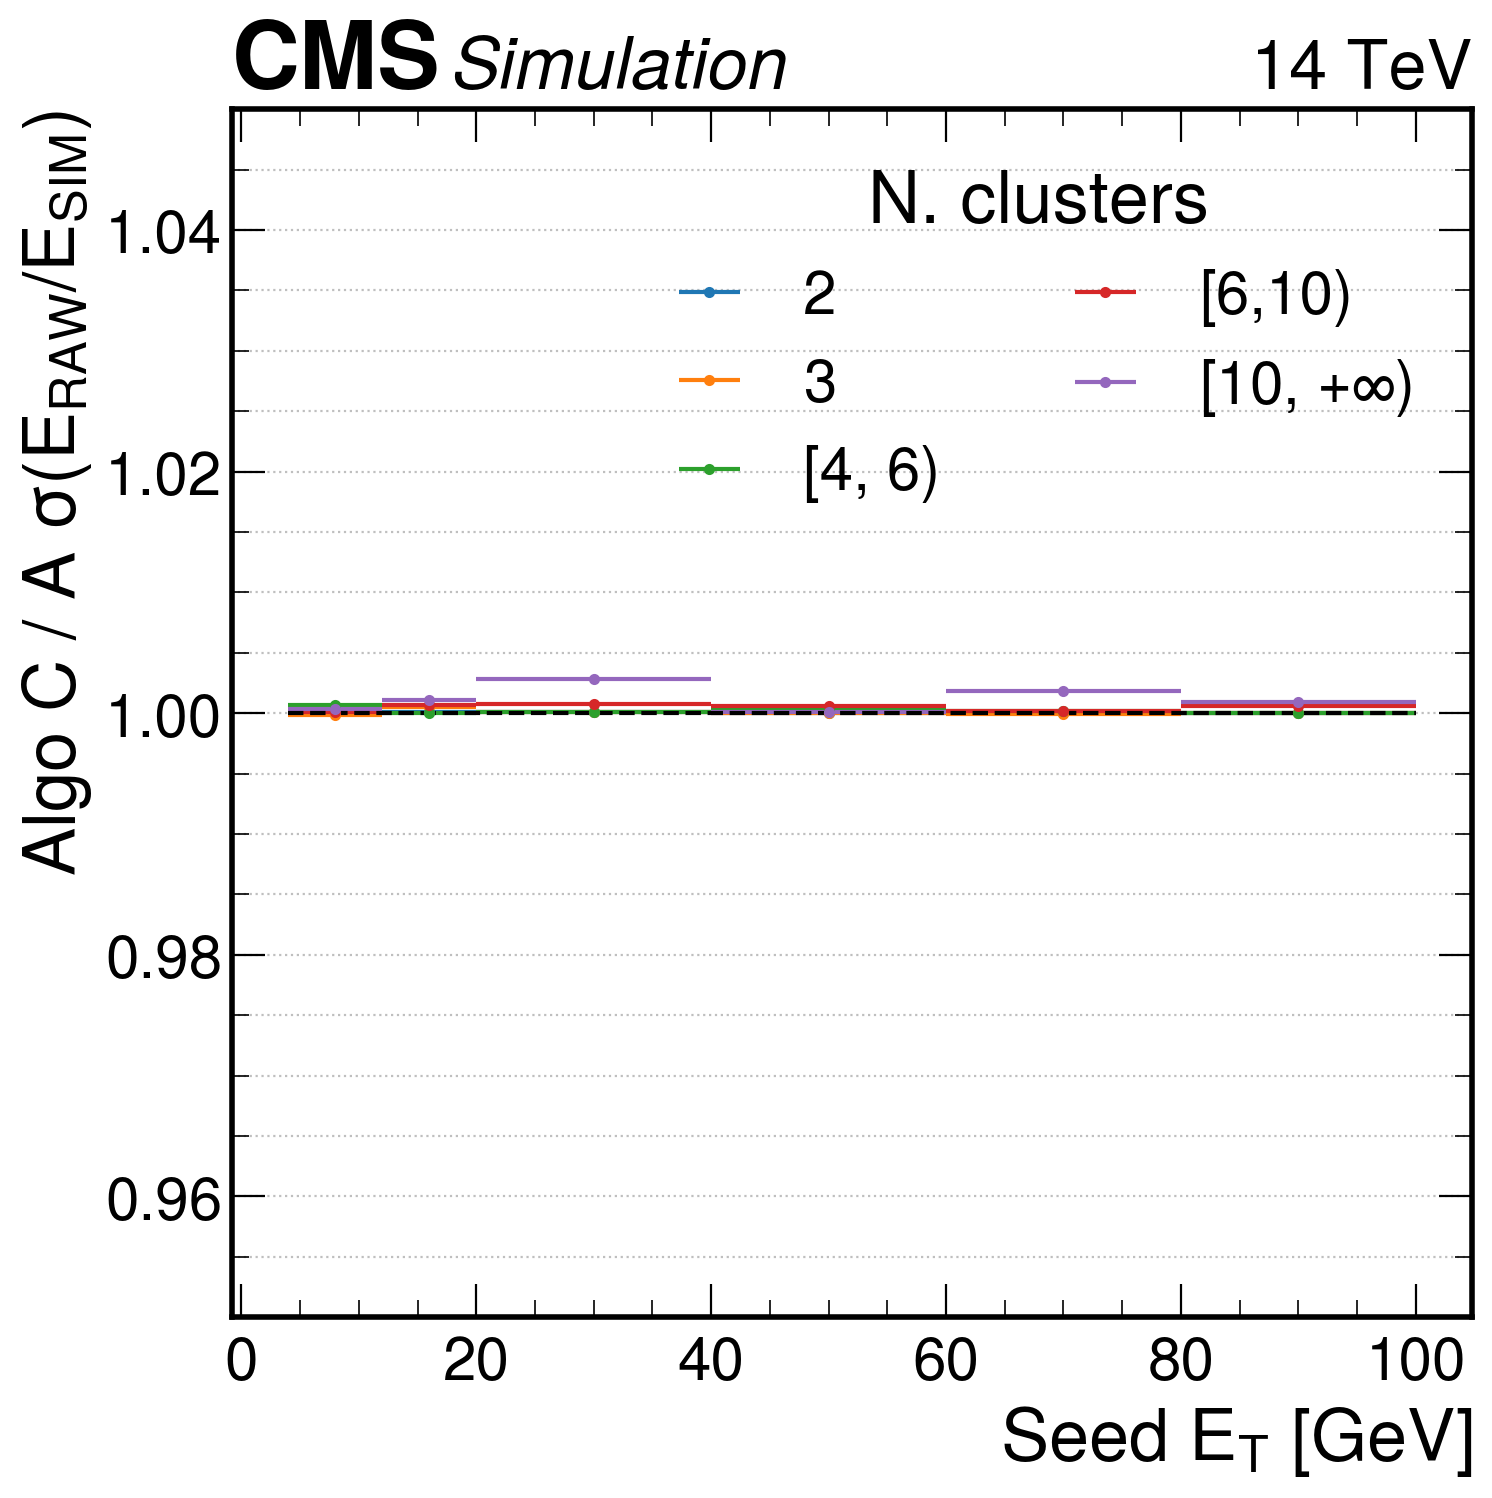

In [37]:
df1 = df_ele_A
df2 = df_ele_C
flavour = "Algo C/A"
out = []
legends = ["2", "3", "[4, 6)", "[6,10)","[10, $+\infty$)"]
for df in [df1, df2]:
    mask = (df.calomatched == 1) & (df.in_deepsc==1) & (df.in_mustache==1)
    df["En_ovEtrue_deepsc"] = df.en_deepsc_raw / df.calo_en_true_sim
    df = df[mask]
    ets = [4,12,20,40,60,80,100]
    ncls = [2,3,4,6,10,15]
    df["et_bin"] = pd.cut(df.calo_et_true_gen, ets, labels=list(range(len(ets)-1)))
    df["ncls_bin"] = pd.cut(df.ncls_tot, ncls, labels=list(range(len(ncls)-1)))


    res = df.groupby(["et_bin","ncls_bin"]).apply(bin_analysis("En_ovEtrue_deepsc"))
    res.reset_index(level=0, inplace=True)
    res.reset_index(level=0, inplace=True)
    out.append(res)

ig, ax = plt.subplots(1,1, figsize=(8,8),dpi=200, )

errx = []
x = []
for i in range(len(ets)-1):
    errx.append((ets[i+1]- ets[i])/2)
    x.append((ets[i+1]+ ets[i])/2)


# gs = fig.add_gridspec(2, hspace=0.1, height_ratios=[0.8,0.2])
# axs = gs.subplots(sharex=True)

for ieta, eta in enumerate(ncls[:-1]):
    ax.errorbar(x, out[1][out[1].ncls_bin == ieta].w68/out[0][out[0].ncls_bin == ieta].w68, xerr=errx, label=legends[ieta], fmt=".")


ax.set_ylim(0.95, 1.05)
ax.set_ylabel("Algo C / A $\sigma (E_{RAW}/E_{SIM})$")
ax.legend(ncol=2, title="N. clusters")

ax.set_xlabel("Seed $E_T$ [GeV]")
ax.plot([min(ets),max(ets)],[1,1], linestyle="dashed", color="black")

ax.grid(axis="y", which="both")

hep.cms.label(rlabel="14 TeV", loc=0, ax=ax)

flavour = "algo_AvsC"
fig.savefig(output_folder + "/resolution_byncls_{}_ratio.png".format(flavour))
fig.savefig(output_folder + "/resolution_byncls_{}_ratio.pdf".format(flavour))
fig.savefig(output_folder + "/resolution_byncls_{}_ratio.svg".format(flavour))